In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
loan_df = pd.read_csv("loan.csv",encoding = "ISO-8859-1", low_memory=False)

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 112 entries, id to Unnamed: 111
dtypes: float64(75), int64(13), object(24)
memory usage: 33.9+ MB


# Data Cleaning 

In [4]:
#Total number of columns
num_columns = loan_df.shape[1]
print("Total number of columns:", num_columns)

Total number of columns: 112


In [5]:
# To check how many columns have 100% null values

round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [6]:
#To Check  the columns having 100% Null Values
print(loan_df.columns[100*loan_df.isnull().mean()==100])

#To Show how many Columns have Null Values
print("Number of Columns having Null value :",len(loan_df.columns[100*loan_df.isnull().mean()==100]))


Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
#To remove the null values columns

loan_df = loan_df.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'Unnamed: 111'],axis=1)
#  out_prncp, out_prncp_inv variables are valid for barrowers who already took loan.

loan_df.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
num_columns = loan_df.shape[1]
print("Total number of columns remaining:", num_columns)


Total number of columns remaining: 55


In [8]:
#To check top 10 rows of each columns and columns having same values 100% within columns

loan_df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11

In [9]:

#Searching number of unique values in each vcolumn
loan_df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
next_pymnt_d                  2
verification_status           3
pub_rec_bankruptcies          3
loan_status                   3
pub_rec                       5
dtype: int64

We see columns having single unique values throughout, the data will not be of significance :
'pymnt_plan'
'initial_list_status'
'collections_12_mths_ex_med'
'policy_code'
'application_type'
'acc_now_delinq'
'chargeoff_within_12_mths'
'delinq_amnt'
'tax_liens'

In [10]:
#Removing the insignificant columns having pnly one unique value 
cleaned_loan_df = loan_df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

#Total number of columns remaining
num_columns = cleaned_loan_df.shape[1]
print("Total number of columns remaining:", num_columns)
print("Total number of columns dropped:", 112-num_columns)

Total number of columns remaining: 46
Total number of columns dropped: 66


In [11]:
cleaned_loan_df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   
5  https://lendingclub.com/browse/loanDetail.acti...   
6  https://lendingclub.com/browse/loanDetail.acti...   
7  https://lendingclub.com/browse/loanDetail.acti...   
8  https://lendingclub.com/browse/loanDetail.acti...   
9  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11 > I own a small h...      small_business   
9    Borrower added on 12/16/11 > I'm trying to b...               other   


In [12]:
#Removing current loan status rows as we want analys the data
cleaned_loan_df = cleaned_loan_df[cleaned_loan_df.loan_status != 'Current']

In [13]:
#Checking unique characters for 'term' column
cleaned_loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values

In [14]:
#Removing empty space in values in 'term' column
cleaned_loan_df['term'] = cleaned_loan_df.term.str.strip()
cleaned_loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [15]:
# Finding datatype in all coulmns
cleaned_loan_df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

'int_rate' and 'revol_util' are having '%' symbol values and having data type of object. 
'issue_d', 'earliest_cr_line' are having date values.

In [16]:
#Removing '%' Character
cleaned_loan_df['int_rate'] = cleaned_loan_df.int_rate.str.strip('%').astype(float)
cleaned_loan_df['revol_util'] = cleaned_loan_df.revol_util.str.strip('%').astype(float)

In [17]:
#converting to date type
cleaned_loan_df['issue_d'] = pd.to_datetime(cleaned_loan_df.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
cleaned_loan_df['issue_d'] = cleaned_loan_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
cleaned_loan_df['earliest_cr_line'] = pd.to_datetime(cleaned_loan_df.earliest_cr_line, format='%b-%y')
cleaned_loan_df['earliest_cr_line'] = cleaned_loan_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [18]:
cleaned_loan_df['issue_d_year'] = cleaned_loan_df.issue_d.dt.year
cleaned_loan_df['issue_d_month'] = cleaned_loan_df.issue_d.dt.strftime('%b')
cleaned_loan_df['issue_d_weekday'] = cleaned_loan_df.issue_d.dt.weekday
#data type conversion of year and weekday
cleaned_loan_df['issue_d_year'] = cleaned_loan_df['issue_d_year'].astype(object)
cleaned_loan_df['issue_d_weekday'] = cleaned_loan_df['issue_d_weekday'].astype(object)

#earliest_cr_line
cleaned_loan_df['earliest_cr_line_year'] = cleaned_loan_df.earliest_cr_line.dt.year
cleaned_loan_df['earliest_cr_line_month'] = cleaned_loan_df.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
cleaned_loan_df['earliest_cr_line_year'] = cleaned_loan_df['earliest_cr_line_year'].astype(object)


In [19]:
# Finding datatype in all coulmns
cleaned_loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               

In [20]:
#Adding Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

cleaned_loan_df['approved_loan_amnt_ratio'] = round(cleaned_loan_df.funded_amnt_inv*100/cleaned_loan_df.loan_amnt,2)

In [21]:
# Modified datatypes

cleaned_loan_df.dtypes

# New Columns
print("New Columns added: 5")
print("Total number of columns remaining:", num_columns+5)

New Columns added: 5
Total number of columns remaining: 51




# Univariate Analysis 

### loan_amnt:	
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


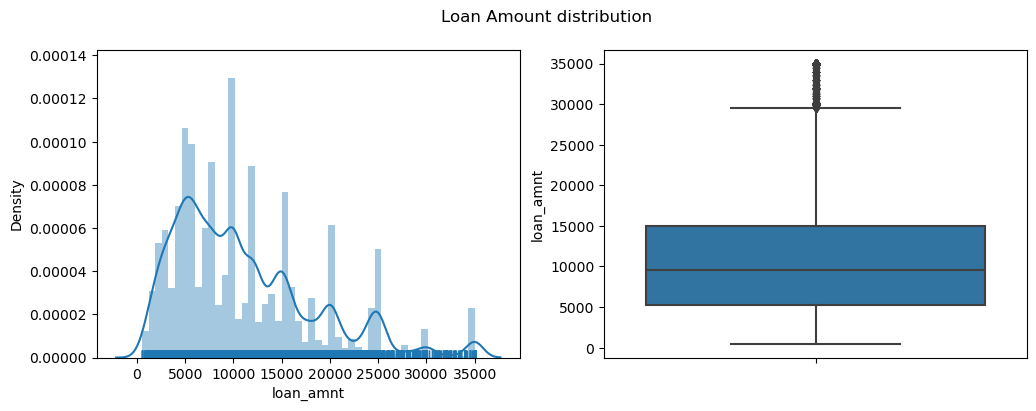

In [22]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=cleaned_loan_df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(y=cleaned_loan_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [23]:
# Statistics of loan_amount
cleaned_loan_df.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
10%       3090.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

### funded_amnt: 
The total amount committed to that loan at that point in time.


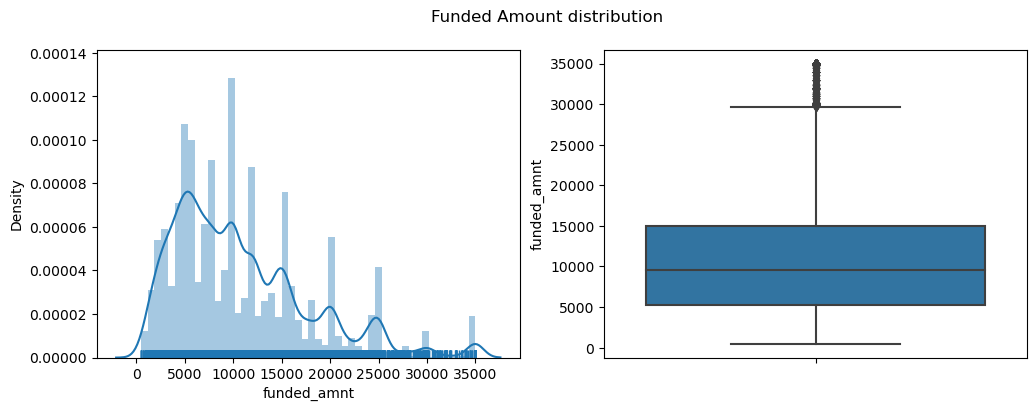

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=cleaned_loan_df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=cleaned_loan_df.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

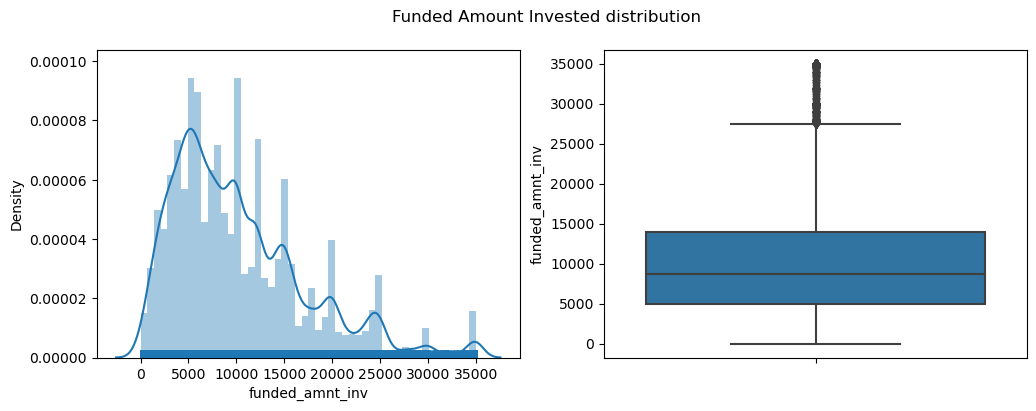

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=cleaned_loan_df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=cleaned_loan_df.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

### Approved Loan Amount Ratio

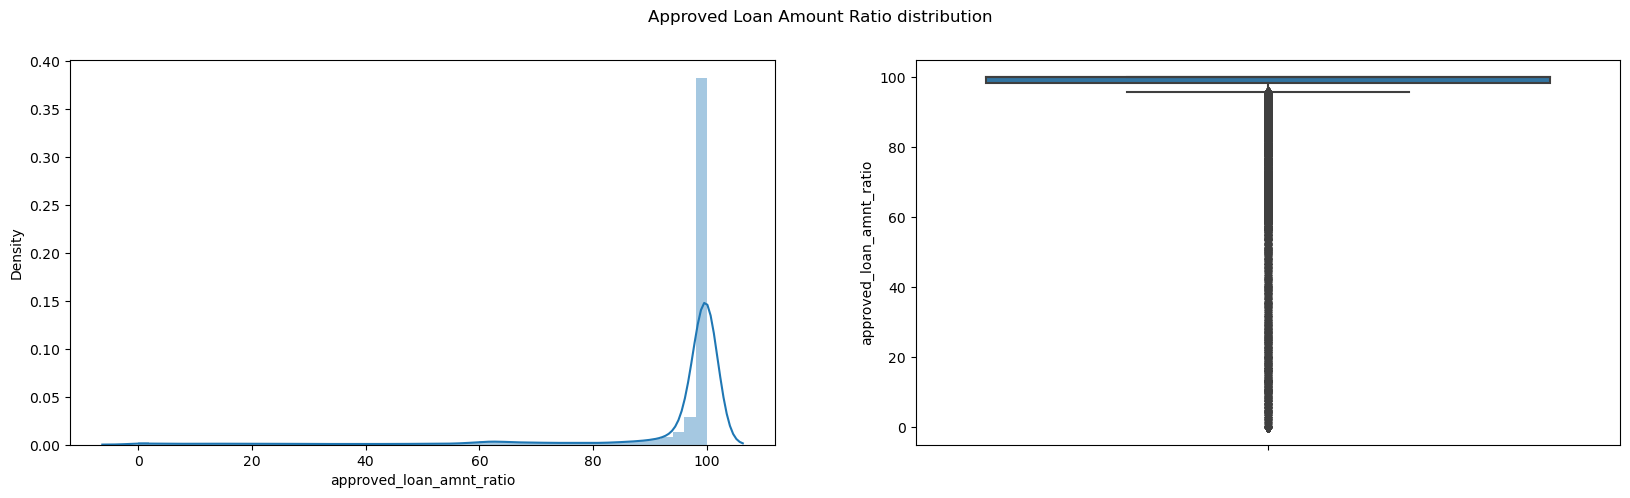

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=cleaned_loan_df.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(y=cleaned_loan_df.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

### Interest Rate

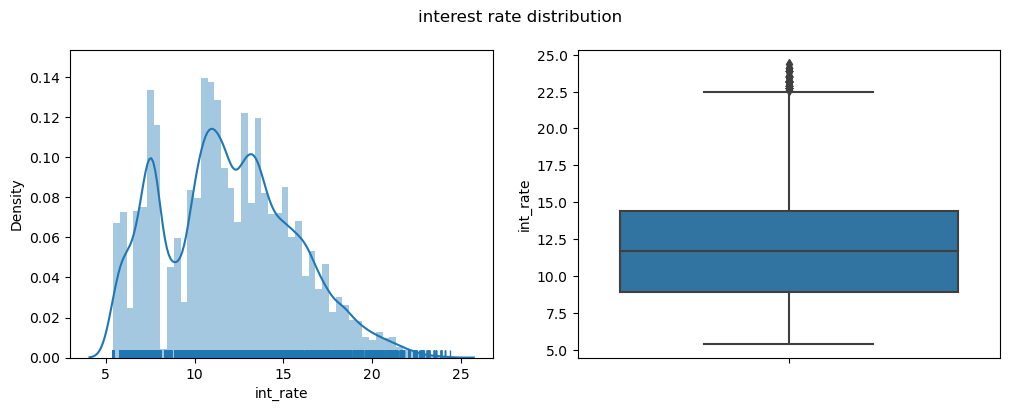

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=cleaned_loan_df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=cleaned_loan_df.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

### Installment
The monthly payment owed by the borrower if the loan originates.

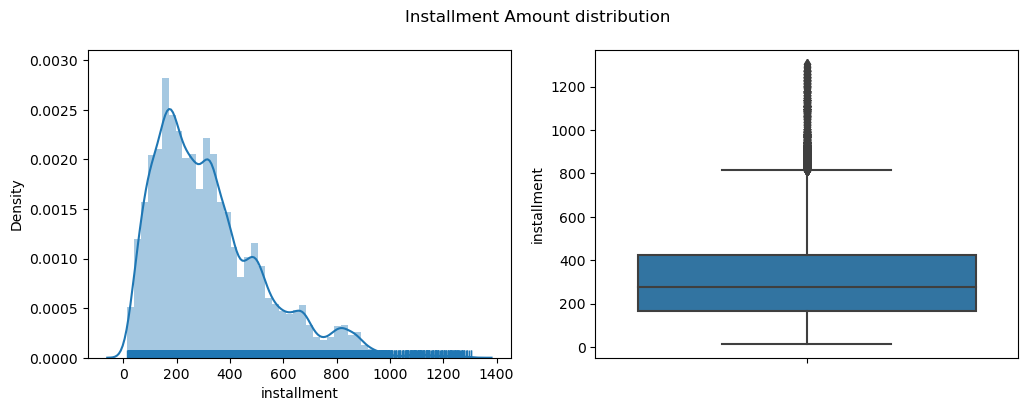

In [28]:
installment = cleaned_loan_df.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

## annual_inc
The self-reported annual income provided by the borrower during registration.

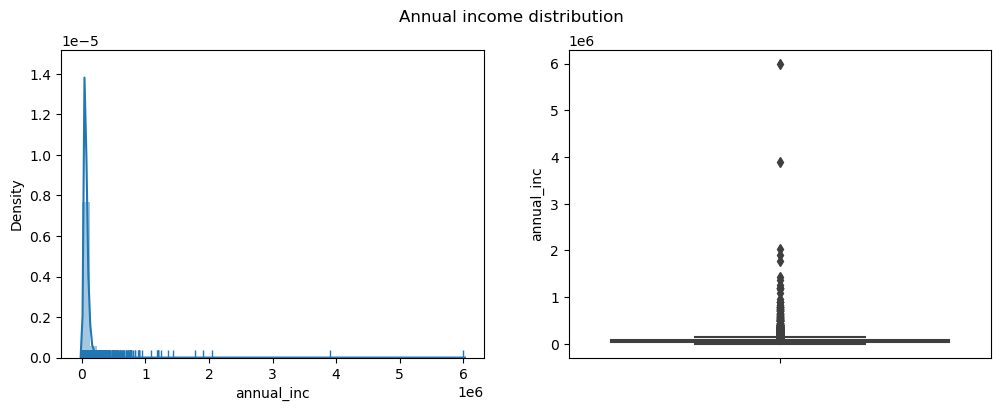

In [29]:
var1 = cleaned_loan_df.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=var1)
plt.suptitle('Annual income distribution')
plt.show()

### dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

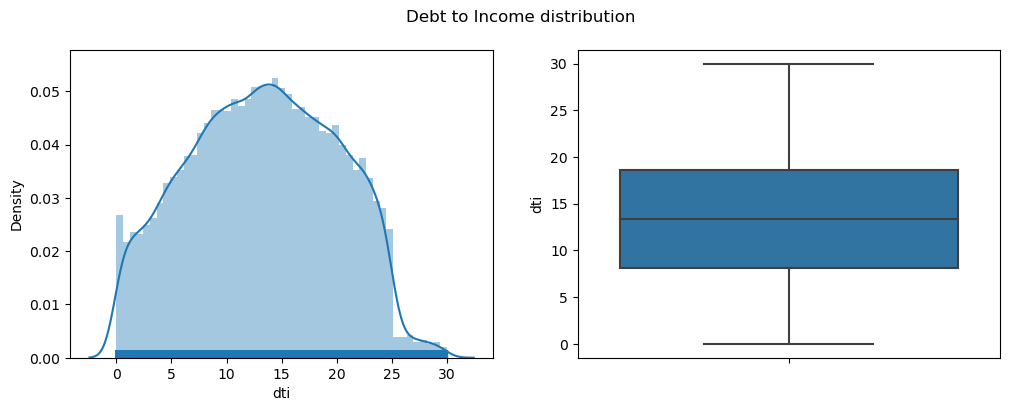

In [30]:
var1 = cleaned_loan_df.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

### Pub rec
Number of Public derogatory records

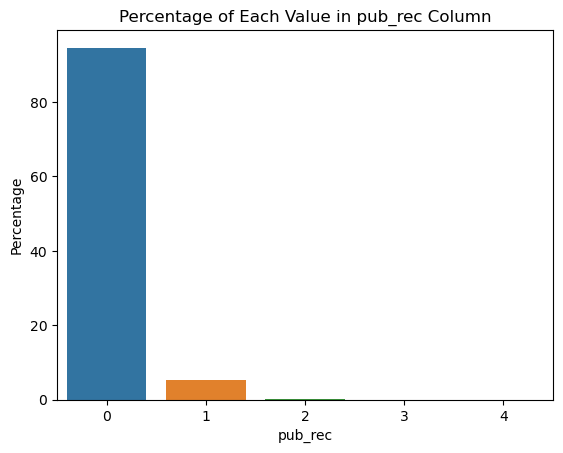

In [31]:

percentage_values = cleaned_loan_df['pub_rec'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('pub_rec')
plt.ylabel('Percentage')

plt.title('Percentage of Each Value in pub_rec Column')

# Show plot
plt.show()


### pub_rec_bankruptcies
Number of public record bankruptcies

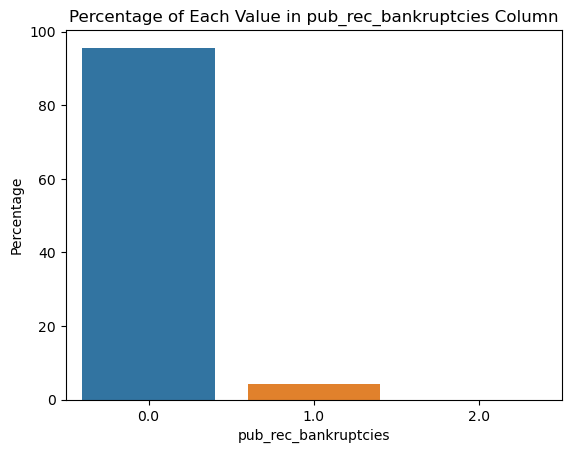

In [32]:

percentage_values = cleaned_loan_df['pub_rec_bankruptcies'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in pub_rec_bankruptcies Column')

# Show plot
plt.show()

### issue_d 
Loan Issue Date

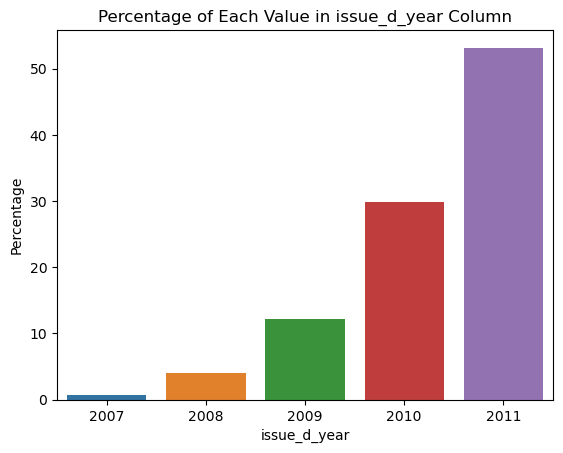

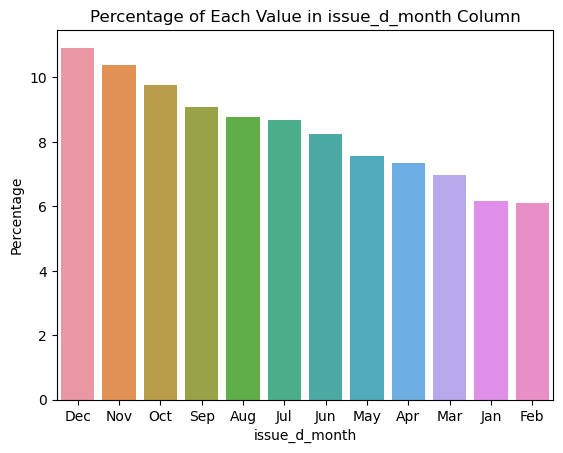

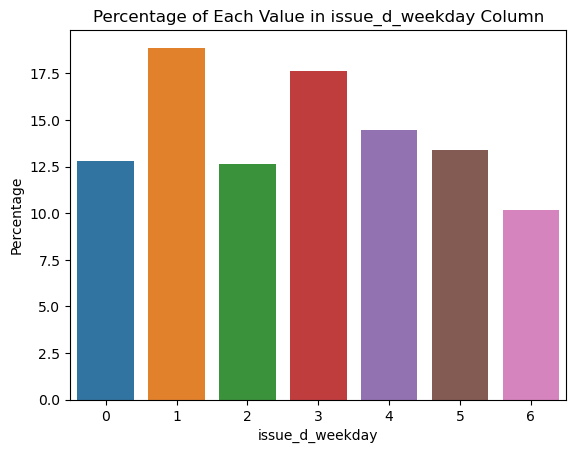

In [33]:
var = 'issue_d_year'

percentage_values = cleaned_loan_df['issue_d_year'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('issue_d_year')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in issue_d_year Column')

# Show plot
plt.show()


percentage_values = cleaned_loan_df['issue_d_month'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('issue_d_month')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in issue_d_month Column')

# Show plot
plt.show()


percentage_values = cleaned_loan_df['issue_d_weekday'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('issue_d_weekday')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in issue_d_weekday Column')

plt.show()


### earliest_cr_line
Erliest Credit line

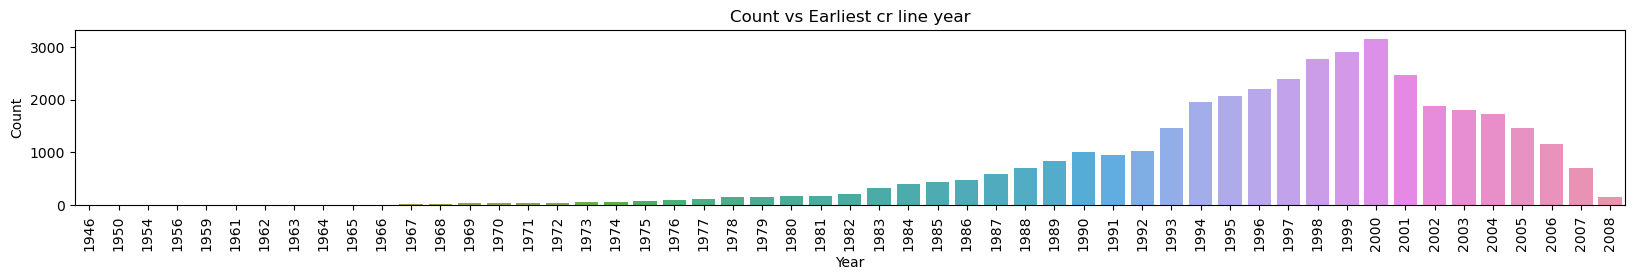

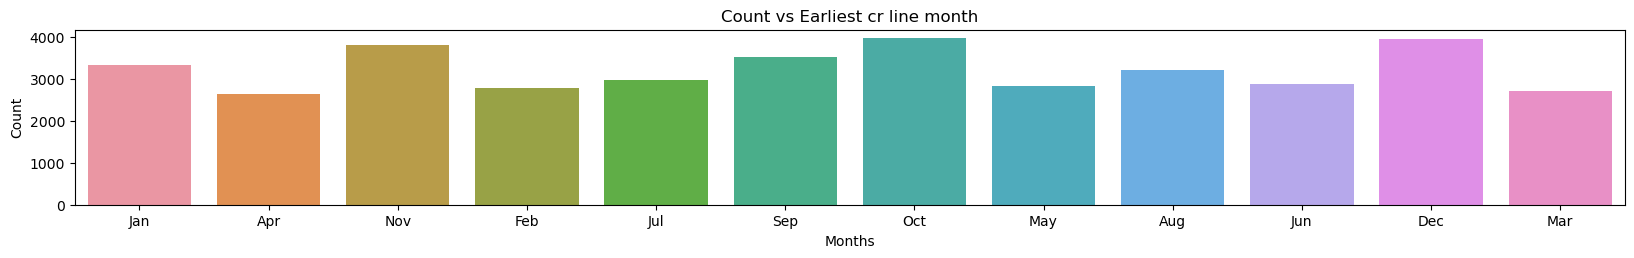

In [34]:


plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(x=cleaned_loan_df.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(x=cleaned_loan_df.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

### term

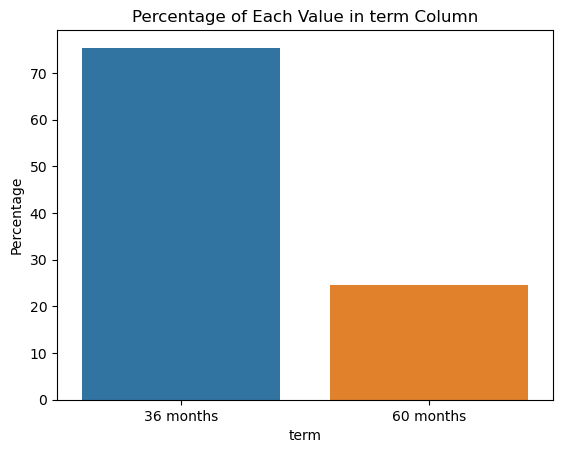

In [35]:

percentage_values = cleaned_loan_df['term'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('term')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in term Column')

plt.show()

### Grade

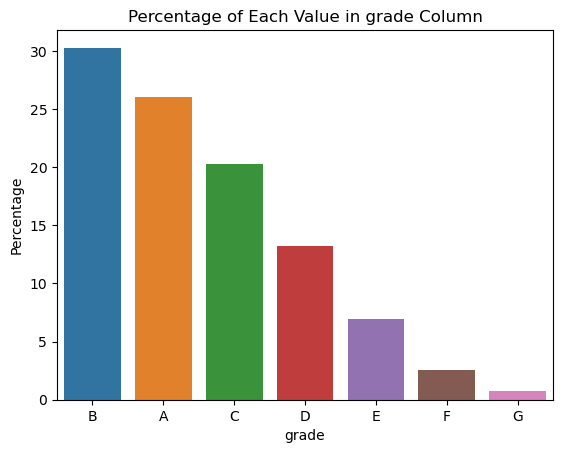

In [36]:

percentage_values = cleaned_loan_df['grade'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('grade')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in grade Column')

plt.show()

### Sub Grade

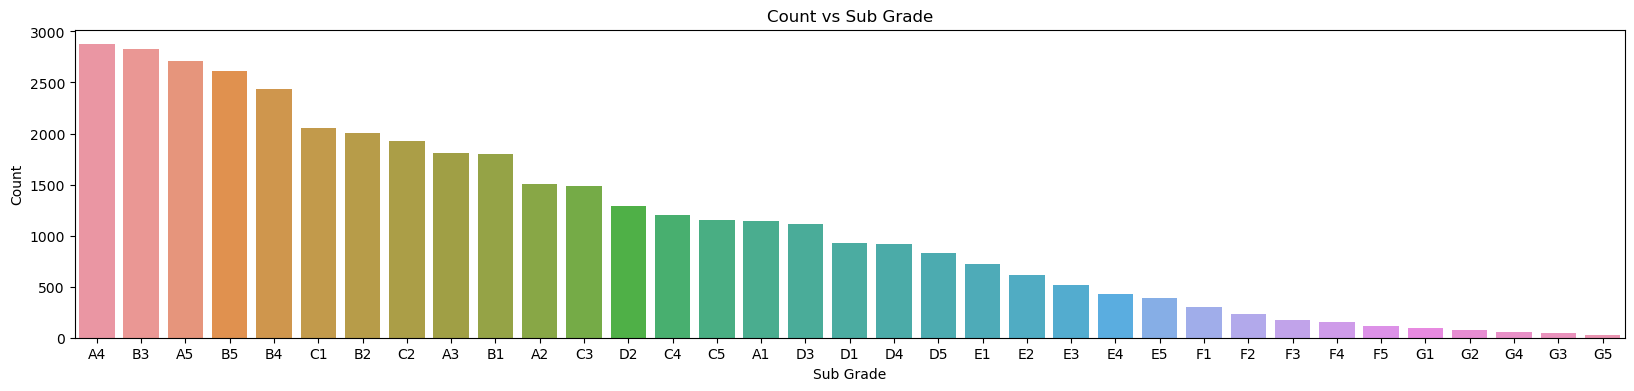

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(x=cleaned_loan_df.sub_grade, order=cleaned_loan_df.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length

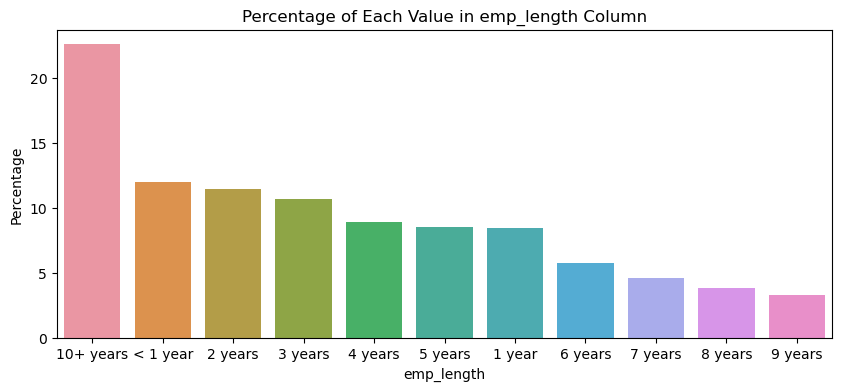

In [38]:
plt.figure(figsize=(10,4))

#Probability / Percentage of each values
percentage_values = cleaned_loan_df['emp_length'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('emp_length')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in emp_length Column')

plt.show()

### Home Ownership

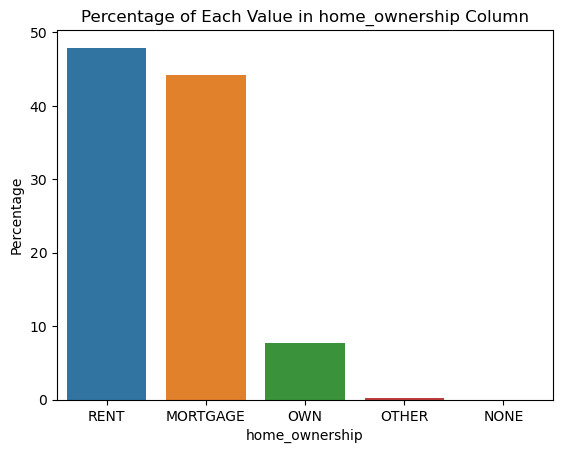

In [39]:
percentage_values = cleaned_loan_df['home_ownership'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('home_ownership')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in home_ownership Column')

plt.show()

### Verification Status

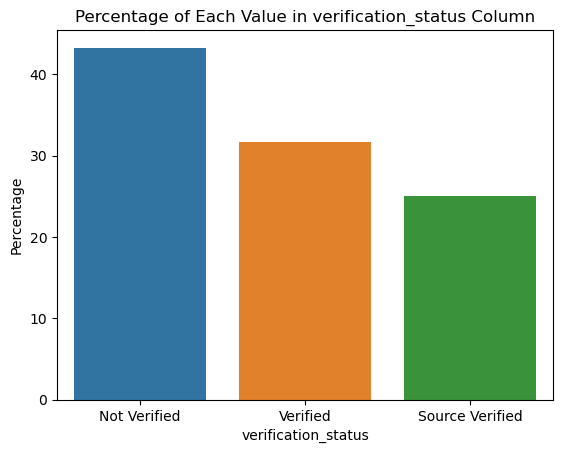

In [40]:
percentage_values = cleaned_loan_df['verification_status'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('verification_status')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in verification_status Column')

plt.show()

### Loan Status

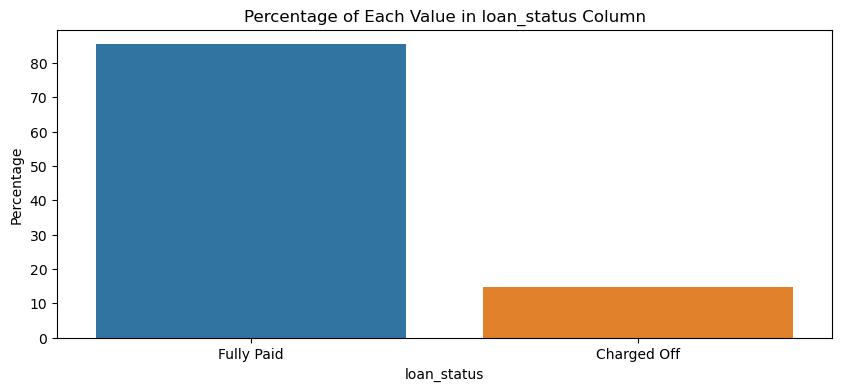

In [41]:
plt.figure(figsize=(10,4))

percentage_values = cleaned_loan_df['loan_status'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('loan_status')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in loan_status Column')

plt.show()

### Purpose

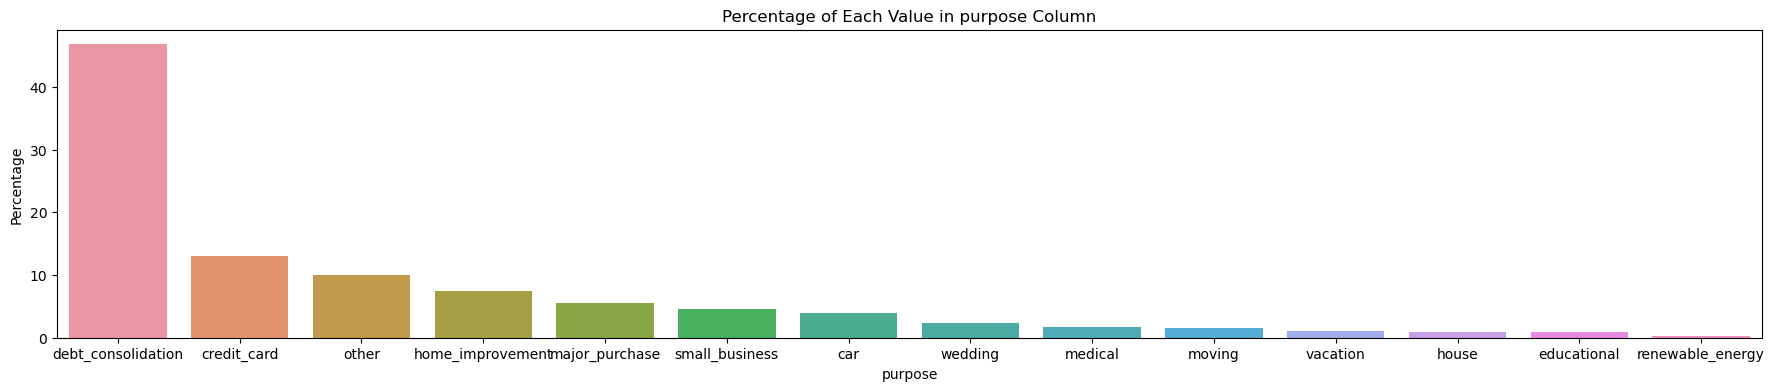

In [42]:
plt.figure(figsize=(22,4))

percentage_values = cleaned_loan_df['purpose'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('purpose')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in purpose Column')

plt.show()

### add_state
The state provided by the borrower in the loan application

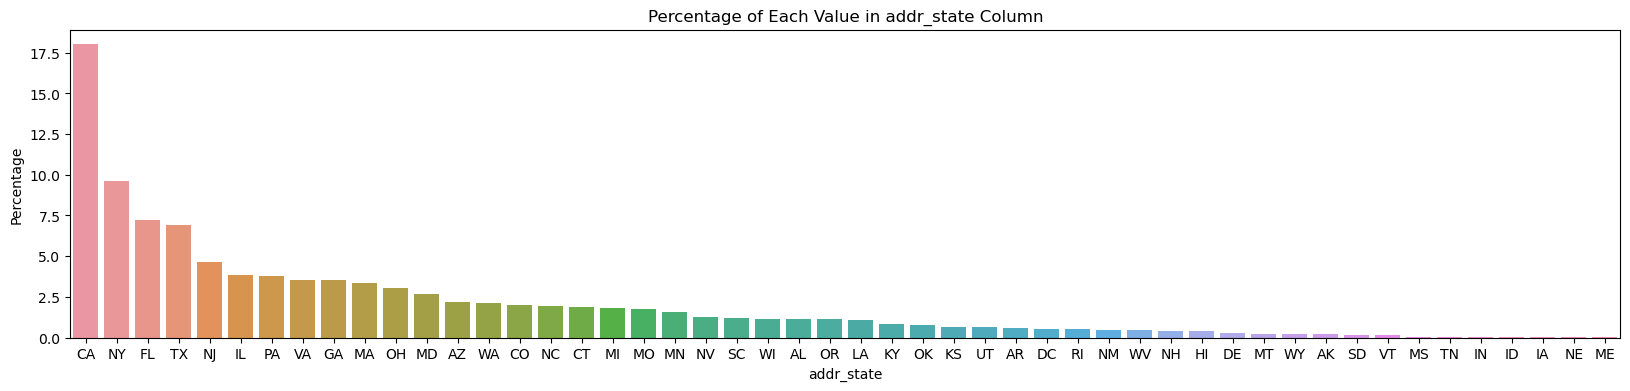

In [43]:
plt.figure(figsize=(20,4))

percentage_values = cleaned_loan_df['addr_state'].value_counts(normalize=True) * 100

# Create a bar plot using Seaborn
sns.barplot(x=percentage_values.index, y=percentage_values.values)

# Set labels and title
plt.xlabel('addr_state')
plt.ylabel('Percentage')
plt.title('Percentage of Each Value in addr_state Column')

plt.show()





# Segmented Univariate Analysis

Loan Amount

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

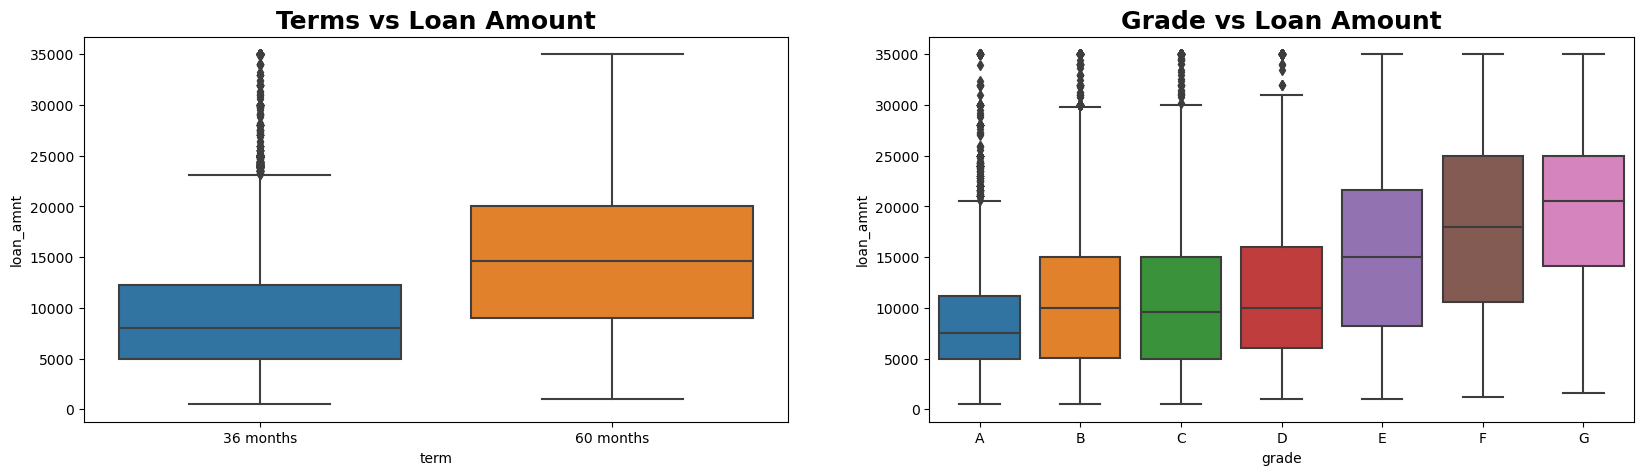

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.title('Terms vs Loan Amount', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Grade vs Loan Amount', fontweight='bold',fontsize=18)
#Finding grades with sorted alphabetical order
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=cleaned_loan_df.loan_amnt, order = grade_ord, data=cleaned_loan_df)

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

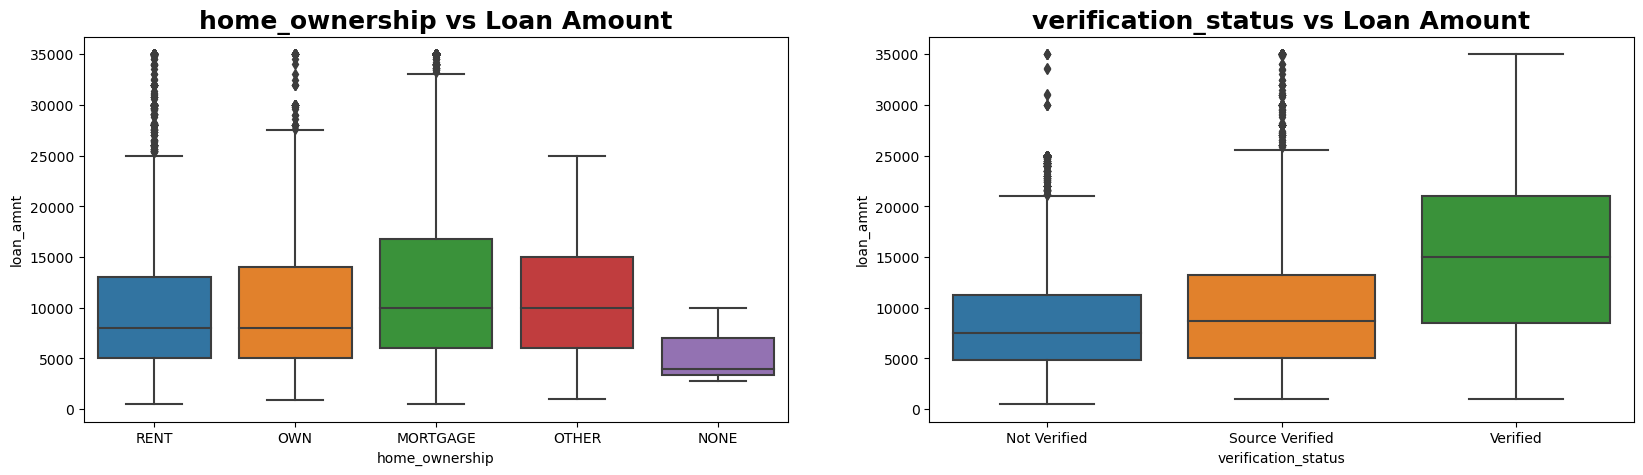

In [128]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.title('home_ownership vs Loan Amount', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('verification_status vs Loan Amount', fontweight='bold',fontsize=18)
verification_status_ord = cleaned_loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=cleaned_loan_df.loan_amnt, order = verification_status_ord, data=cleaned_loan_df)

Text(0.5, 1.0, 'loan_status vs Loan Amount')

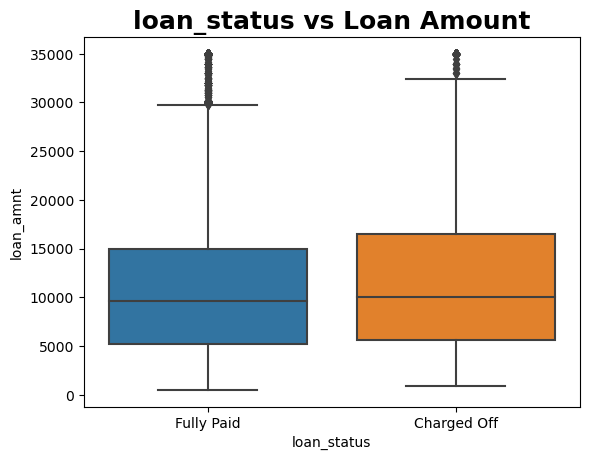

In [129]:

sns.boxplot(x='loan_status', y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.title('loan_status vs Loan Amount', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'purpose vs Loan Amount')

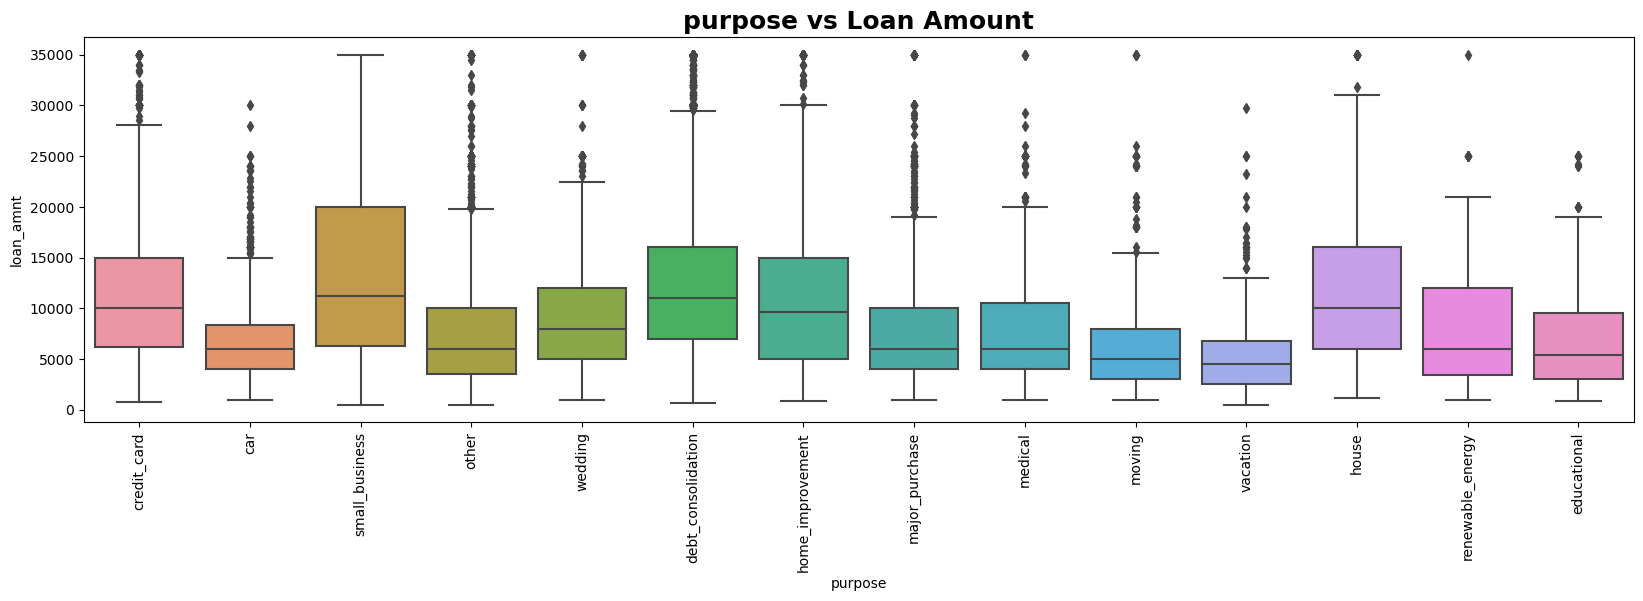

In [130]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount', fontweight='bold',fontsize=18)


Text(0.5, 1.0, 'emp_length vs Loan Amount')

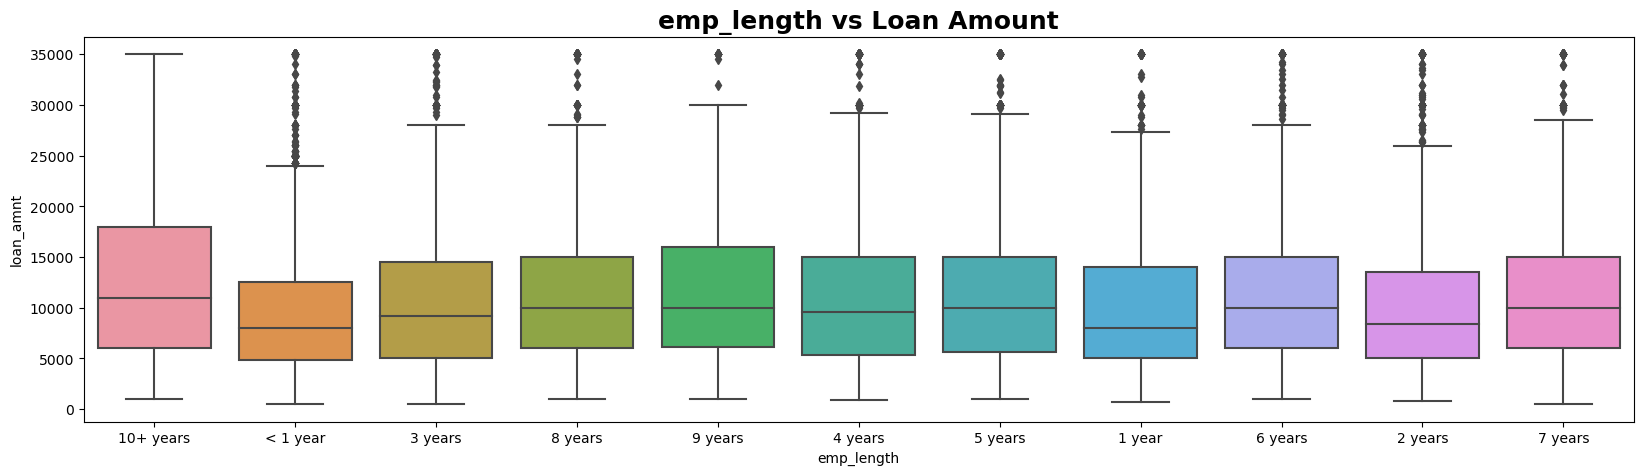

In [131]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.title('emp_length vs Loan Amount', fontweight='bold',fontsize=18)

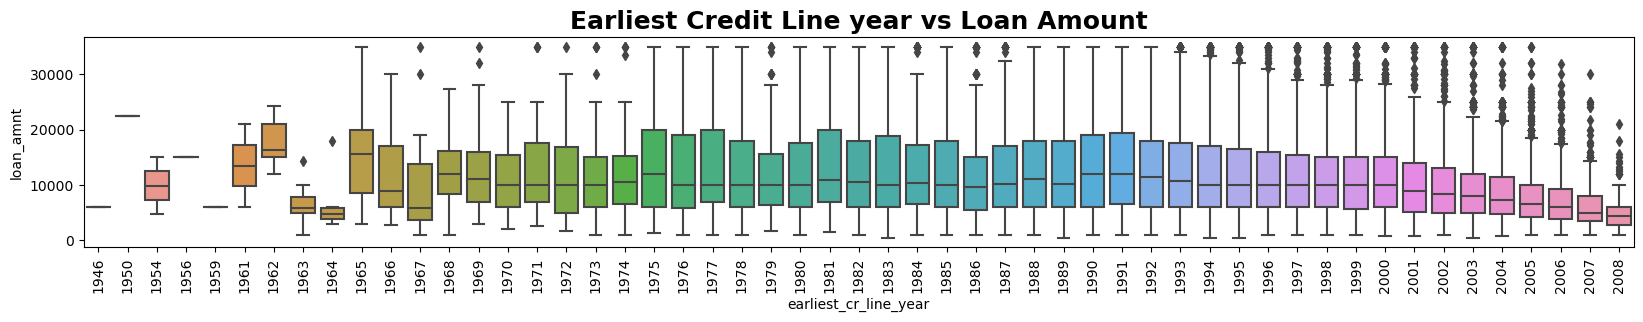

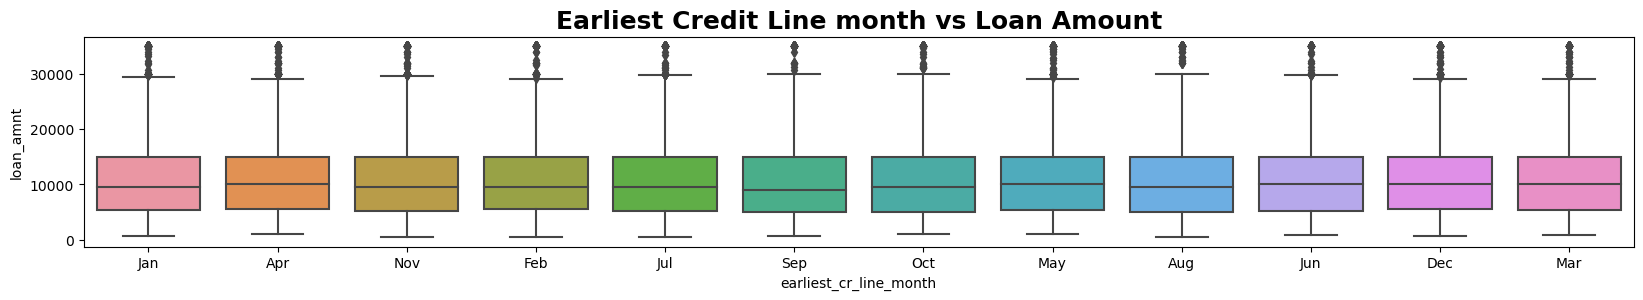

In [132]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=cleaned_loan_df.earliest_cr_line_year, y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount', fontweight='bold',fontsize=18)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=cleaned_loan_df.earliest_cr_line_month, y=cleaned_loan_df.loan_amnt, data=cleaned_loan_df)
plt.title('Earliest Credit Line month vs Loan Amount', fontweight='bold',fontsize=18)
plt.show()

### funded_amnt

<Axes: title={'center': 'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

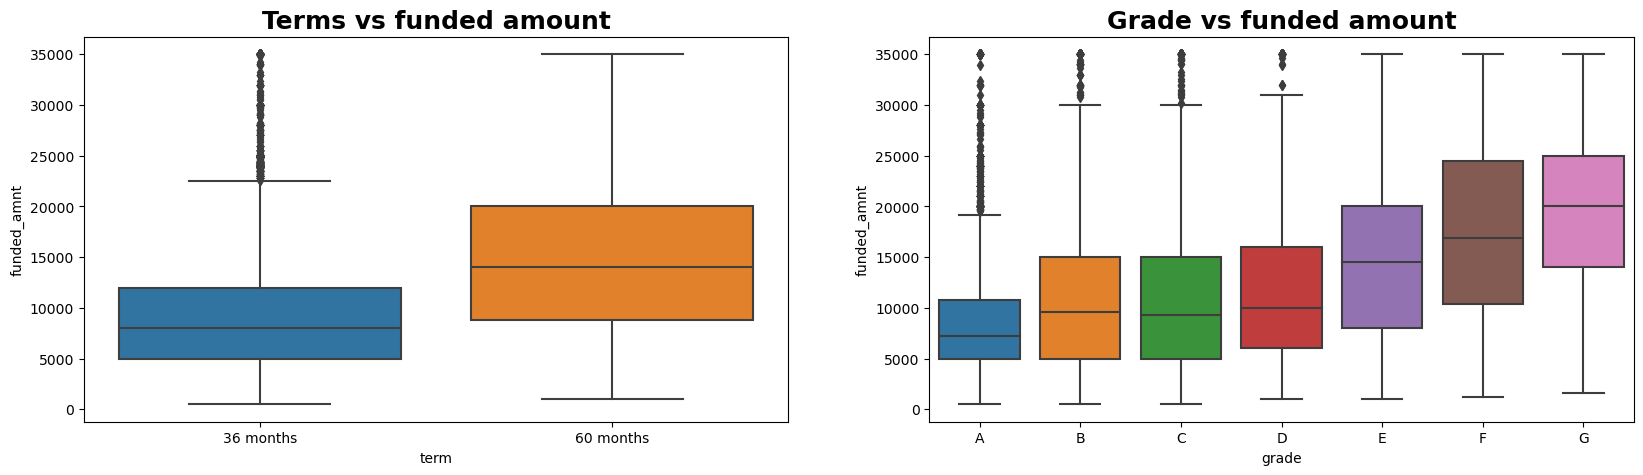

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('Terms vs funded amount', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Grade vs funded amount', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=cleaned_loan_df.funded_amnt, order = grade_ord, data=cleaned_loan_df)

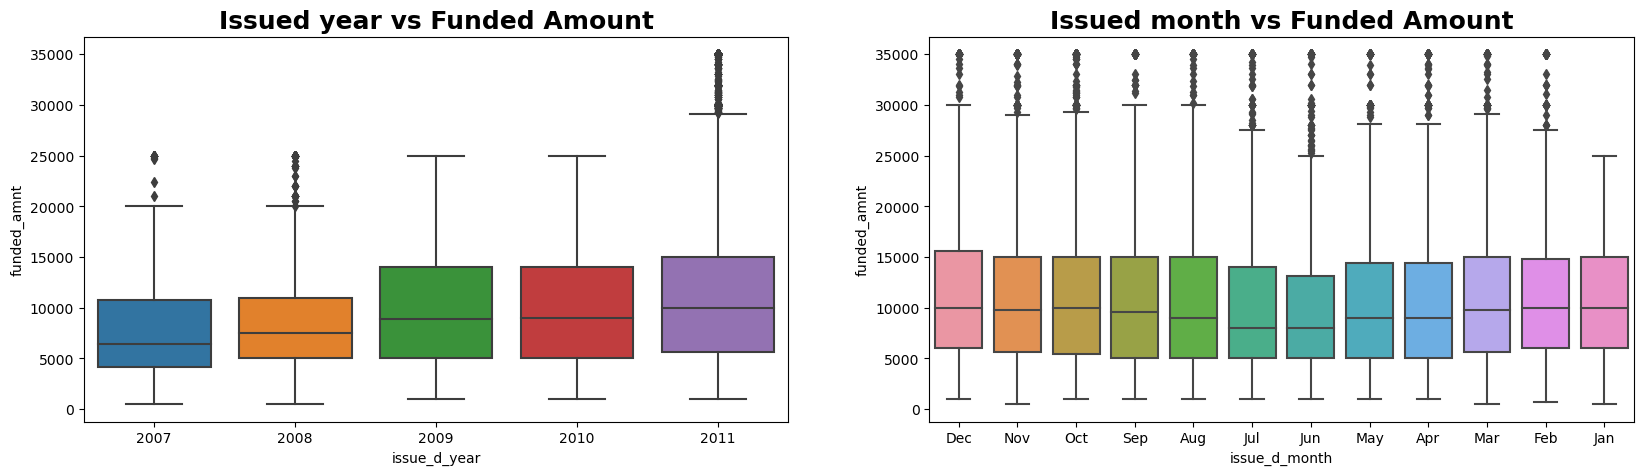

In [133]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=cleaned_loan_df.issue_d_year, y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('Issued year vs Funded Amount', fontweight='bold',fontsize=18)
plt.subplot(122)
sns.boxplot(x=cleaned_loan_df.issue_d_month, y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('Issued month vs Funded Amount', fontweight='bold',fontsize=18)
plt.show()

Text(0.5, 1.0, 'loan_status vs Funded amnt')

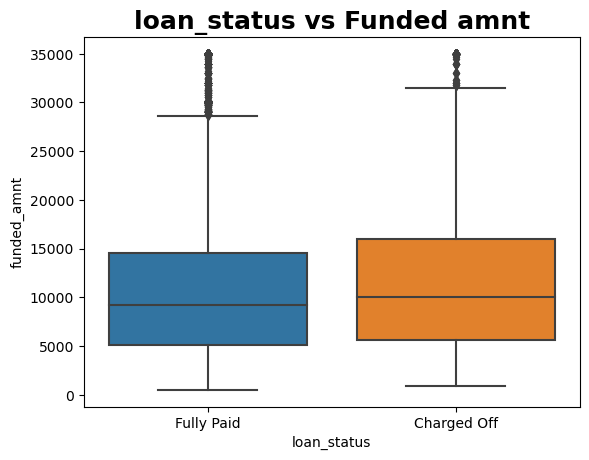

In [46]:
sns.boxplot(x='loan_status', y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('loan_status vs Funded amnt', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'purpose vs funded amount')

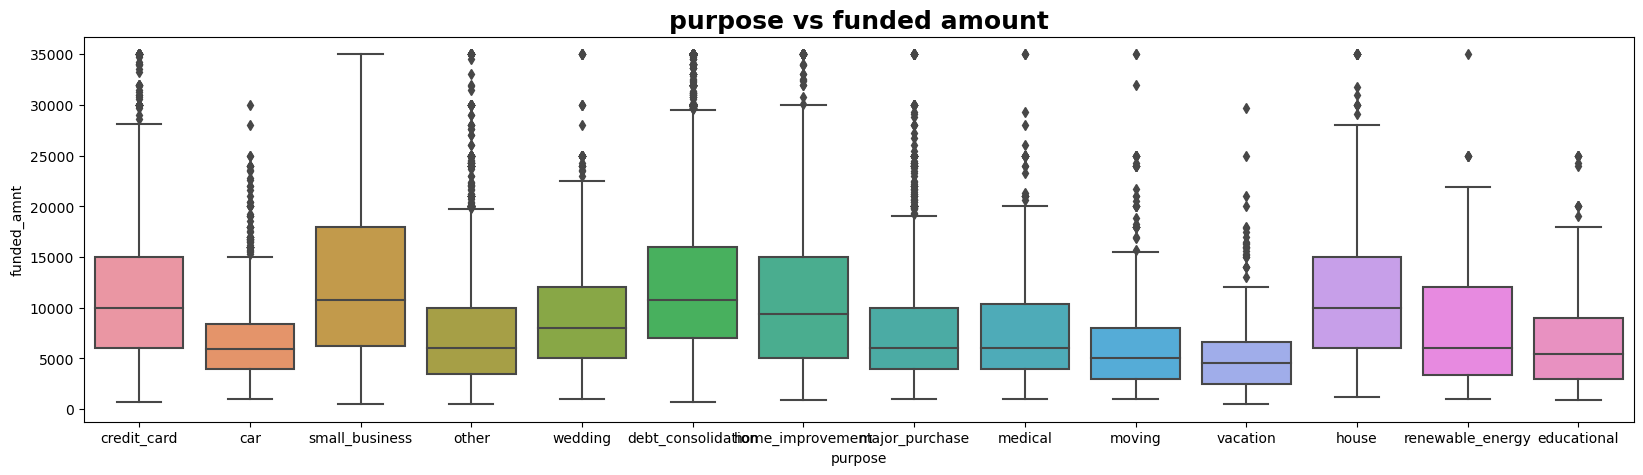

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('purpose vs funded amount', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'emp_length vs funded amount')

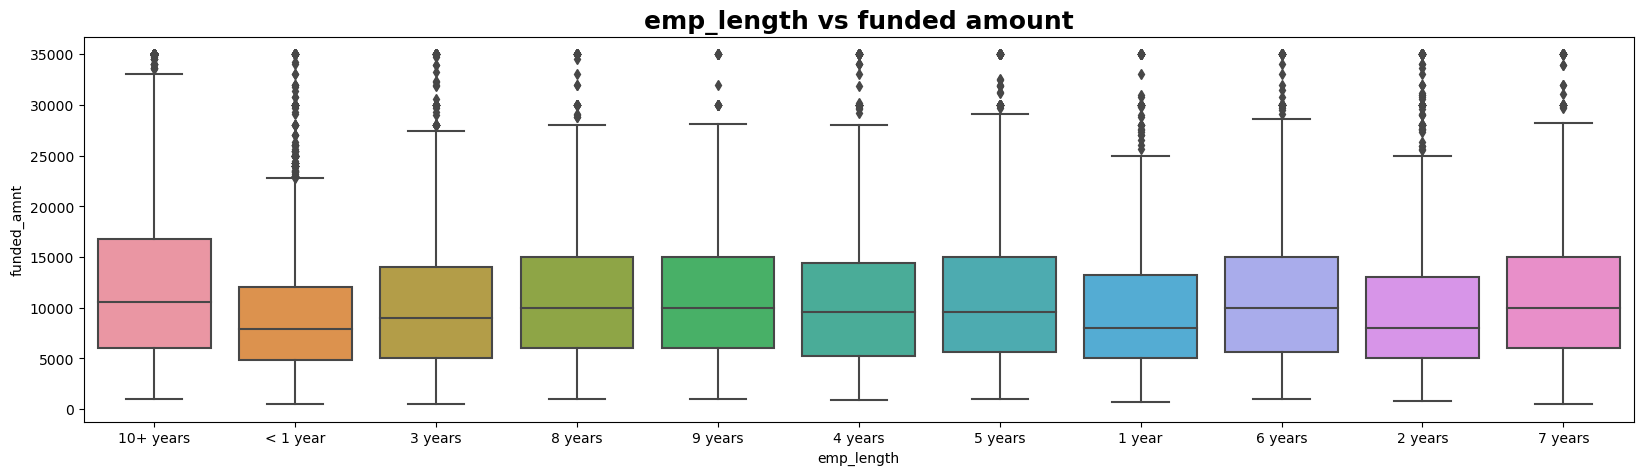

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.funded_amnt, data=cleaned_loan_df)
plt.title('emp_length vs funded amount', fontweight='bold',fontsize=18)

### int_rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

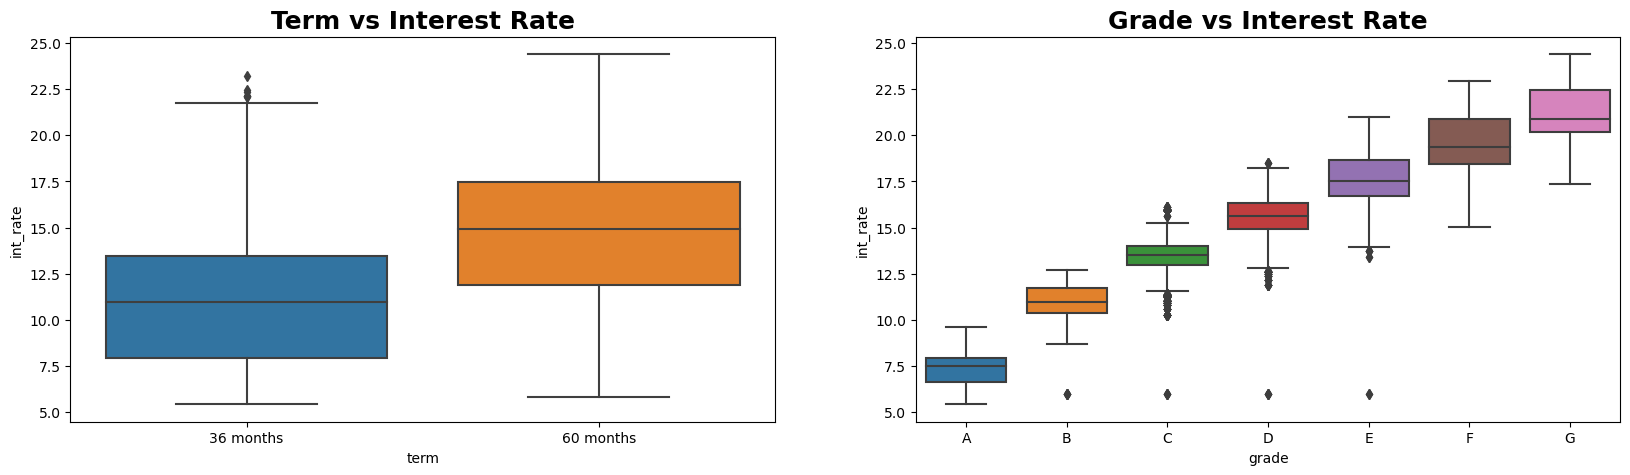

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('Term vs Interest Rate', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Grade vs Interest Rate', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=cleaned_loan_df.int_rate, order = grade_ord, data=cleaned_loan_df)

<Axes: title={'center': 'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

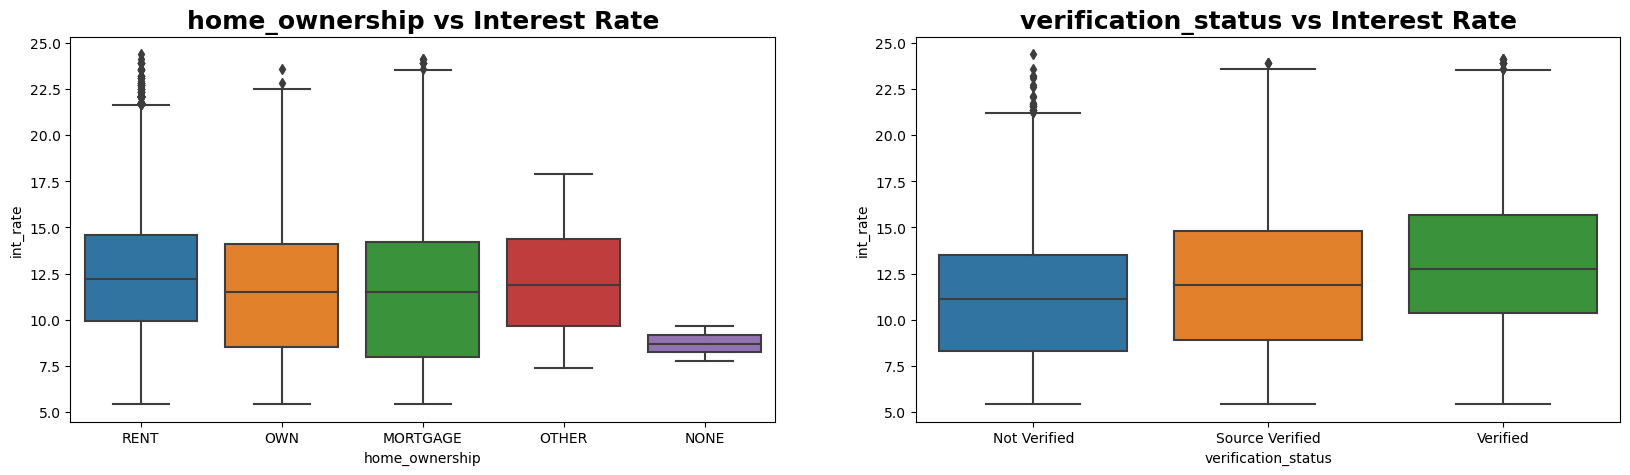

In [121]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('home_ownership vs Interest Rate', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('verification_status vs Interest Rate', fontweight='bold',fontsize=18)
verification_status_ord = cleaned_loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=cleaned_loan_df.int_rate, order = verification_status_ord, data=cleaned_loan_df)

Text(0.5, 1.0, 'loan_status vs Interest Rate')

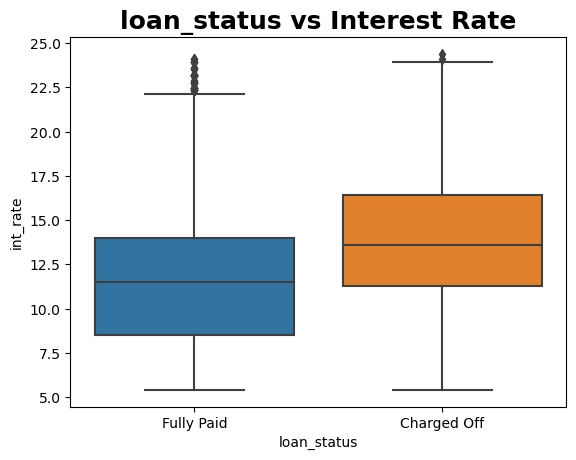

In [122]:
sns.boxplot(x='loan_status', y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('loan_status vs Interest Rate', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'purpose vs Interest Rate')

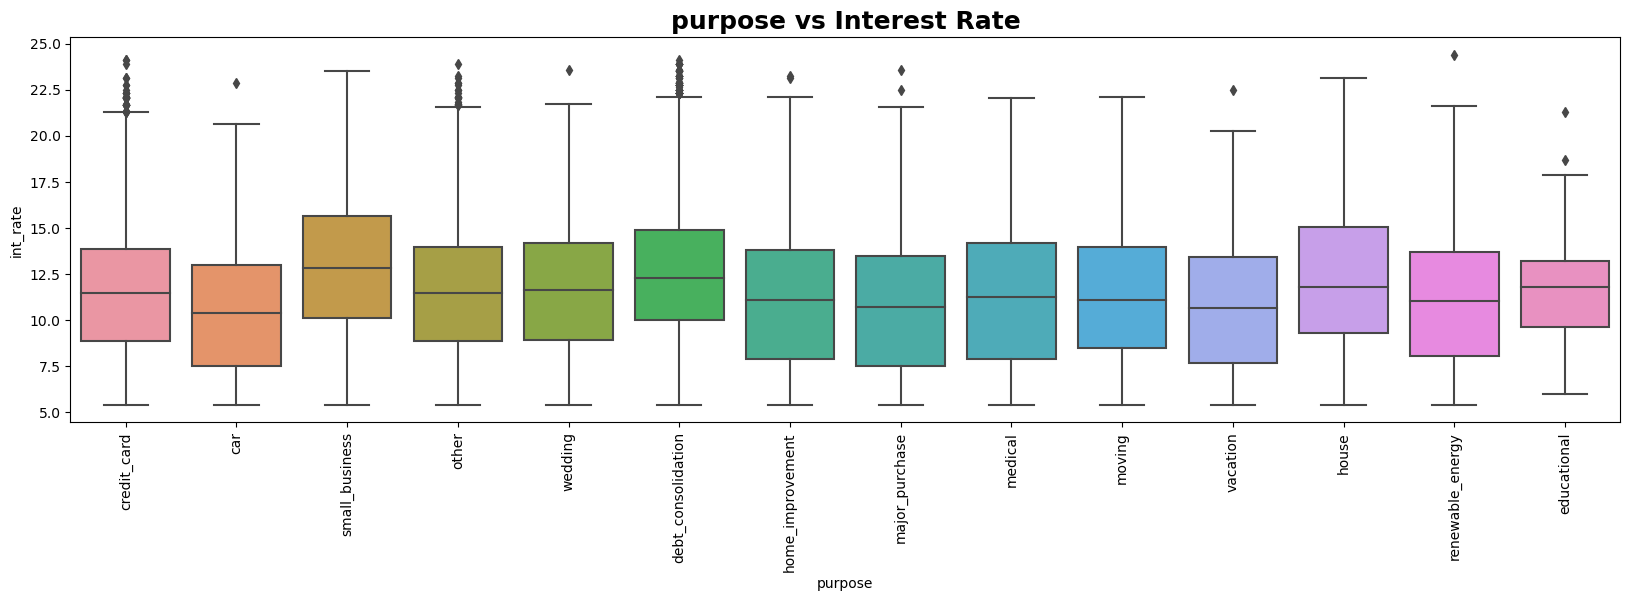

In [123]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'emp_length vs Interest Rate')

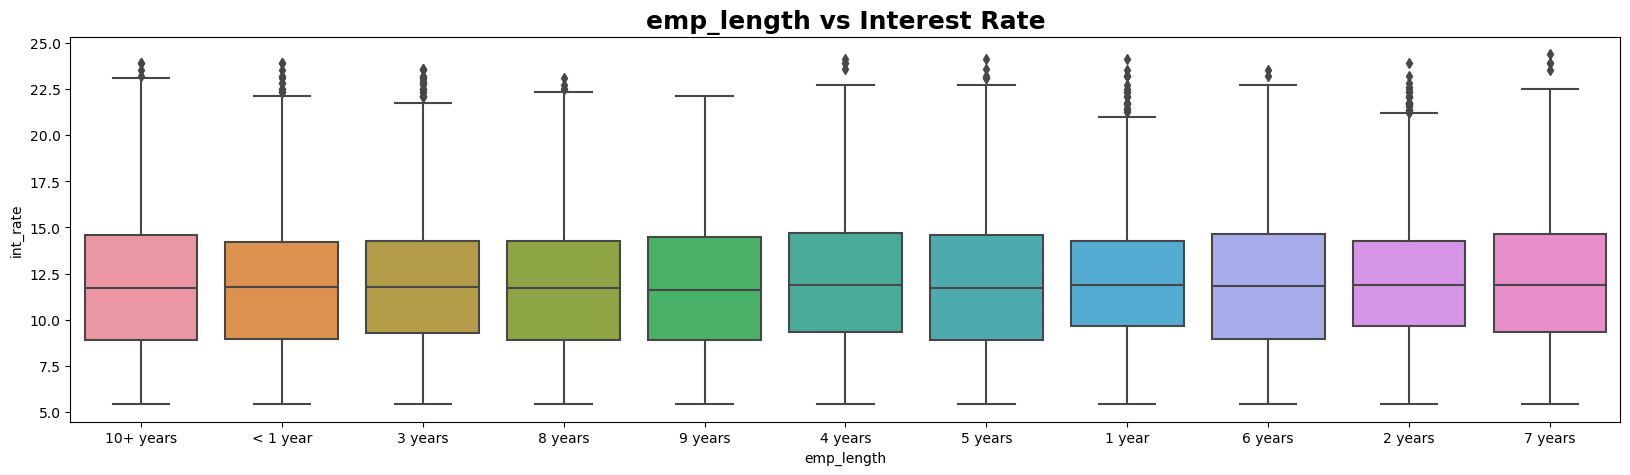

In [124]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('emp_length vs Interest Rate', fontweight='bold',fontsize=18)

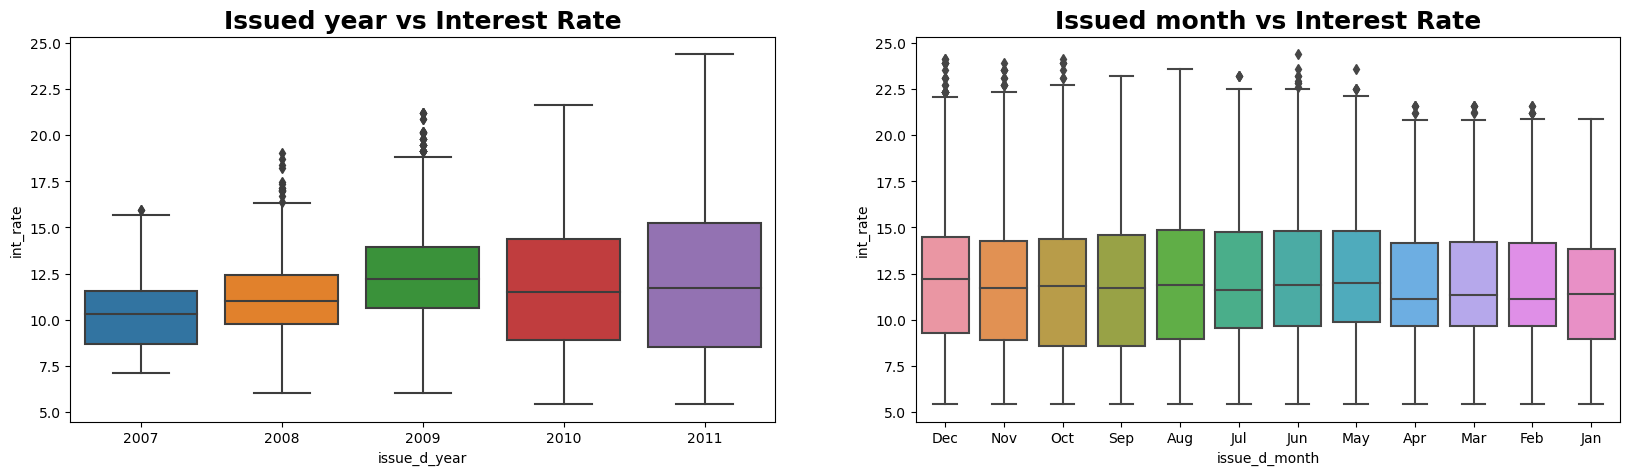

In [52]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=cleaned_loan_df.issue_d_year, y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('Issued year vs Interest Rate', fontweight='bold',fontsize=18)
plt.subplot(122)
sns.boxplot(x=cleaned_loan_df.issue_d_month, y=cleaned_loan_df.int_rate, data=cleaned_loan_df)
plt.title('Issued month vs Interest Rate', fontweight='bold',fontsize=18)
plt.show()

### annual_inc

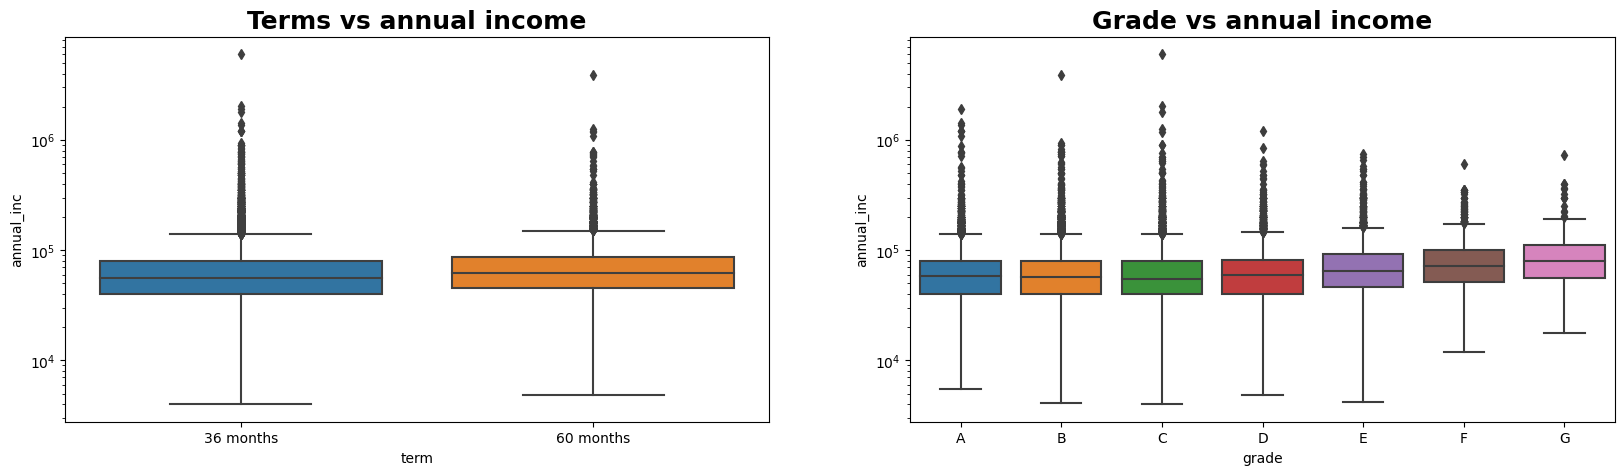

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('Terms vs annual income', fontweight='bold',fontsize=18)
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=cleaned_loan_df.annual_inc, order = grade_ord, data=cleaned_loan_df)
plt.yscale('log')

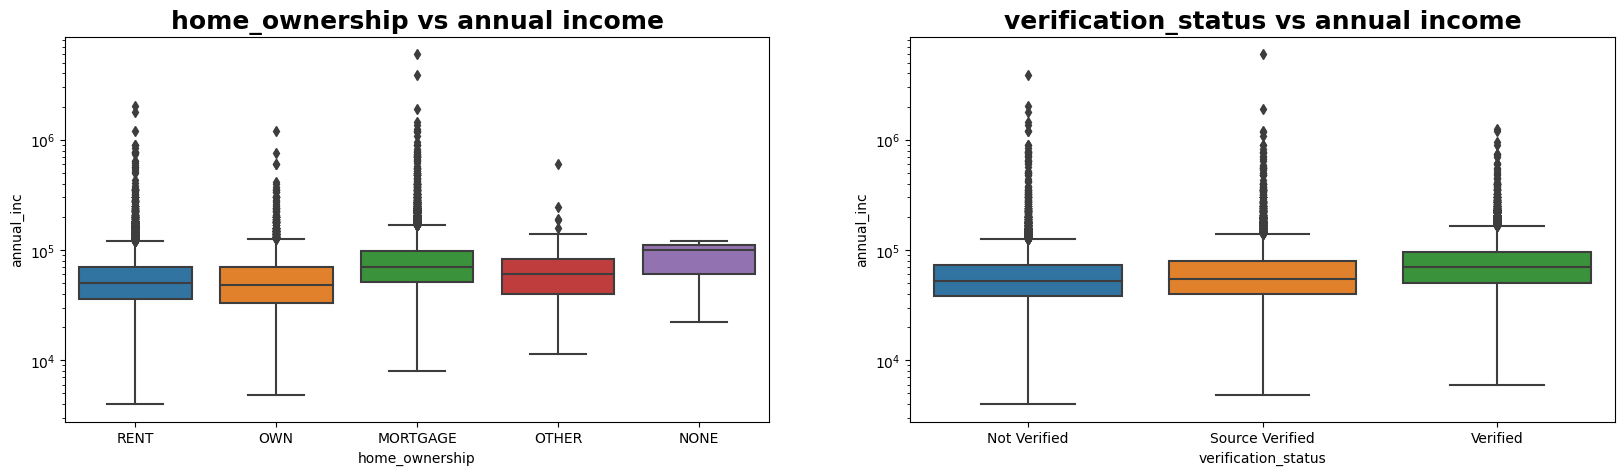

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('home_ownership vs annual income', fontweight='bold',fontsize=18)
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income', fontweight='bold',fontsize=18)
verification_status_ord = cleaned_loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=cleaned_loan_df.annual_inc, order = verification_status_ord, data=cleaned_loan_df)
plt.yscale('log')

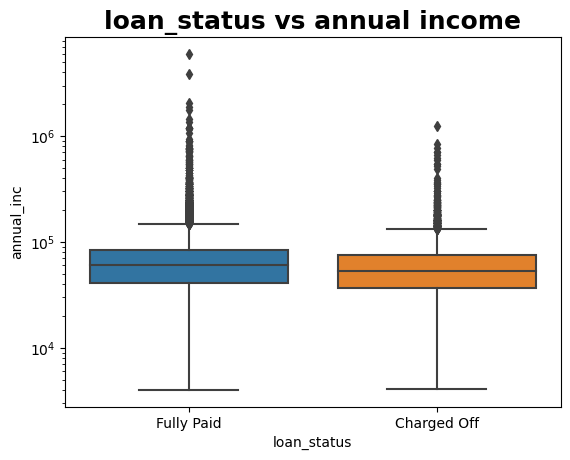

In [55]:
sns.boxplot(x='loan_status', y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('loan_status vs annual income', fontweight='bold',fontsize=18)
plt.yscale('log')

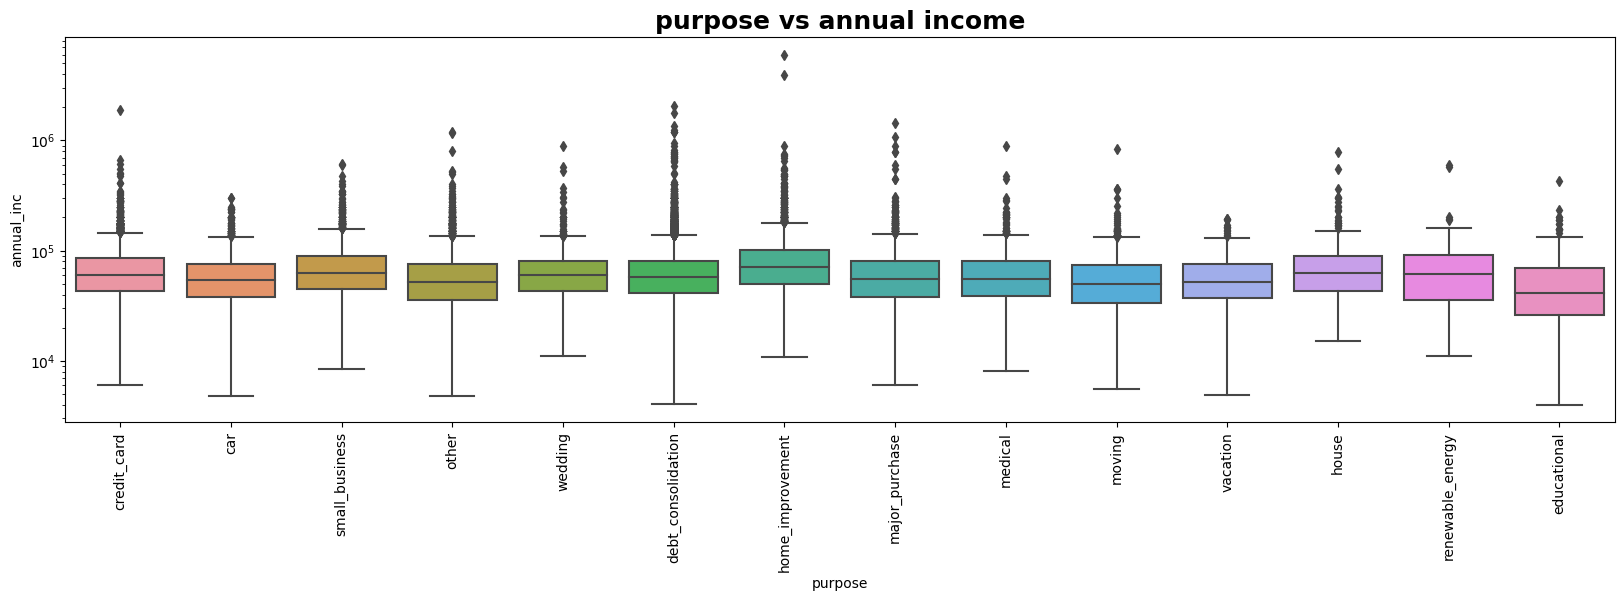

In [56]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs annual income', fontweight='bold',fontsize=18)
plt.yscale('log')

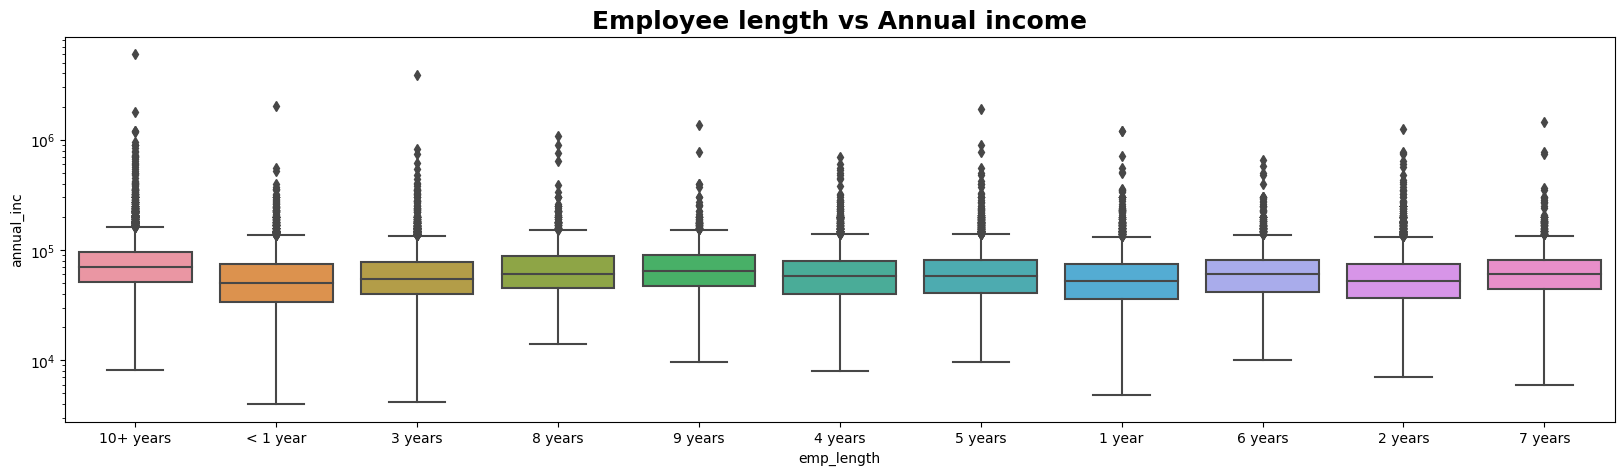

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('Employee length vs Annual income', fontweight='bold',fontsize=18)
plt.yscale('log')

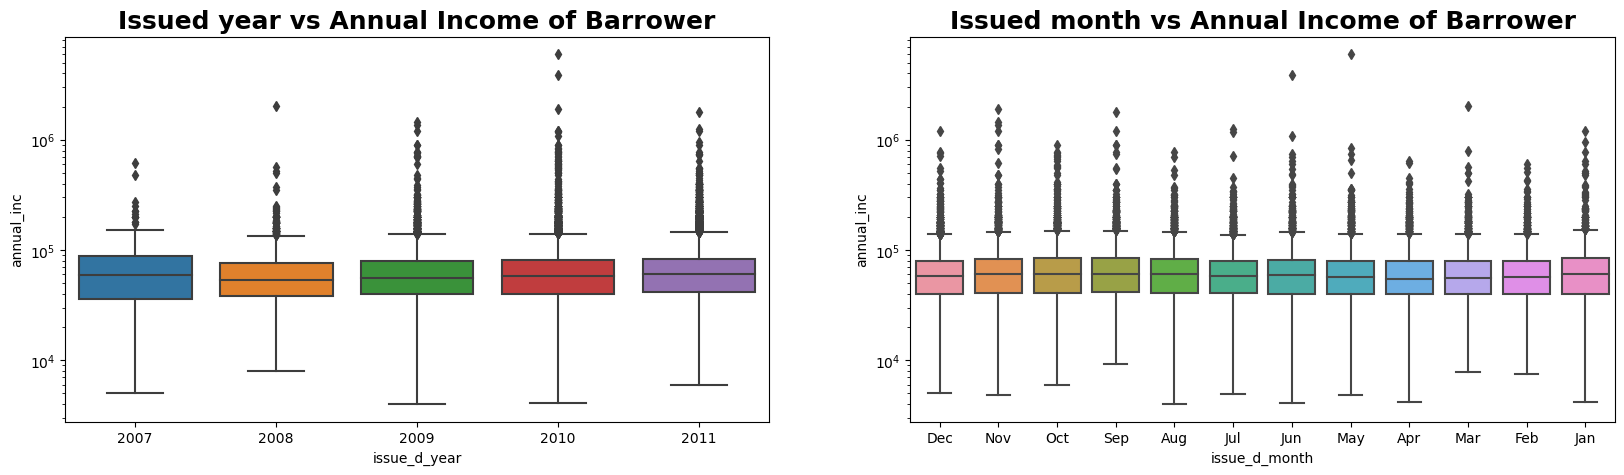

In [58]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=cleaned_loan_df.issue_d_year, y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('Issued year vs Annual Income of Barrower', fontweight='bold',fontsize=18)
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=cleaned_loan_df.issue_d_month, y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('Issued month vs Annual Income of Barrower', fontweight='bold',fontsize=18)
plt.yscale('log')
plt.show()

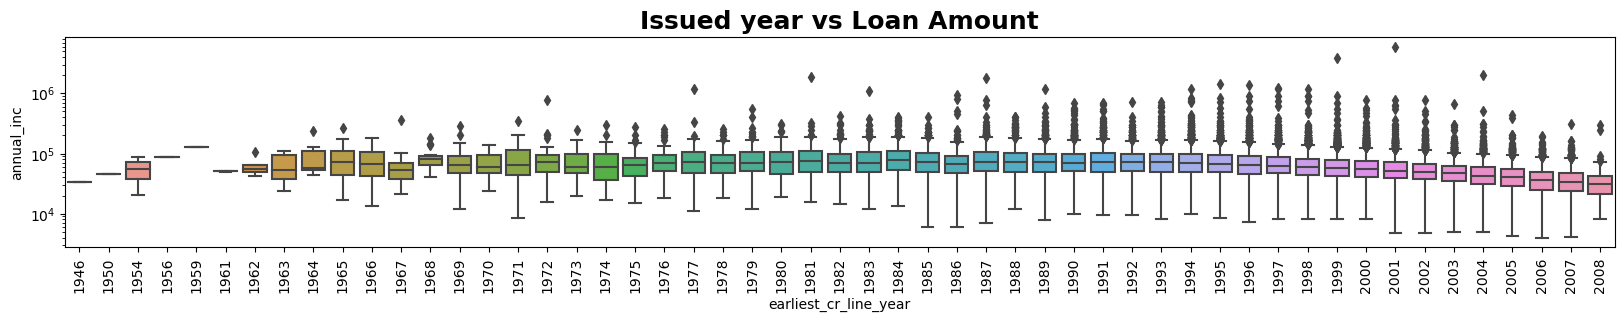

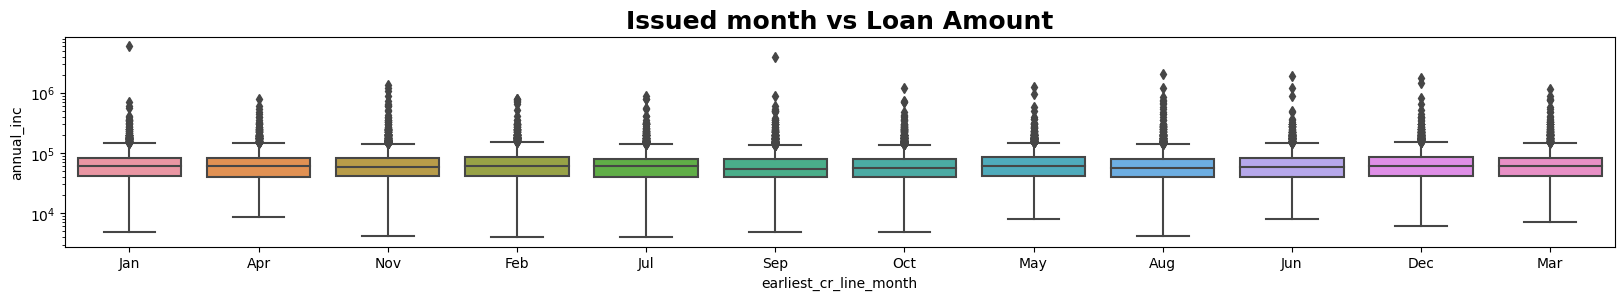

In [59]:
# earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=cleaned_loan_df.earliest_cr_line_year, y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount', fontweight='bold',fontsize=18)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=cleaned_loan_df.earliest_cr_line_month, y=cleaned_loan_df.annual_inc, data=cleaned_loan_df)
plt.title('Issued month vs Loan Amount', fontweight='bold',fontsize=18)
plt.yscale('log')
plt.show()

### DTI
Debt to Income Ratio

<Axes: title={'center': 'Grade vs dti'}, xlabel='grade', ylabel='dti'>

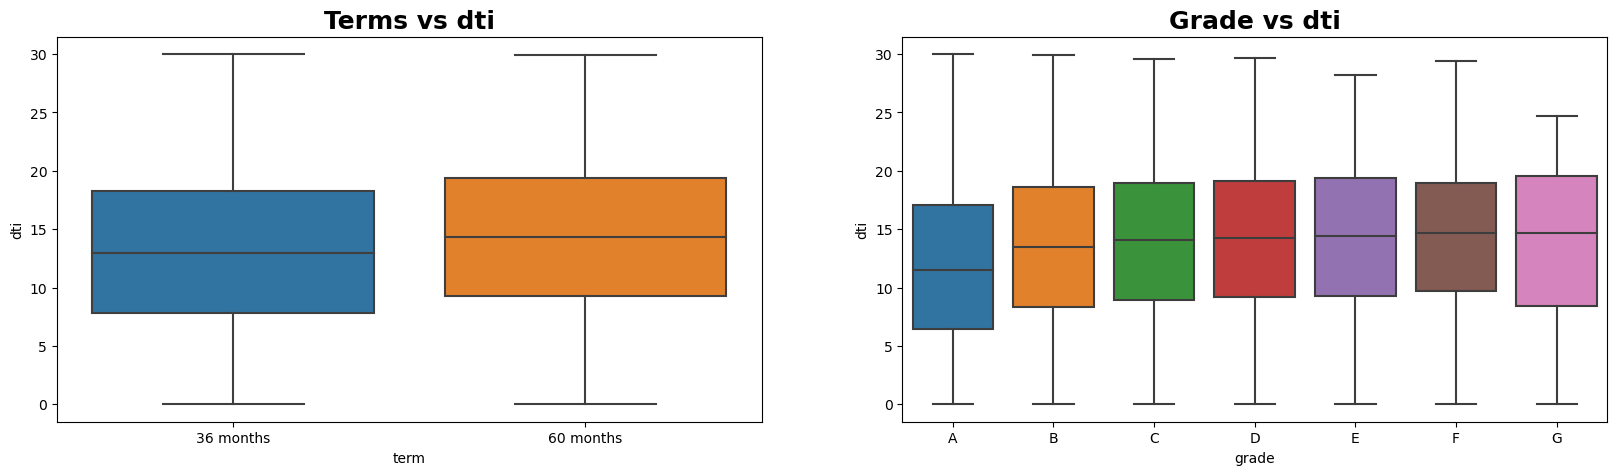

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=cleaned_loan_df.dti, data=cleaned_loan_df)
plt.title('Terms vs dti', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Grade vs dti', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=cleaned_loan_df.dti, order = grade_ord, data=cleaned_loan_df)

<Axes: title={'center': 'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

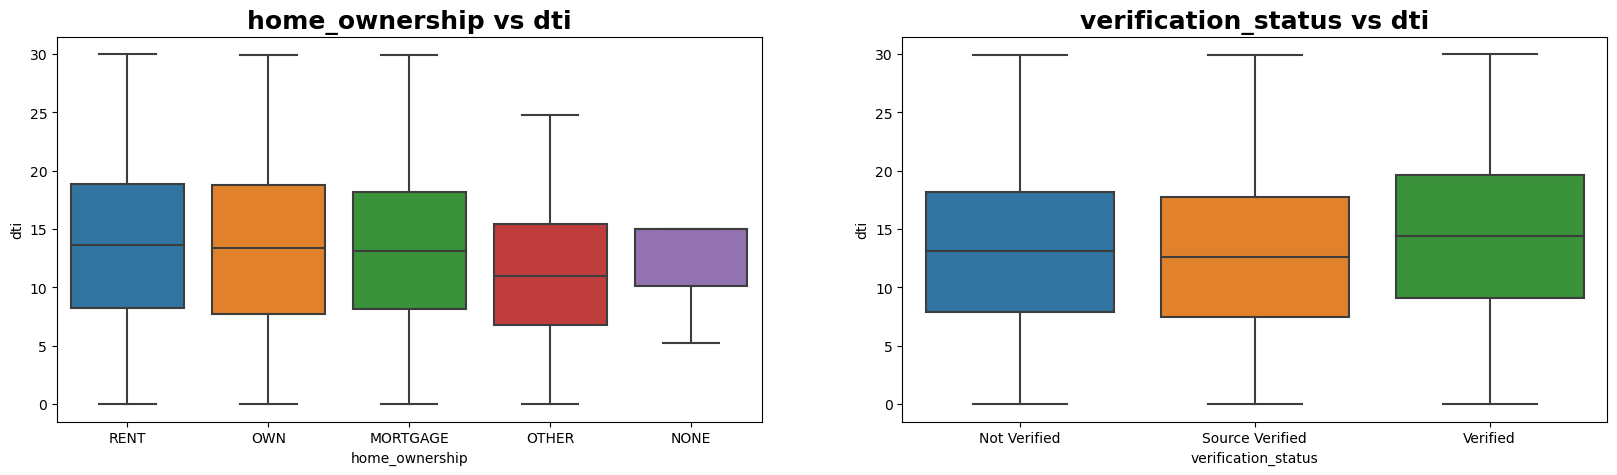

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=cleaned_loan_df.dti, data=cleaned_loan_df)
plt.title('home_ownership vs dti', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('verification_status vs dti', fontweight='bold',fontsize=18)
verification_status_ord = cleaned_loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=cleaned_loan_df.dti, order = verification_status_ord, data=cleaned_loan_df)

Text(0.5, 1.0, 'loan_status vs dti')

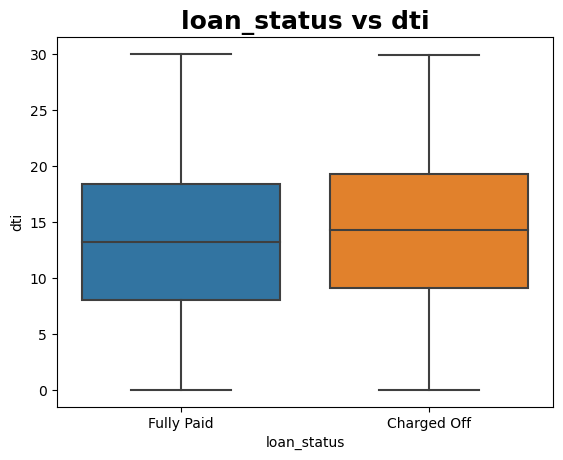

In [62]:
sns.boxplot(x='loan_status', y=cleaned_loan_df.dti, data=cleaned_loan_df)
plt.title('loan_status vs dti', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'purpose vs dti')

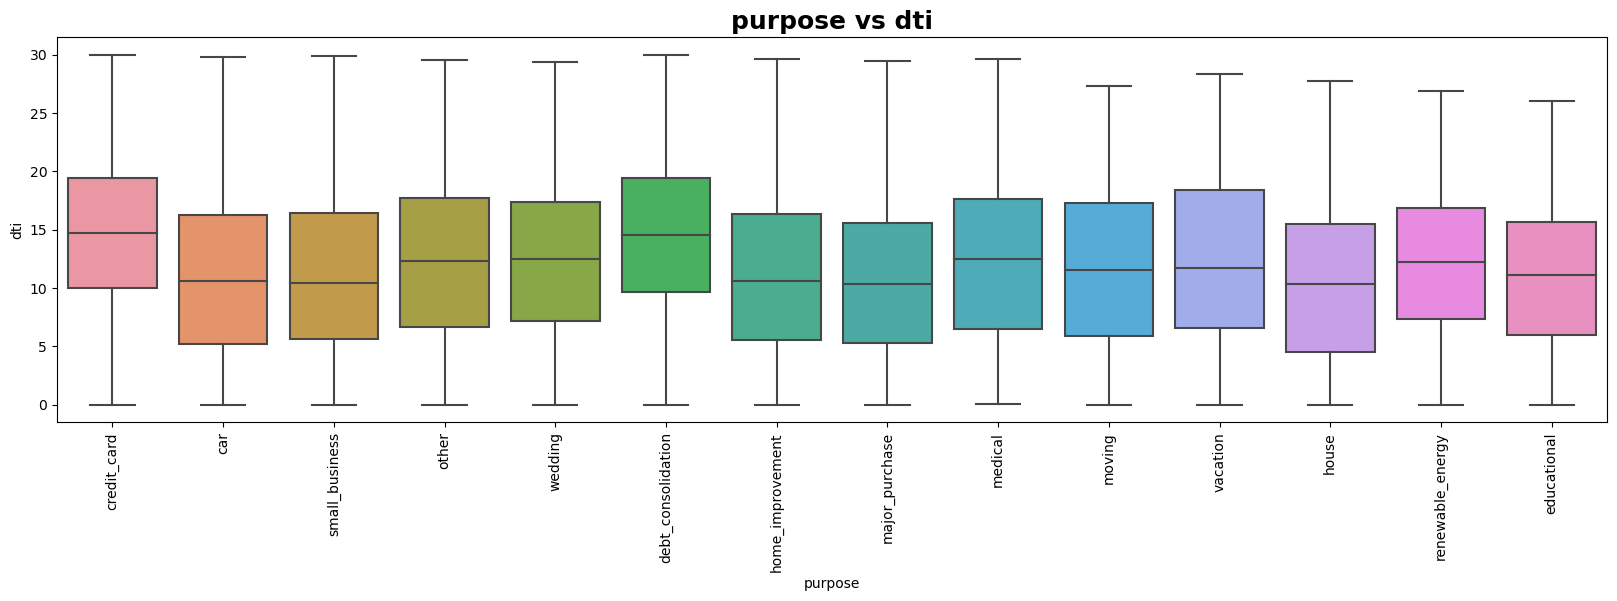

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.dti, data=cleaned_loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs dti', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'emp_length vs dti')

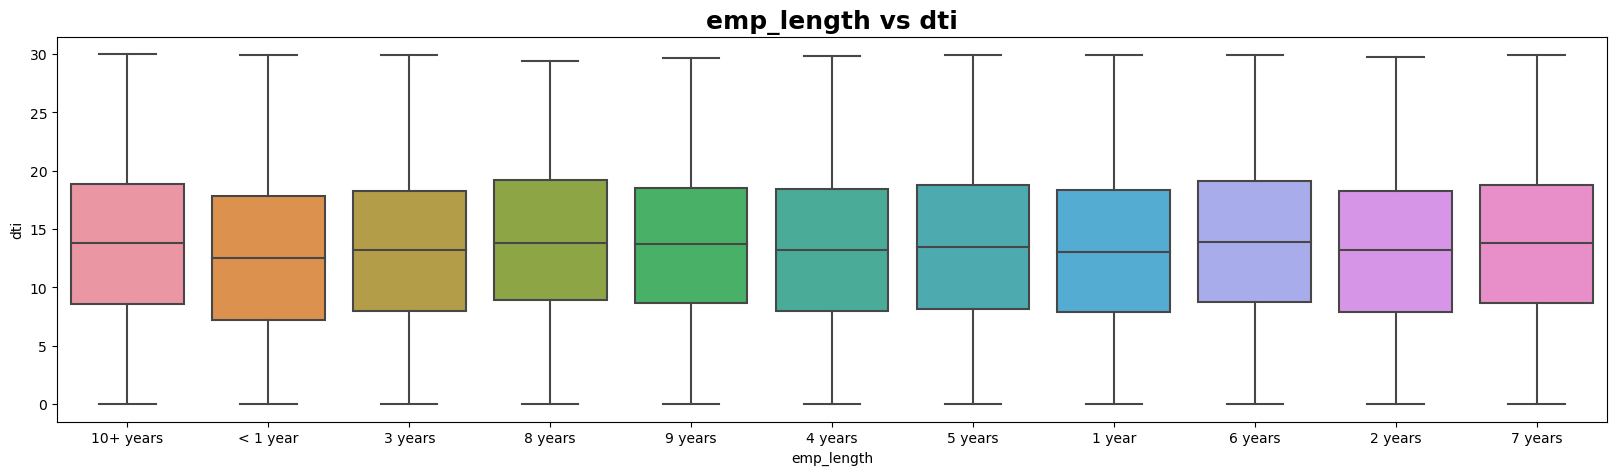

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.dti, data=cleaned_loan_df)
plt.title('emp_length vs dti', fontweight='bold',fontsize=18)

### pub_rec
Number of derogatory public records


In [65]:

df = cleaned_loan_df.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())
df


pub_rec       term     id  proportion
0        0  36 months  27582    0.755526
1        0  60 months   8925    0.244474
2        1  36 months   1467    0.728763
3        1  60 months    546    0.271237
4        2  36 months     38    0.791667
5        2  60 months     10    0.208333
6        3  36 months      7    1.000000
7        4  36 months      2    1.000000

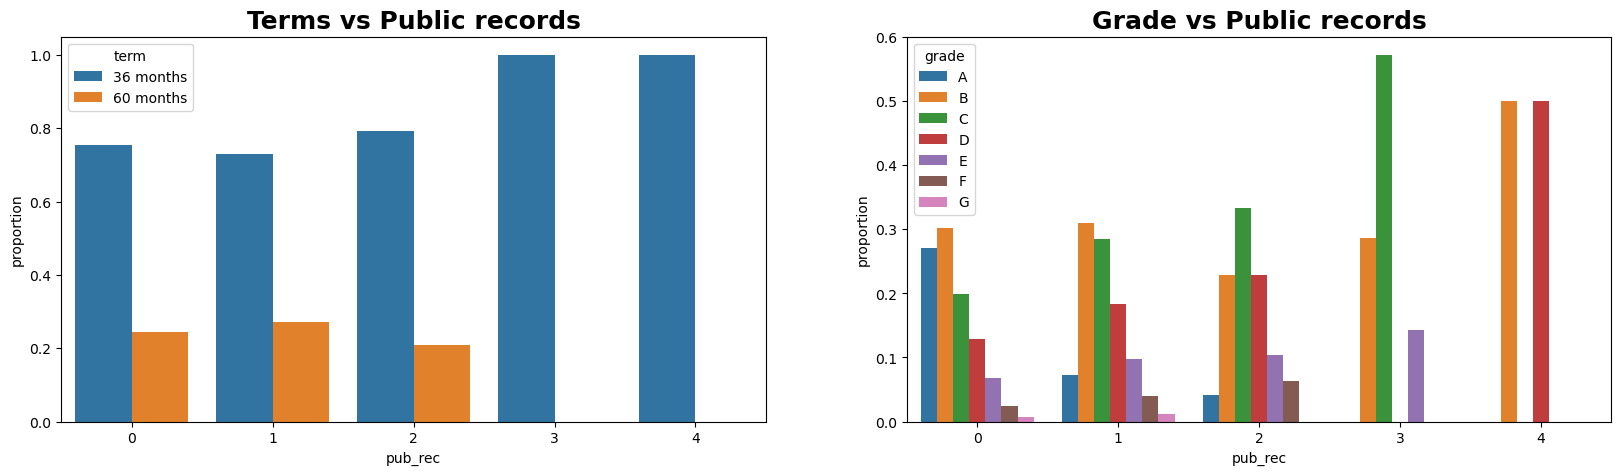

In [66]:
plt.figure(figsize=(20, 5))

# Grouping by 'pub_rec' and 'term' to plot 'Terms vs Public records'
df_term = cleaned_loan_df.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df_term['proportion'] = df_term.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df_term)
plt.title('Terms vs Public records', fontweight='bold',fontsize=18)

# Grouping by 'pub_rec' and 'grade' to plot 'Grade vs Public records'
df_grade = cleaned_loan_df.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df_grade['proportion'] = df_grade.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

plt.subplot(122)
plt.title('Grade vs Public records', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df_grade)

plt.show()

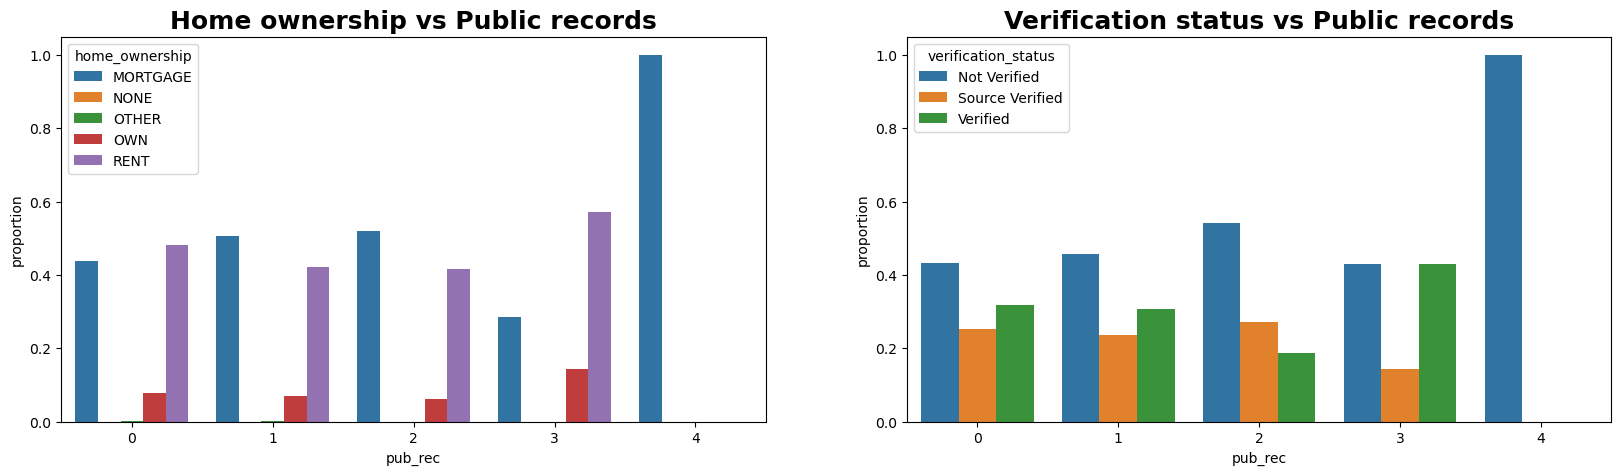

In [67]:

plt.figure(figsize=(20, 5))

# Grouping by 'pub_rec' and 'home_ownership'
df_home = cleaned_loan_df.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df_home['proportion'] = df_home.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df_home)
plt.title('Home ownership vs Public records', fontweight='bold',fontsize=18)

# Grouping by 'pub_rec' and 'verification_status'
df_verification = cleaned_loan_df.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df_verification['proportion'] = df_verification.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df_verification)
plt.title('Verification status vs Public records', fontweight='bold',fontsize=18)

plt.show()

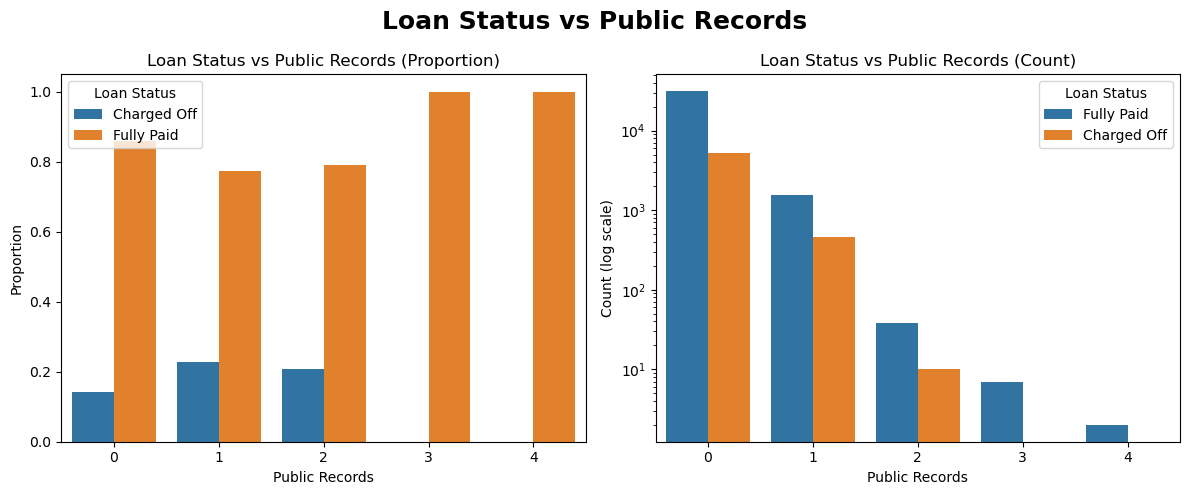

In [68]:
#Proportion of values for each category

df = cleaned_loan_df.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(12, 5))

# First subplot: Bar plot with proportions
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)
plt.title('Loan Status vs Public Records (Proportion)')
plt.xlabel('Public Records')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')

# Second subplot: Count plot with logarithmic scale
plt.subplot(122)
sns.countplot(x='pub_rec', hue='loan_status', data=cleaned_loan_df)
plt.yscale('log')
plt.title('Loan Status vs Public Records (Count)')
plt.xlabel('Public Records')
plt.ylabel('Count (log scale)')
plt.legend(title='Loan Status')

plt.suptitle('Loan Status vs Public Records', fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Purpose vs Public records')

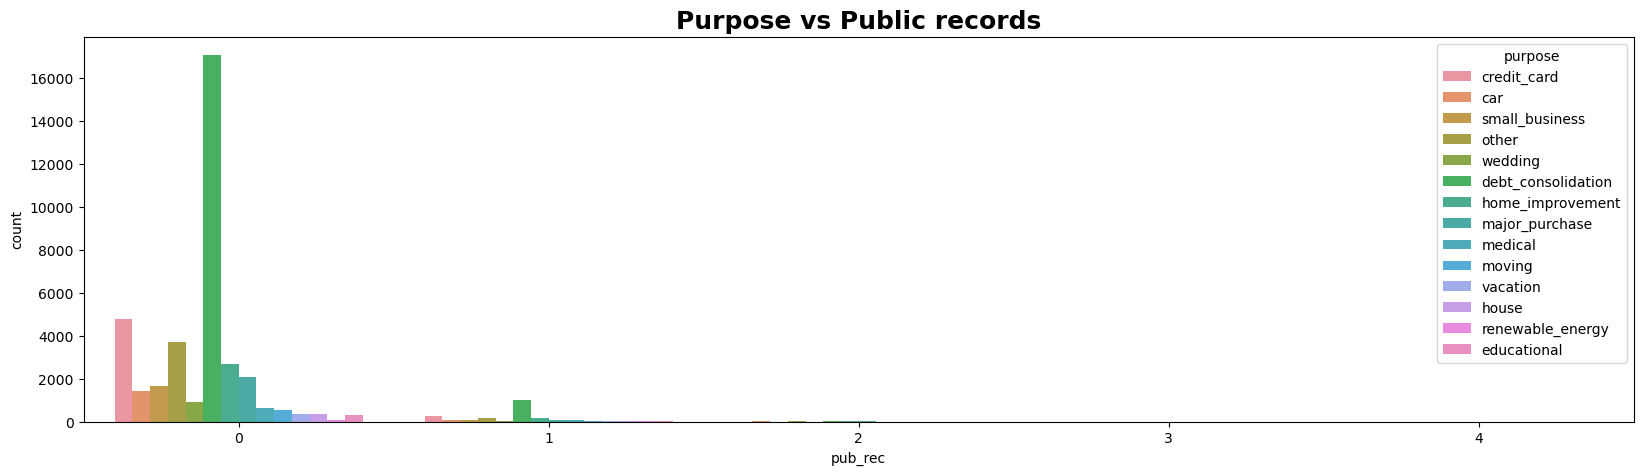

In [69]:
#Purpose vs Public records
plt.figure(figsize=(20,5))
sns.countplot(x=cleaned_loan_df.pub_rec, hue='purpose', data=cleaned_loan_df)
plt.title('Purpose vs Public records', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'Employee length vs Public records')

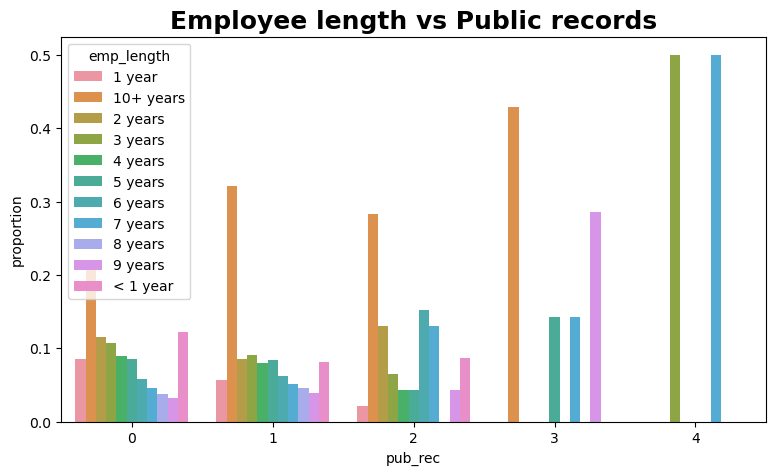

In [70]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = cleaned_loan_df.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records', fontweight='bold',fontsize=18)

### pub_rec_bankruptcies
Number of public record bankruptcies

NameError: name 'data' is not defined

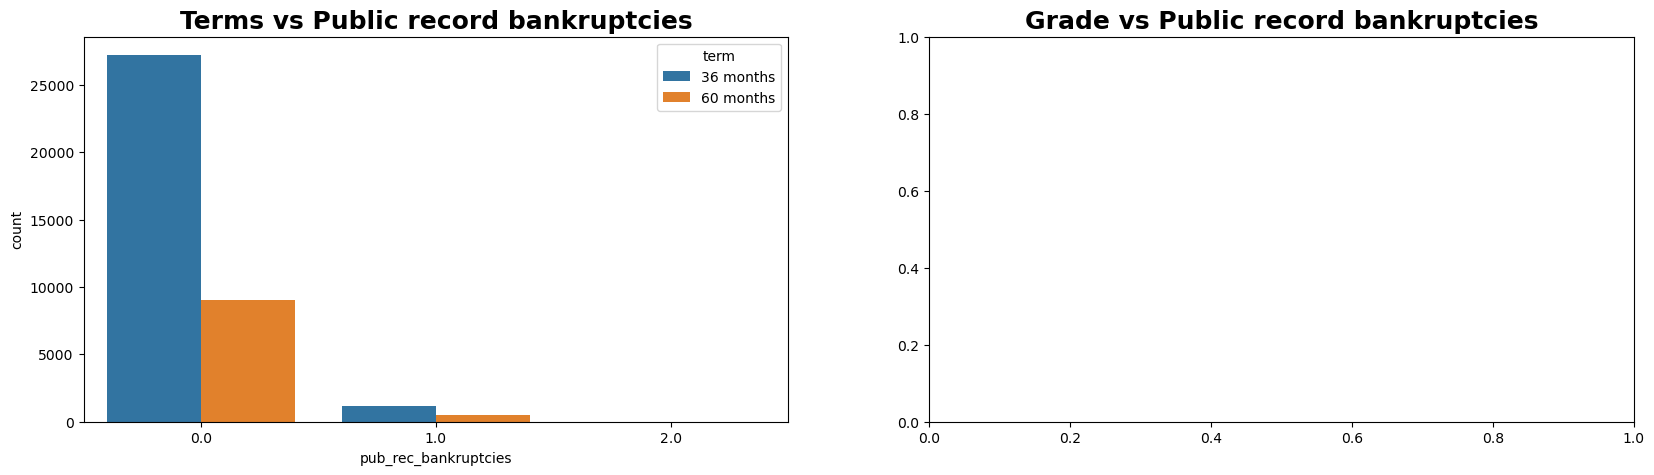

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='term', data=cleaned_loan_df)
plt.title('Terms vs Public record bankruptcies', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies', fontweight='bold',fontsize=18)
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()
sns.countplot(x=data.pub_rec_bankruptcies, hue='grade', data=cleaned_loan_df)

<Axes: title={'center': 'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

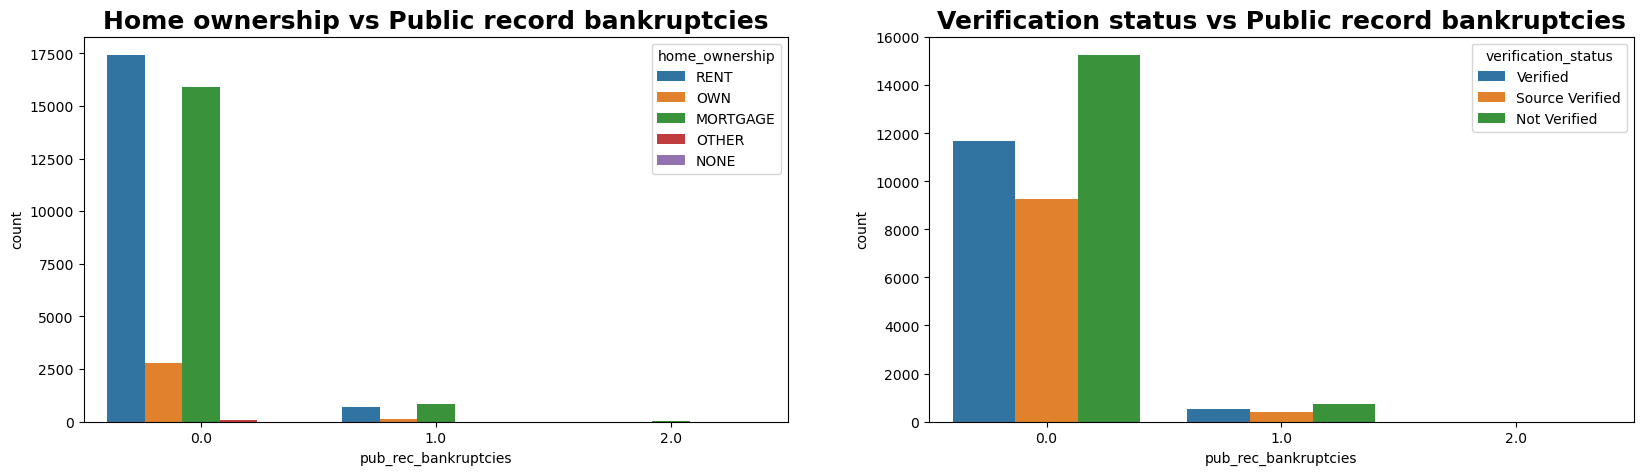

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='home_ownership', data=cleaned_loan_df)
plt.title('Home ownership vs Public record bankruptcies', fontweight='bold',fontsize=18)
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies', fontweight='bold',fontsize=18)
verification_status_ord = cleaned_loan_df.verification_status.unique()
verification_status_ord.sort()
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='verification_status', data=cleaned_loan_df)

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

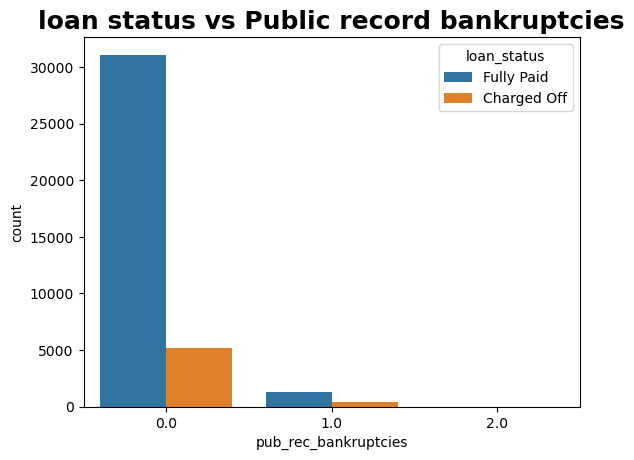

In [116]:
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='loan_status', data=cleaned_loan_df)
plt.title('loan status vs Public record bankruptcies', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

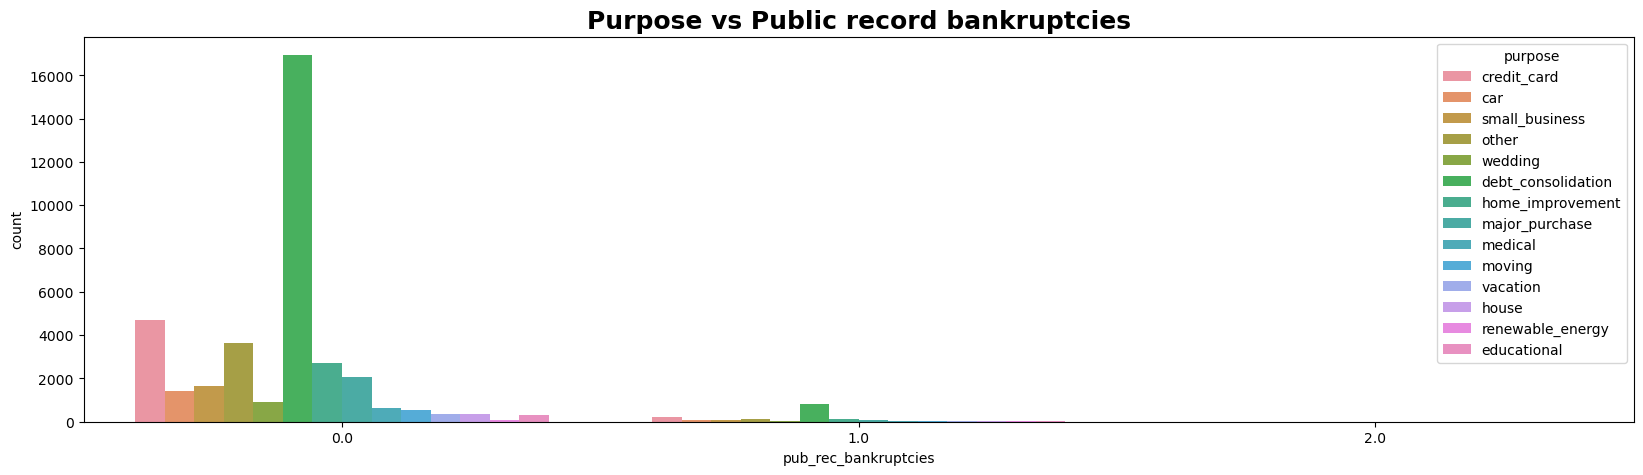

In [117]:
plt.figure(figsize=(20,5))
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='purpose', data=cleaned_loan_df)
plt.title('Purpose vs Public record bankruptcies', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

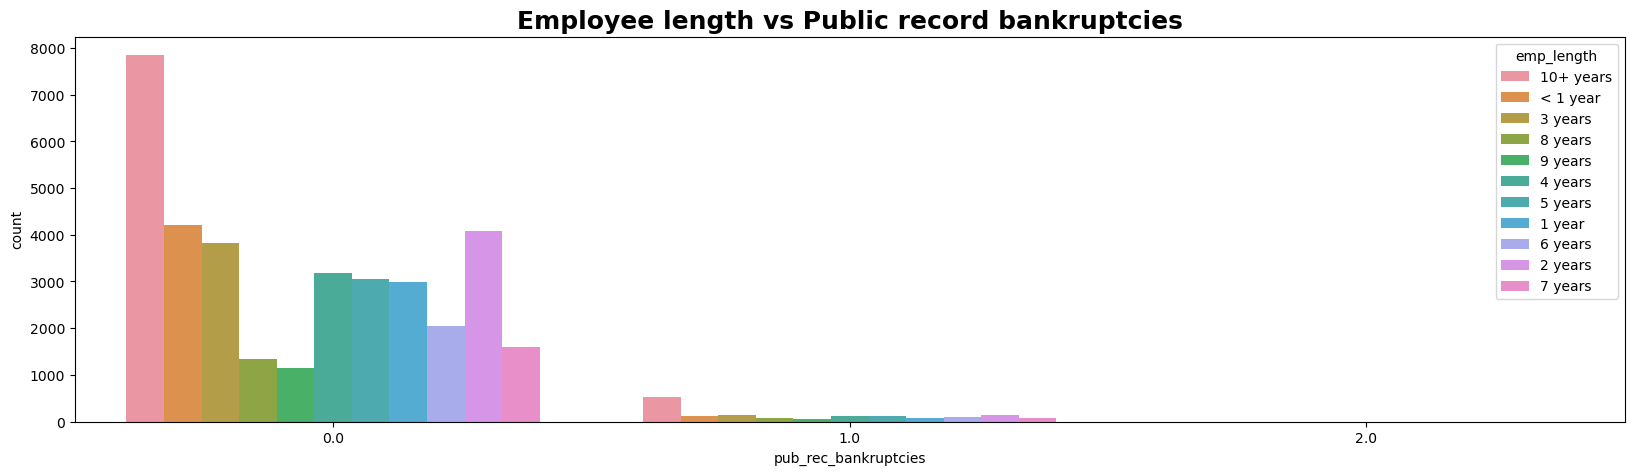

In [118]:
plt.figure(figsize=(20,5))
sns.countplot(x=cleaned_loan_df.pub_rec_bankruptcies, hue='emp_length', data=cleaned_loan_df)
plt.title('Employee length vs Public record bankruptcies', fontweight='bold',fontsize=18)

### inq_last_6mths

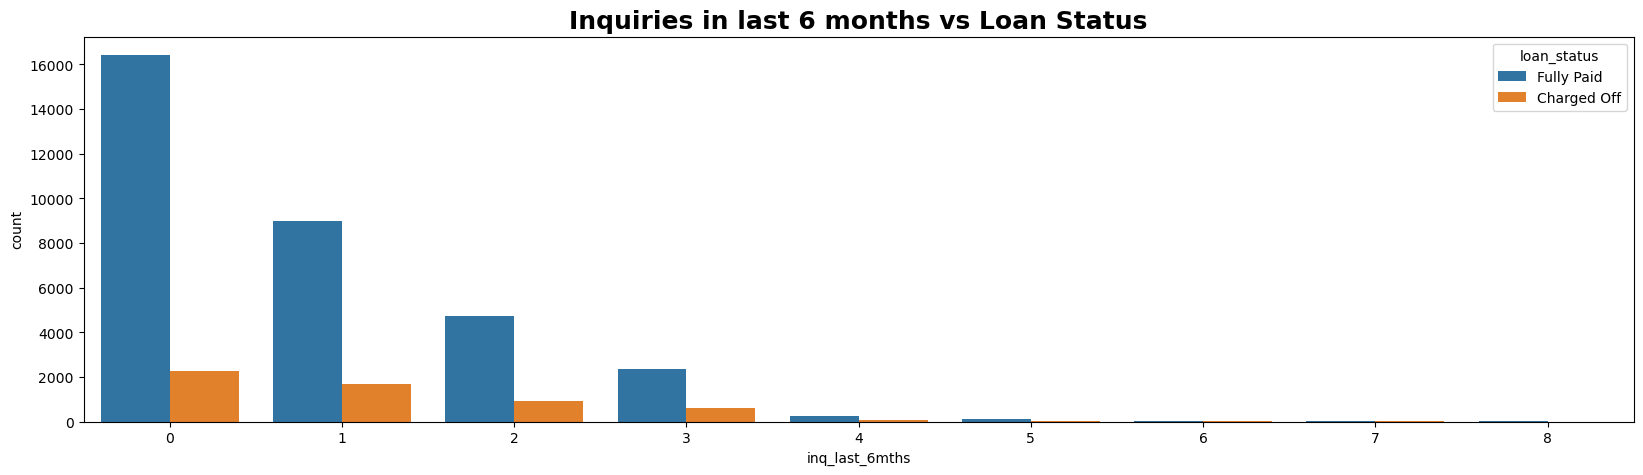

In [119]:
plt.figure(figsize=(20,5))
sns.countplot(x=cleaned_loan_df.inq_last_6mths, hue='loan_status', data=cleaned_loan_df)
plt.title('Inquiries in last 6 months vs Loan Status', fontweight='bold',fontsize=18)
plt.show()

### Approval Loan Amount Ratio

Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

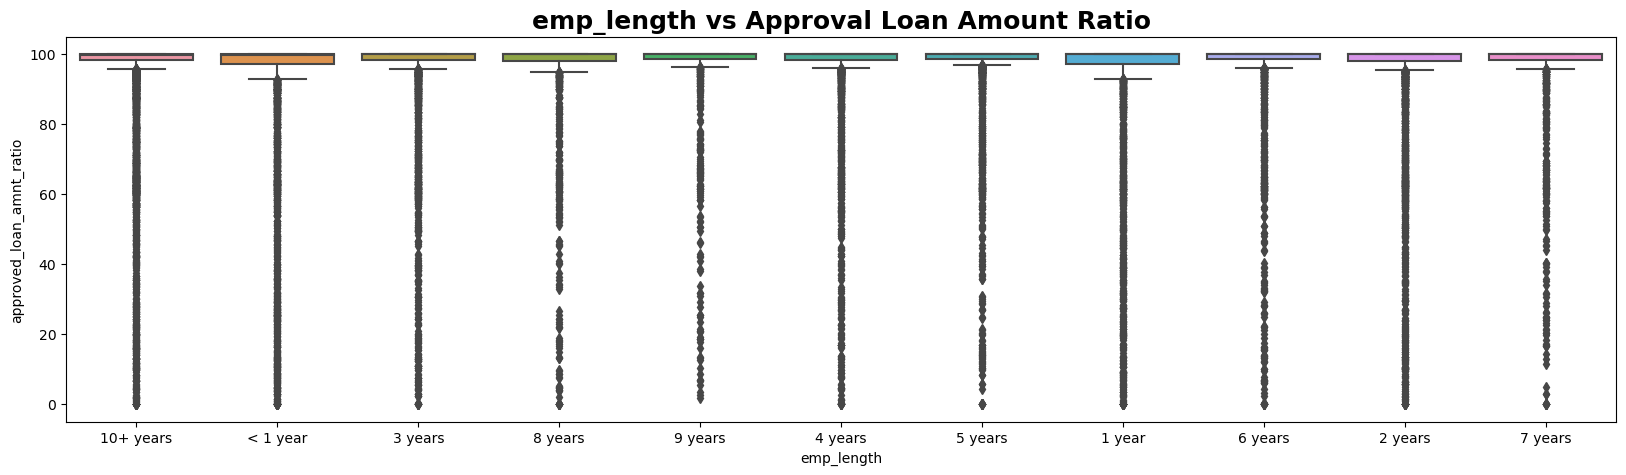

In [120]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=cleaned_loan_df.approved_loan_amnt_ratio, data=cleaned_loan_df)
plt.title('emp_length vs Approval Loan Amount Ratio', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

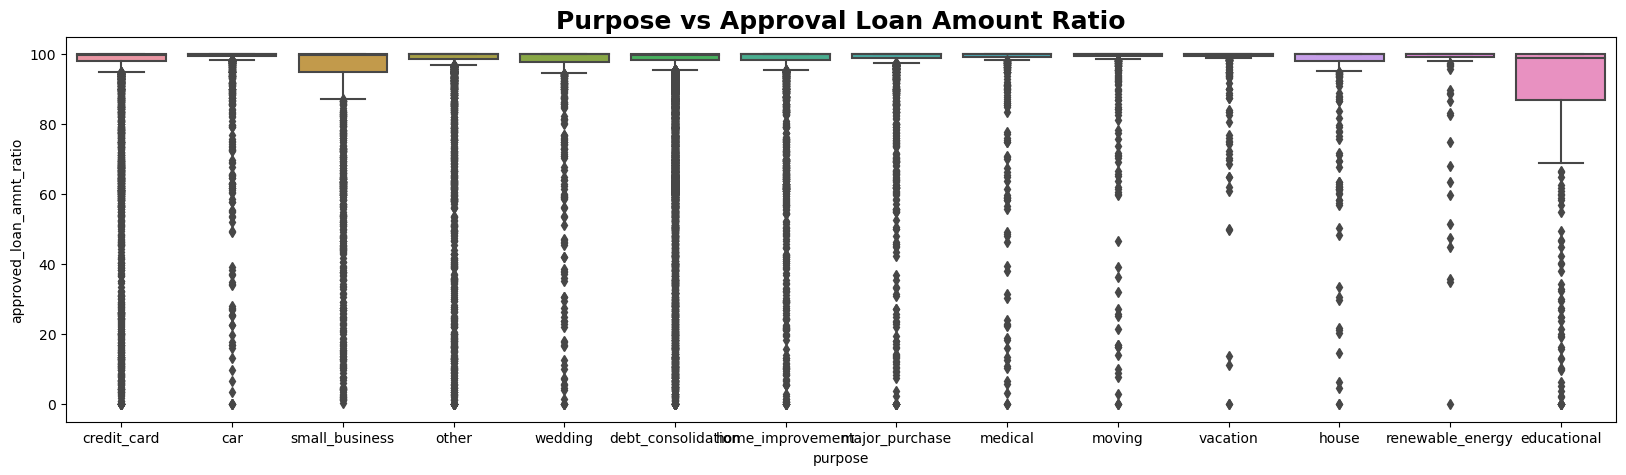

In [108]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=cleaned_loan_df.approved_loan_amnt_ratio, data=cleaned_loan_df)
plt.title('Purpose vs Approval Loan Amount Ratio', fontweight='bold',fontsize=18)

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

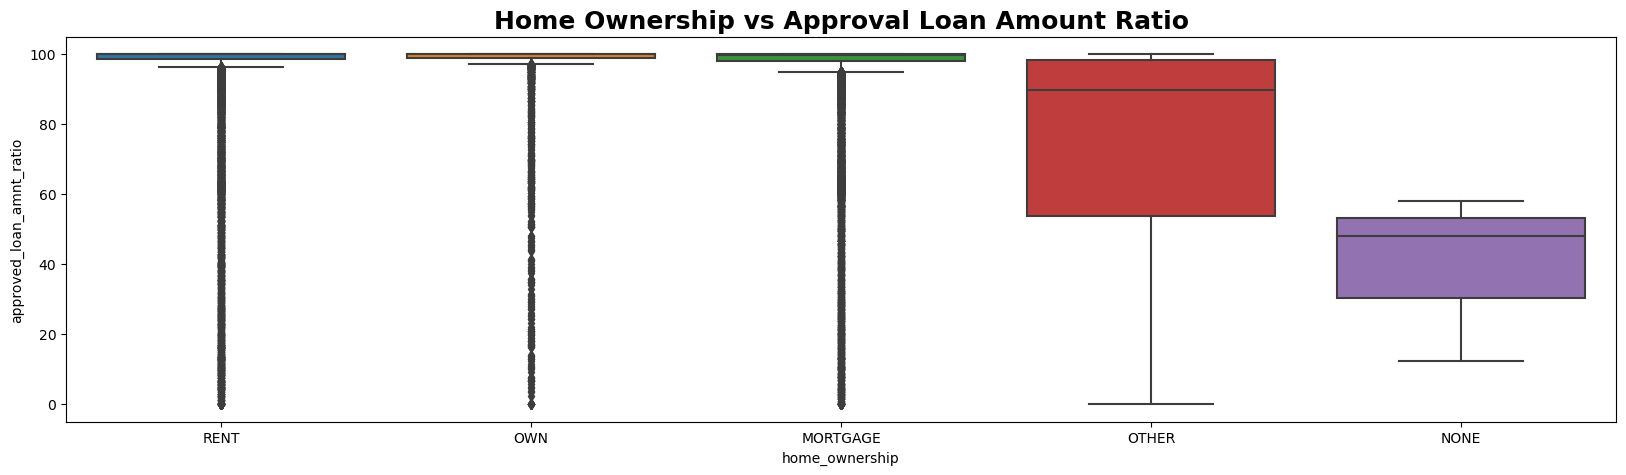

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=cleaned_loan_df.approved_loan_amnt_ratio, data=cleaned_loan_df)
plt.title('Home Ownership vs Approval Loan Amount Ratio', fontweight='bold',fontsize=18)

# Bivariate Analysis


### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

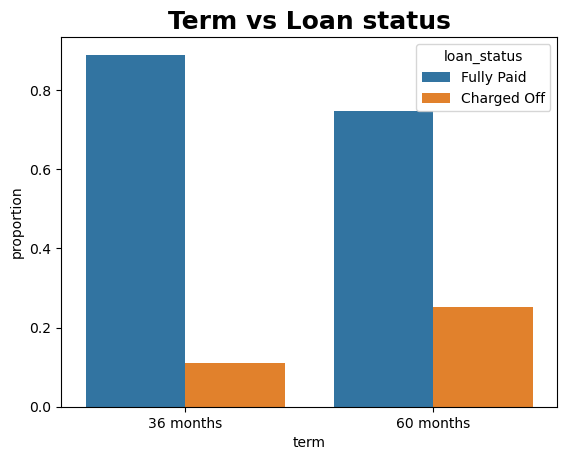

In [110]:
#Proportion of values for each category
df = cleaned_loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term')['id'].transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status', fontweight='bold',fontsize=18)

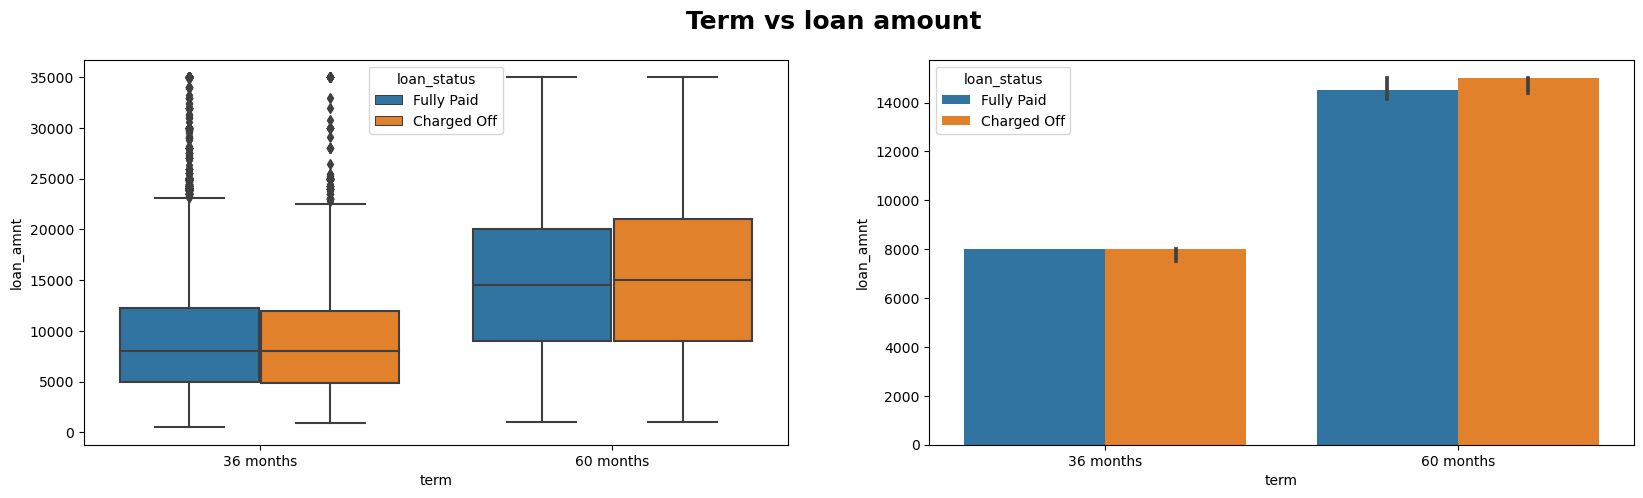

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('Term vs loan amount', fontweight='bold',fontsize=18)
plt.show()

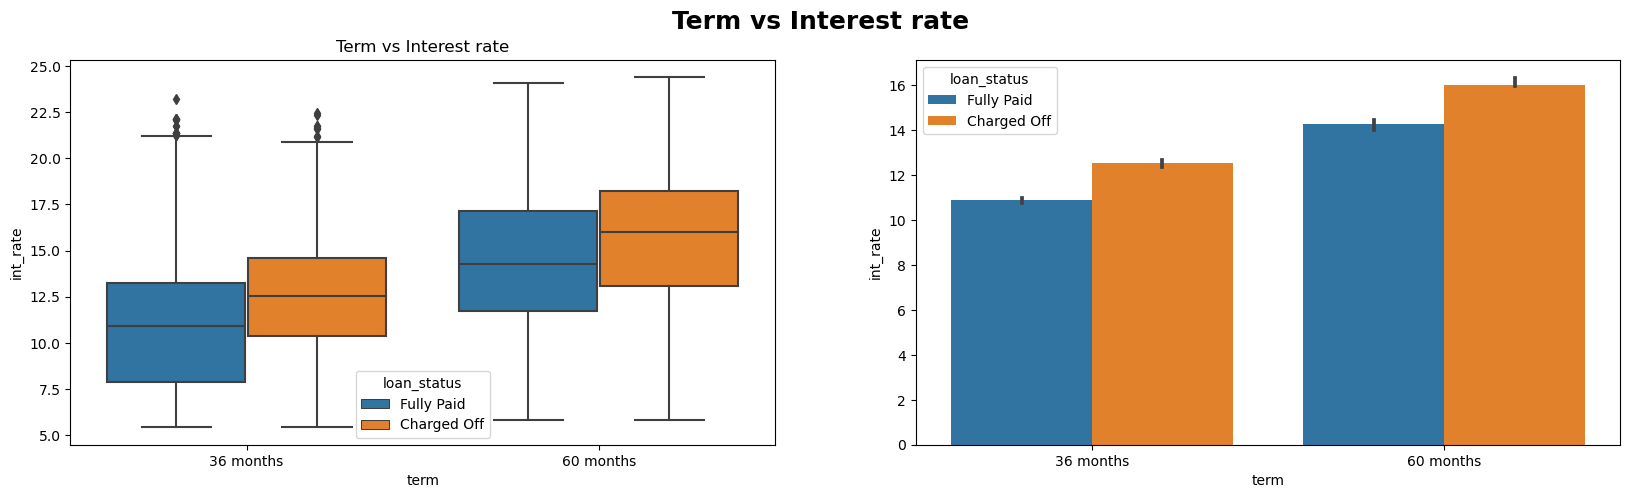

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=cleaned_loan_df)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('Term vs Interest rate', fontweight='bold',fontsize=18)
plt.show()

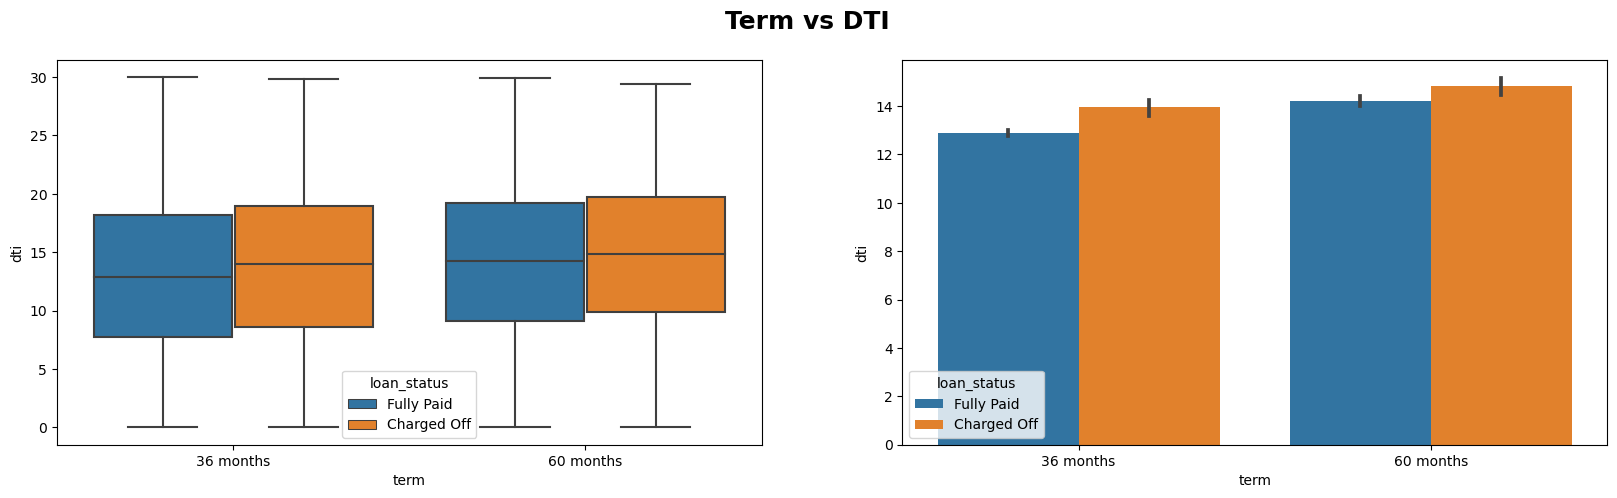

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('Term vs DTI', fontweight='bold',fontsize=18)
plt.show()

## Grade

In [114]:
#Sorting Grades from A to G
grade_ord = cleaned_loan_df.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

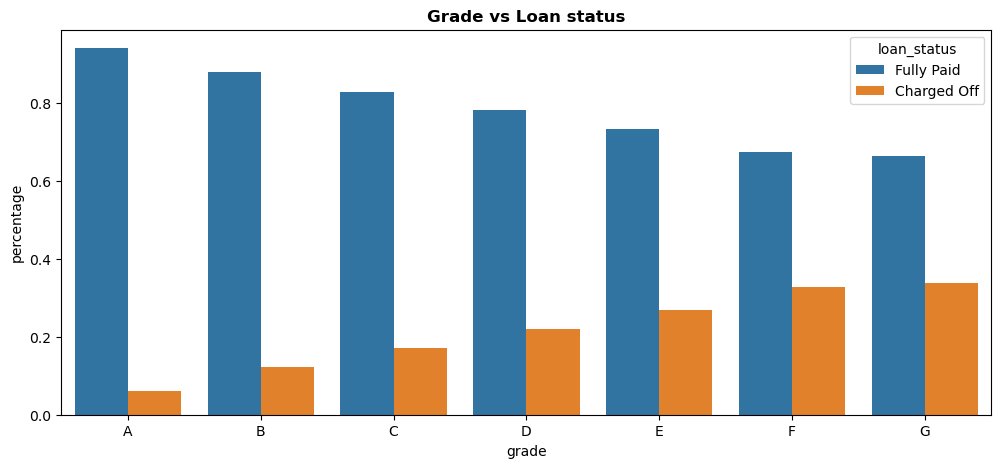

In [82]:
df = cleaned_loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status', fontweight='bold',fontsize=12)

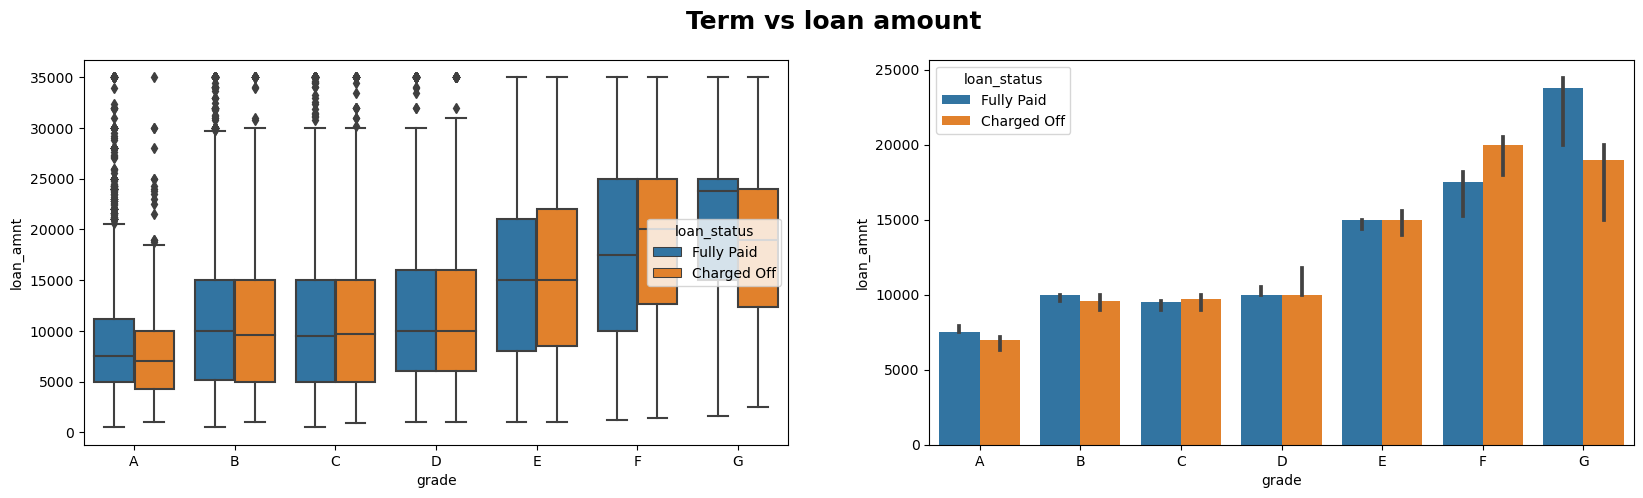

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount', fontweight='bold',fontsize=18)
plt.show()

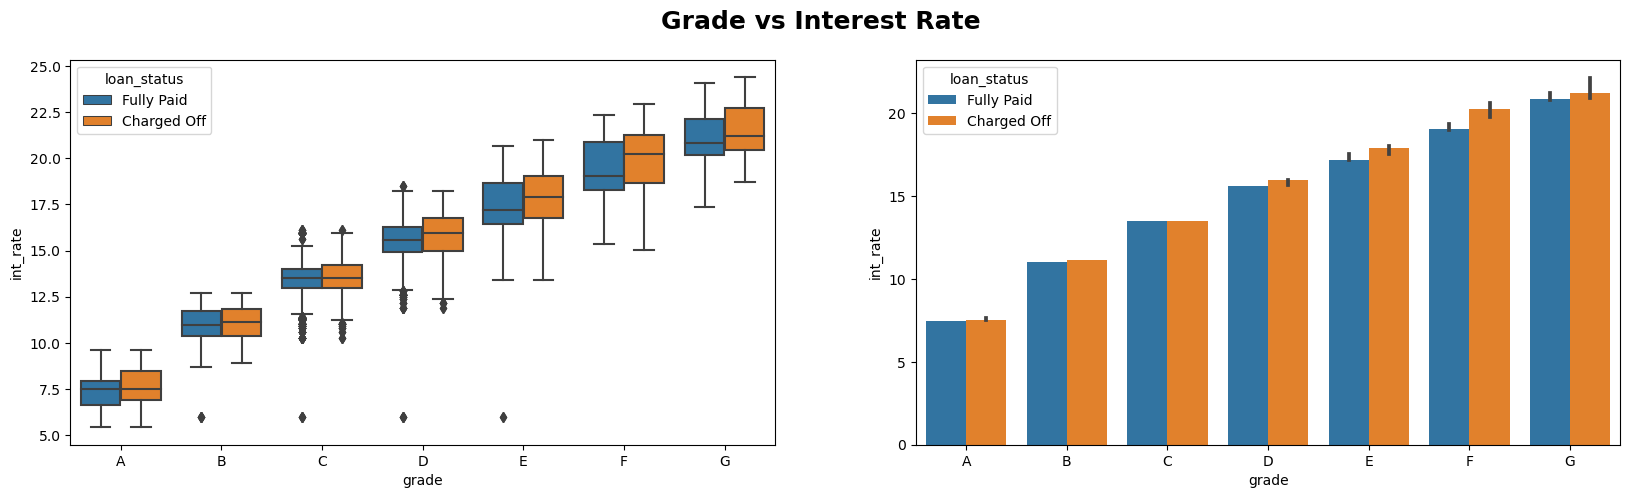

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=cleaned_loan_df, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=cleaned_loan_df, order = grade_ord, estimator=np.median)
plt.suptitle('Grade vs Interest Rate', fontweight='bold',fontsize=18)
plt.show()

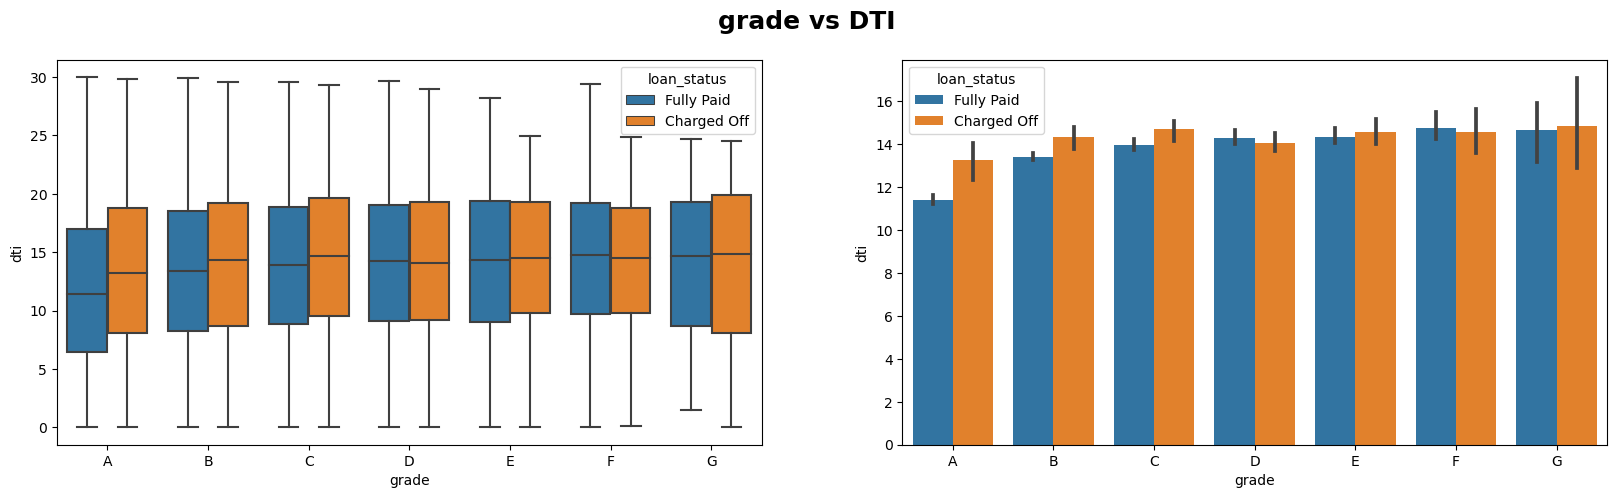

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=cleaned_loan_df, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median, order = grade_ord)
plt.suptitle('grade vs DTI', fontweight='bold',fontsize=18)
plt.show()

## Employment Length

Text(0.5, 1.0, 'Grade vs Loan status')

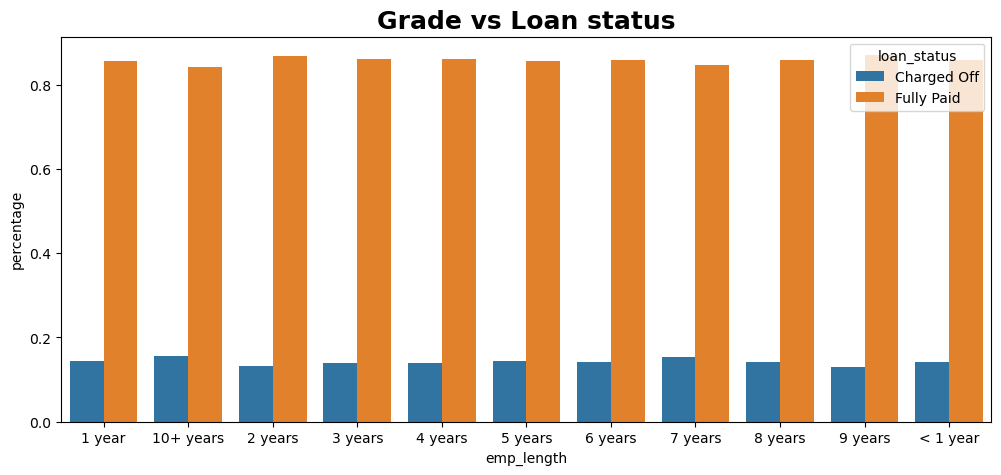

In [72]:
df = cleaned_loan_df.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status', fontweight='bold',fontsize=18)

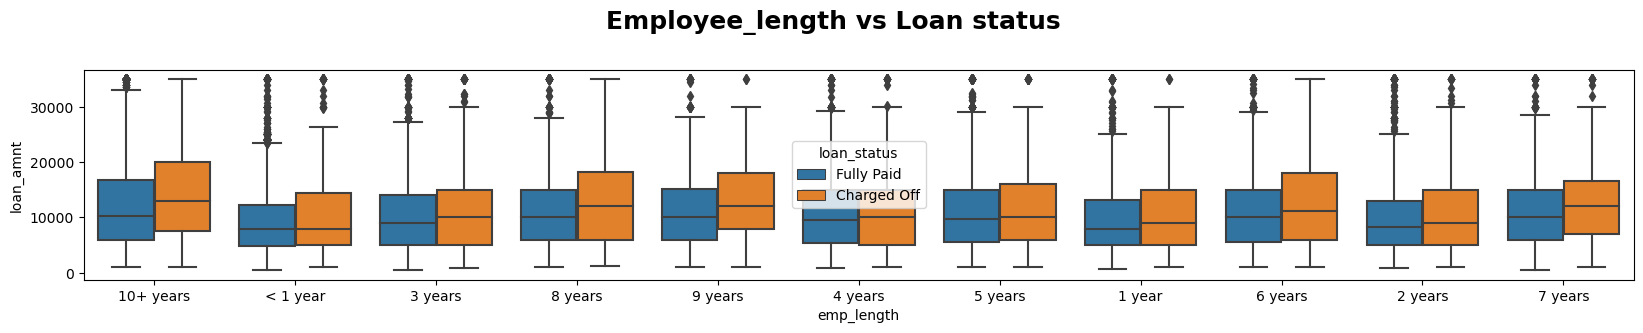

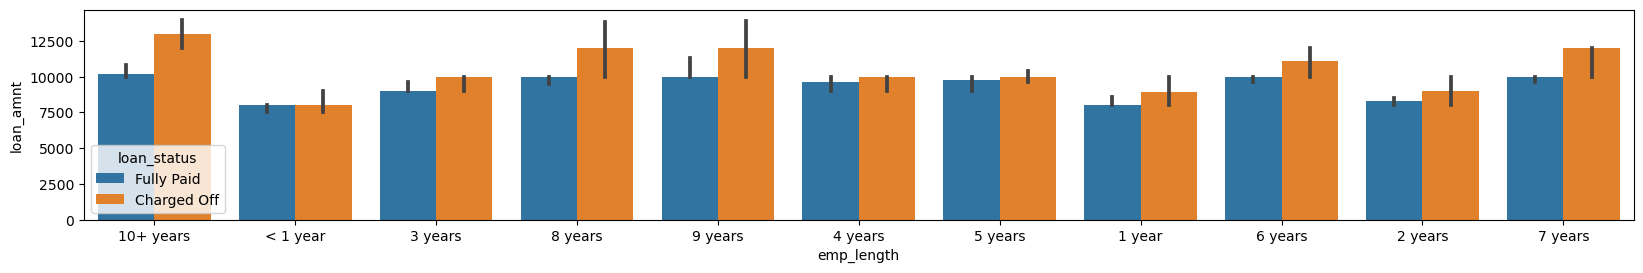

In [87]:
plt.figure(figsize=(20,6))
plt.subplot(211)
plt.suptitle('Employee_length vs Loan status', fontweight='bold',fontsize=18)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=cleaned_loan_df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.show()

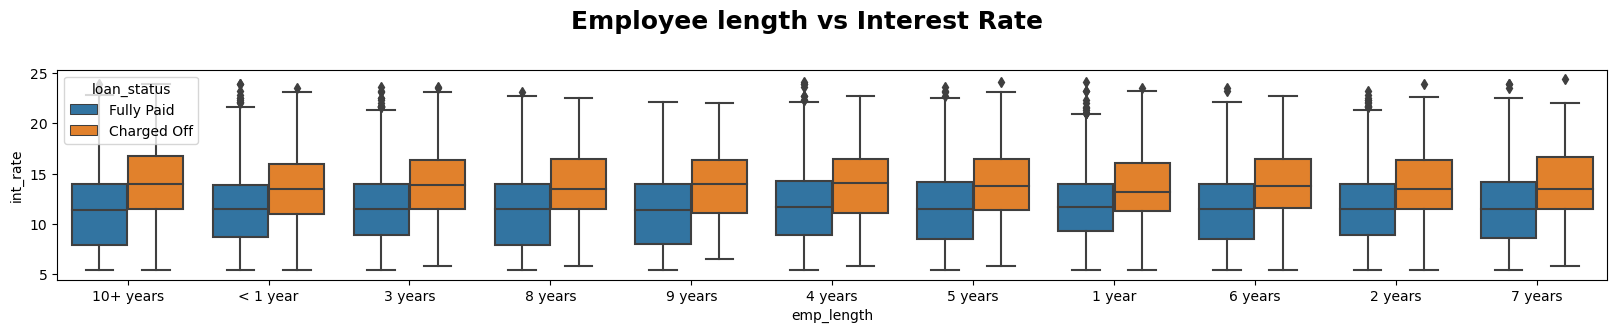

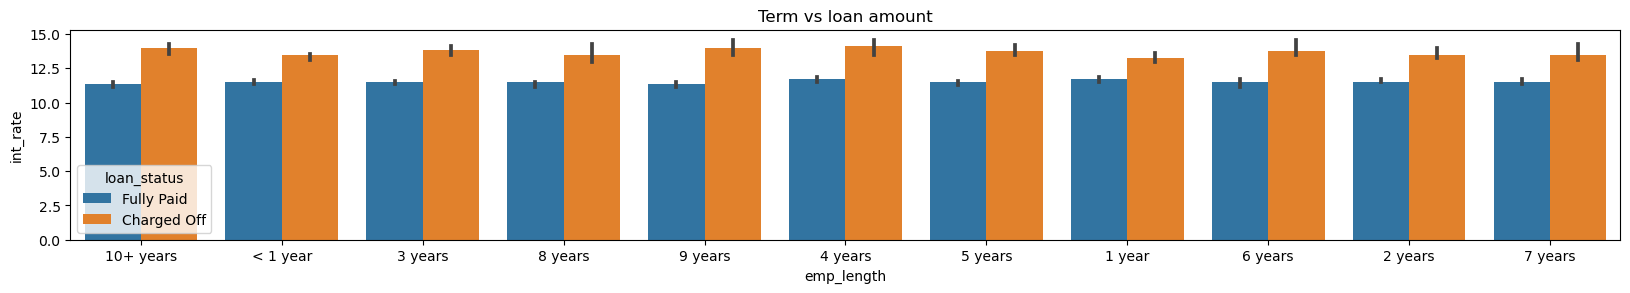

In [74]:
plt.figure(figsize=(20,6))
plt.subplot(211)
plt.suptitle('Employee length vs Interest Rate', fontweight='bold',fontsize=18)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=cleaned_loan_df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

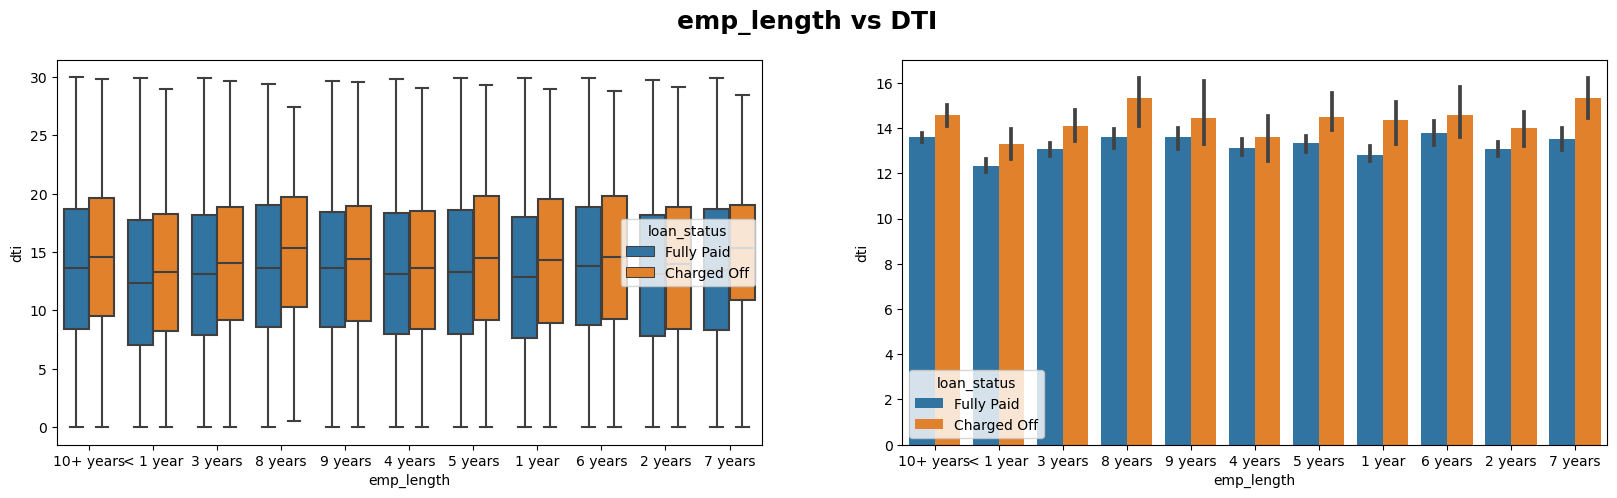

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('emp_length vs DTI', fontweight='bold',fontsize=18)
plt.show()

## Home Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

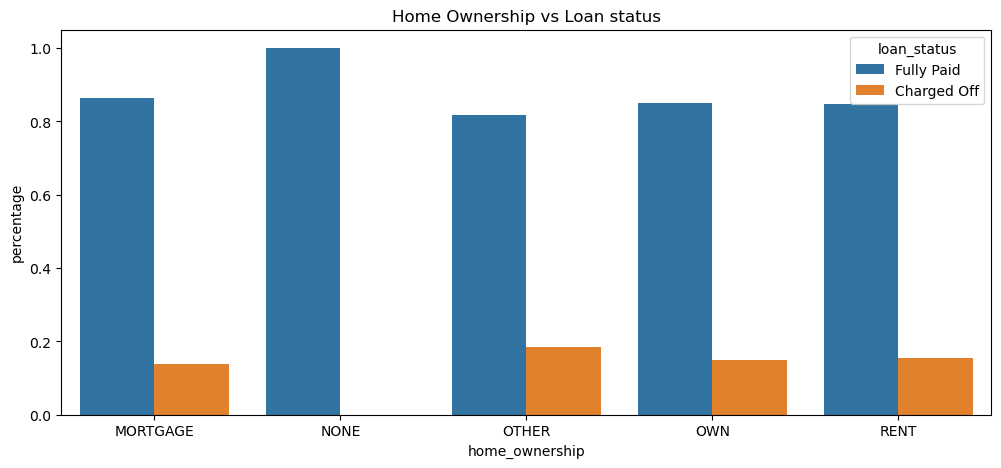

In [76]:
df = cleaned_loan_df.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

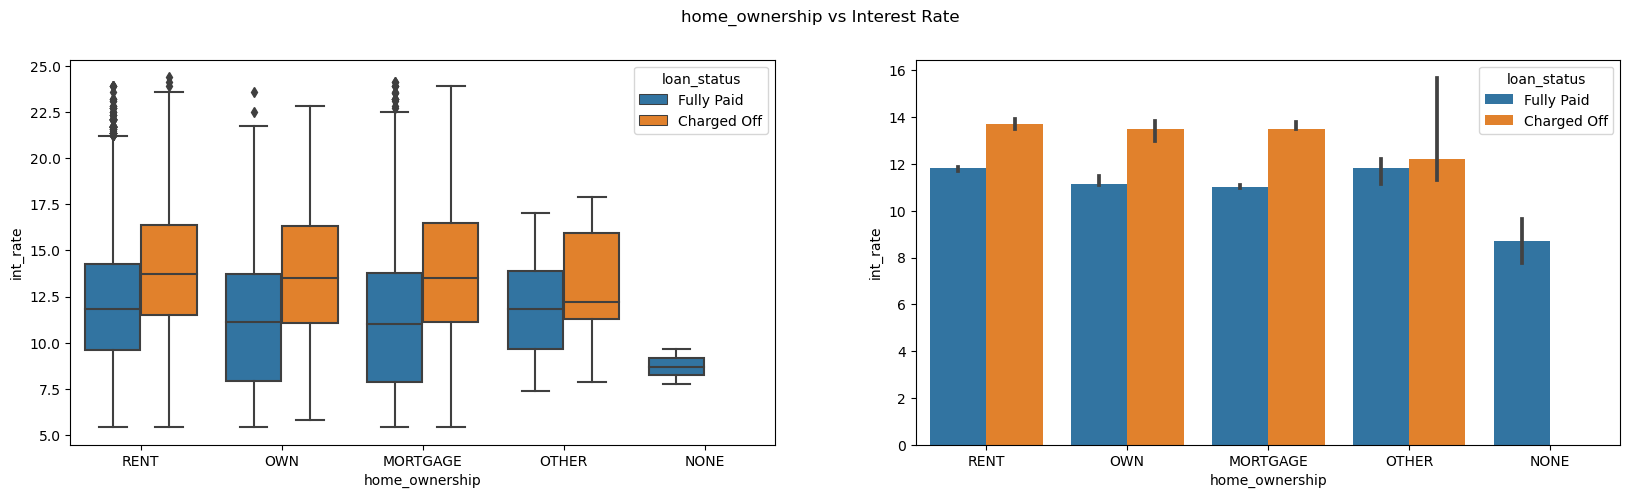

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

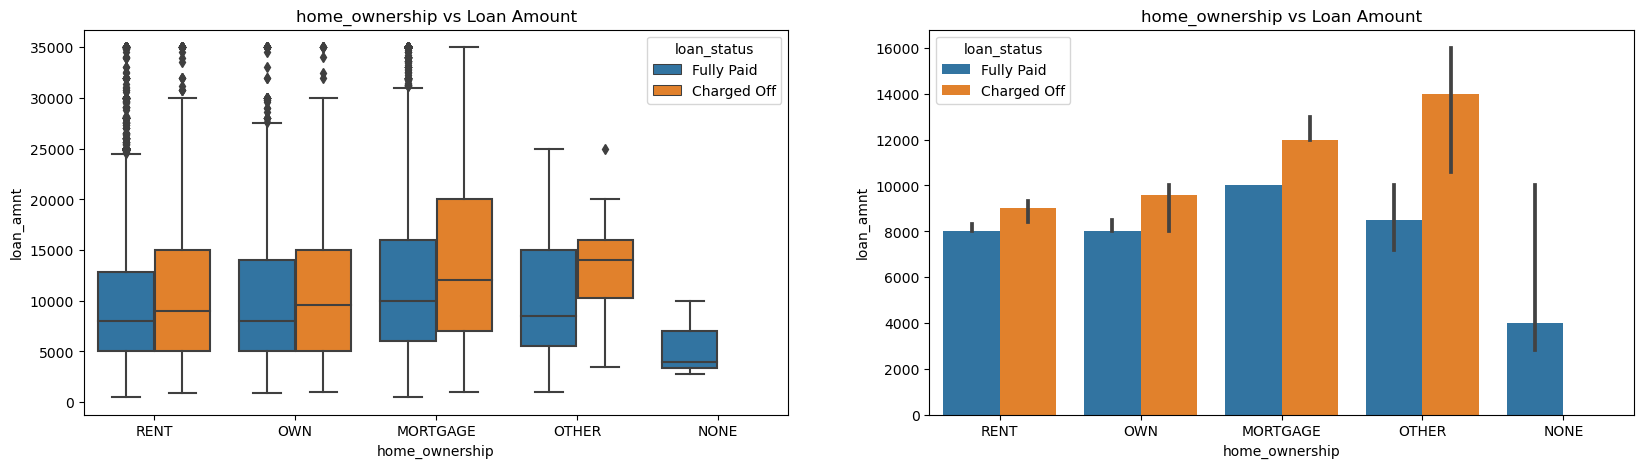

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=cleaned_loan_df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

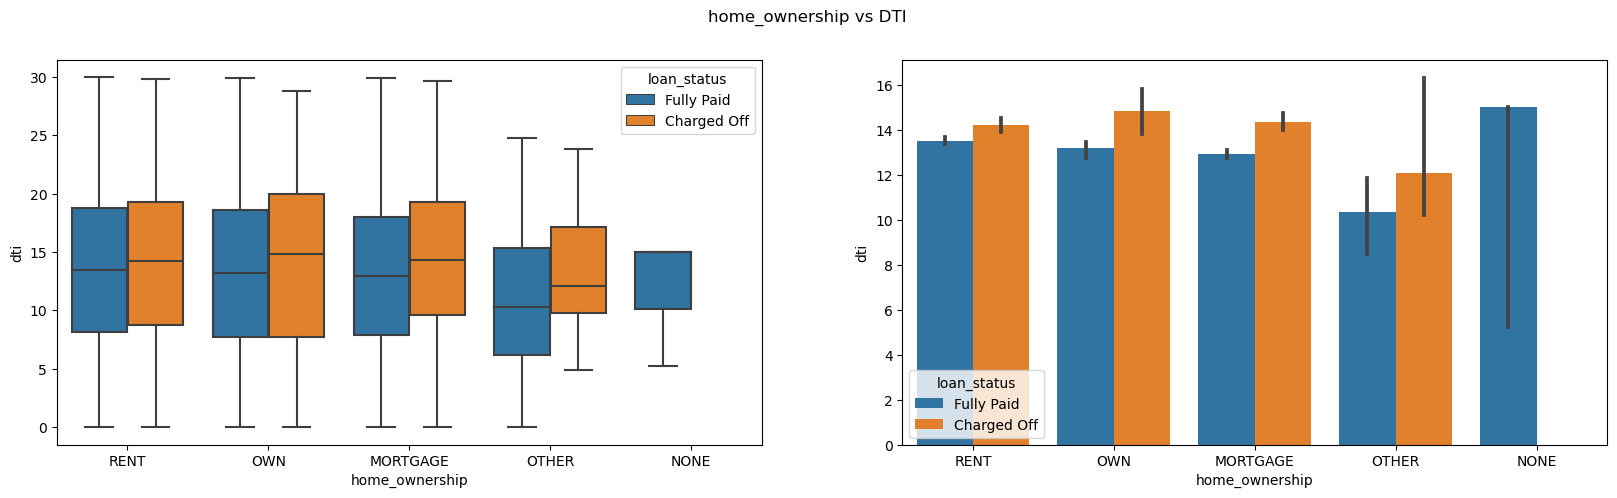

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

## Address State

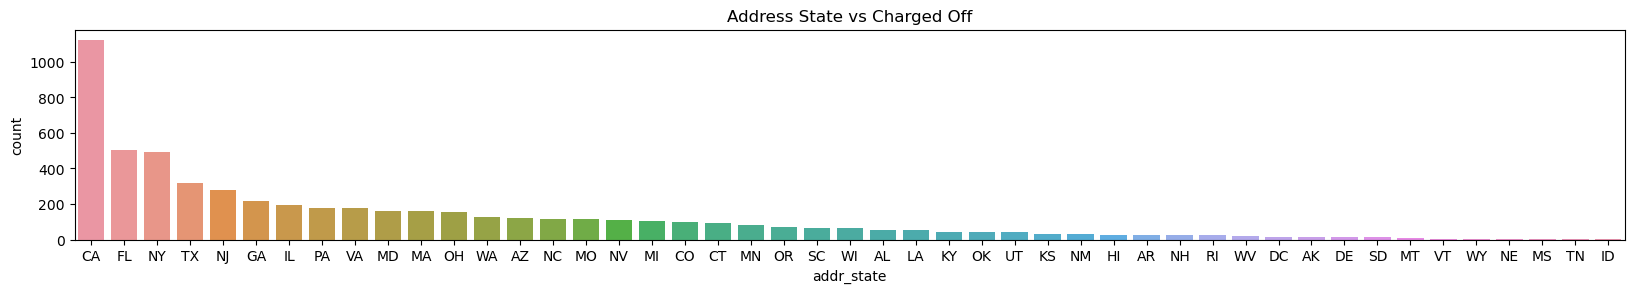

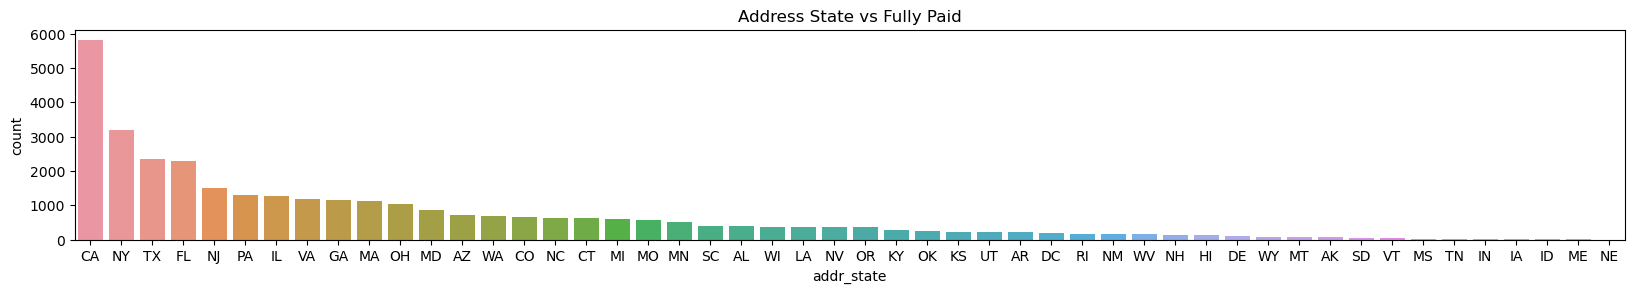

In [106]:
charged_off_df = cleaned_loan_df[cleaned_loan_df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = cleaned_loan_df[cleaned_loan_df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

## Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

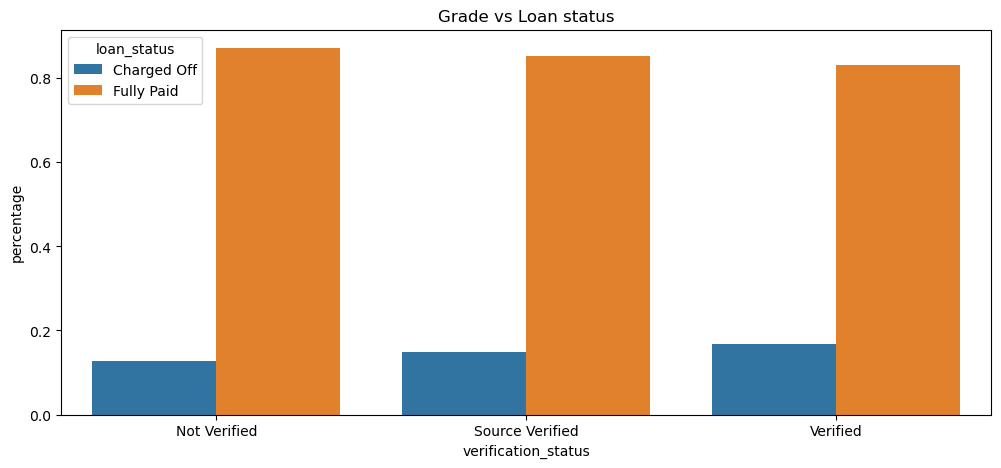

In [88]:
df = cleaned_loan_df.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

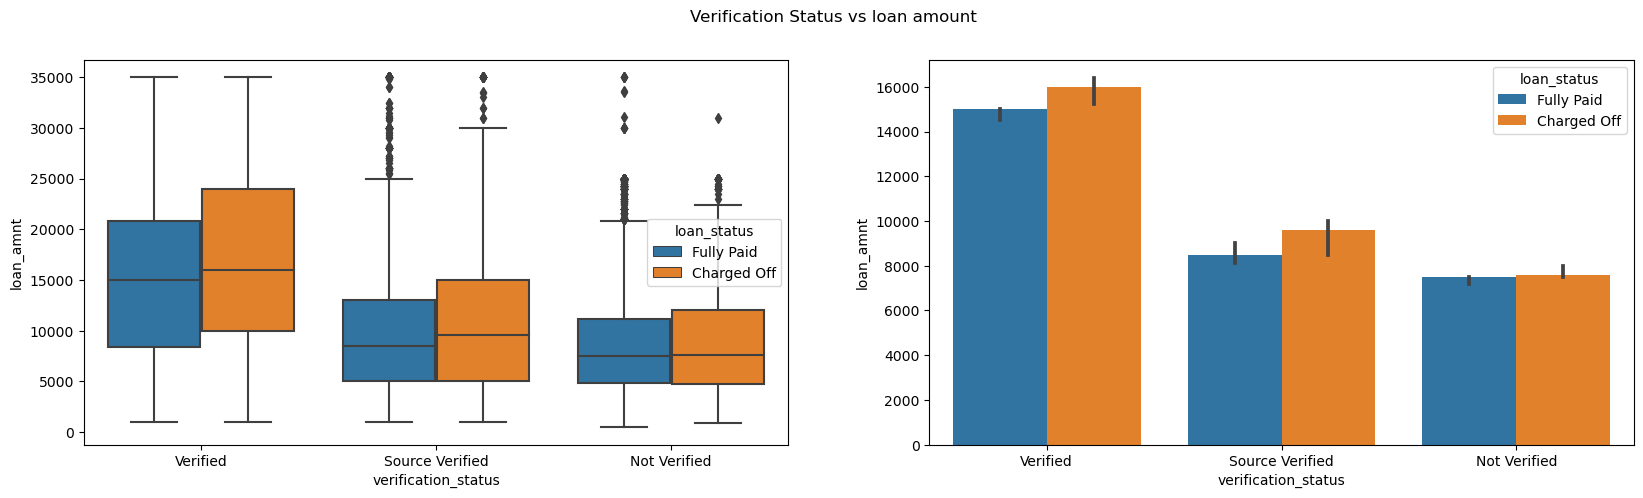

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

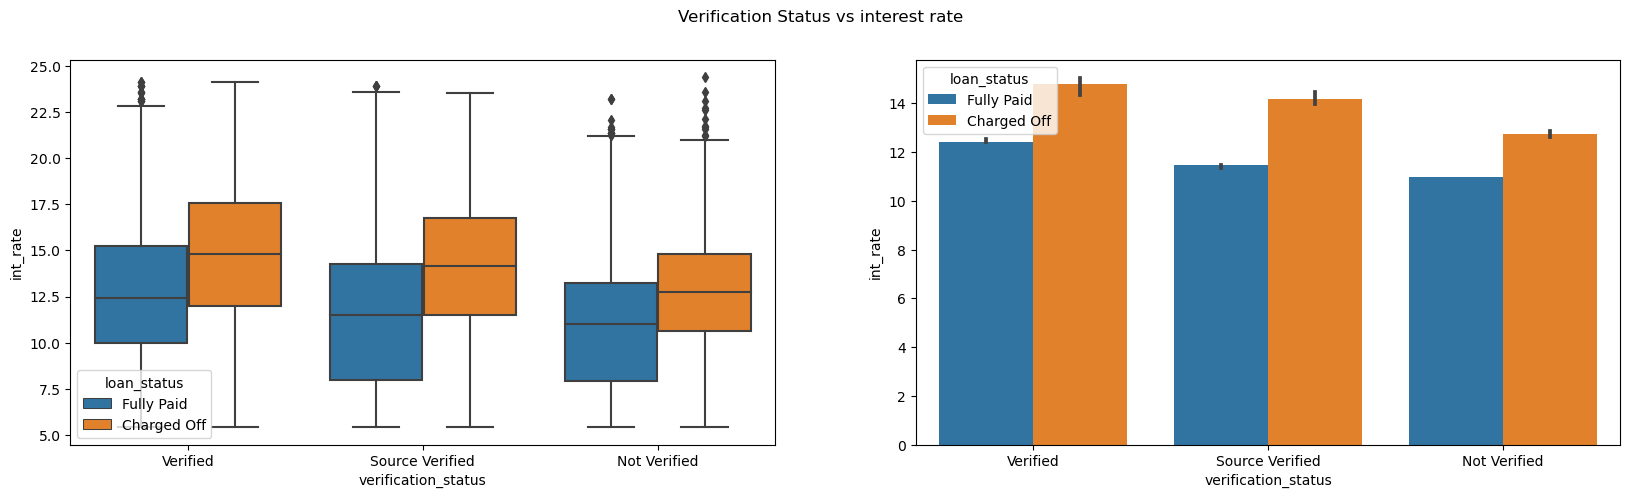

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

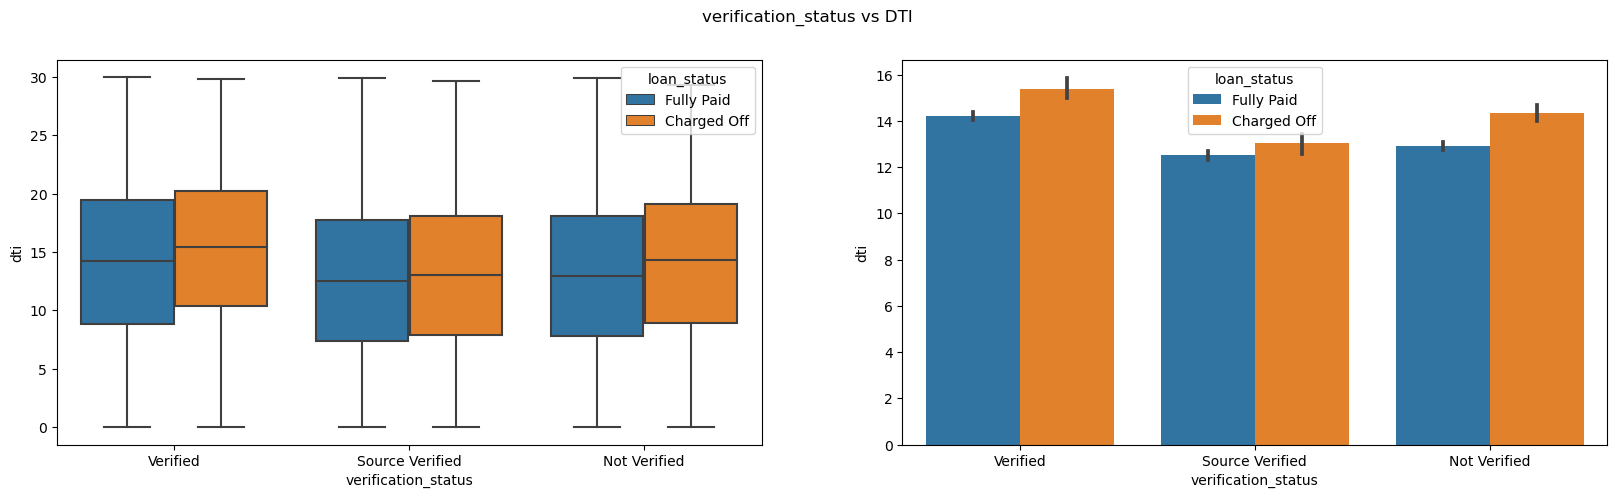

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=cleaned_loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

## Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

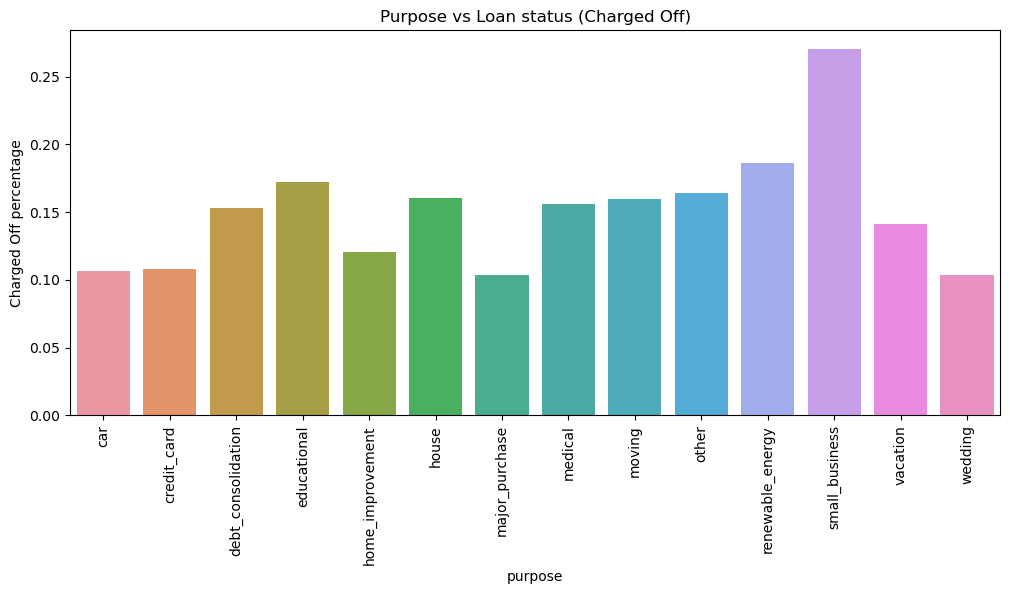

In [92]:
df = cleaned_loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['Charged Off percentage'] = df.groupby('purpose')['id'].transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='Charged Off percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

<Figure size 640x480 with 0 Axes>

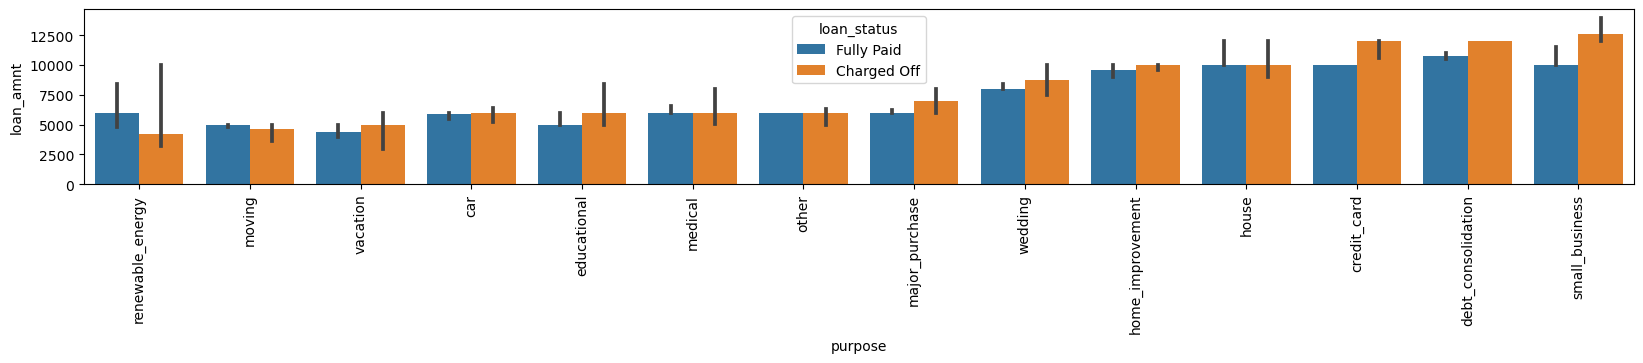

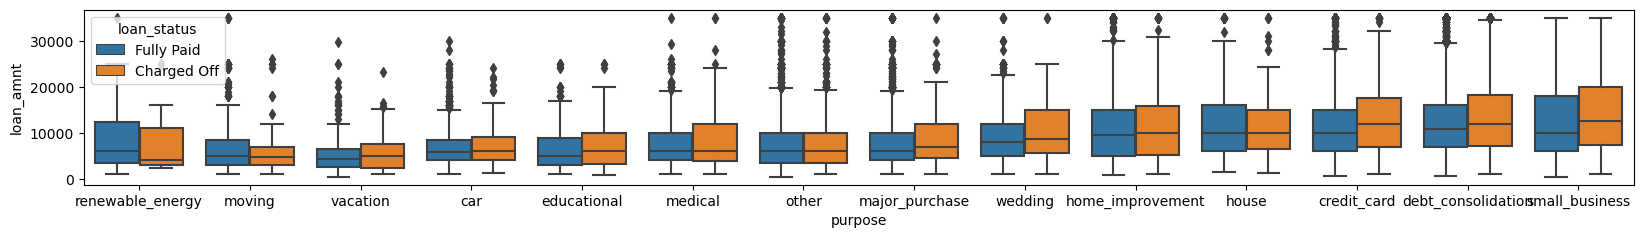

In [95]:
df = cleaned_loan_df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= cleaned_loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= cleaned_loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

<Figure size 640x480 with 0 Axes>

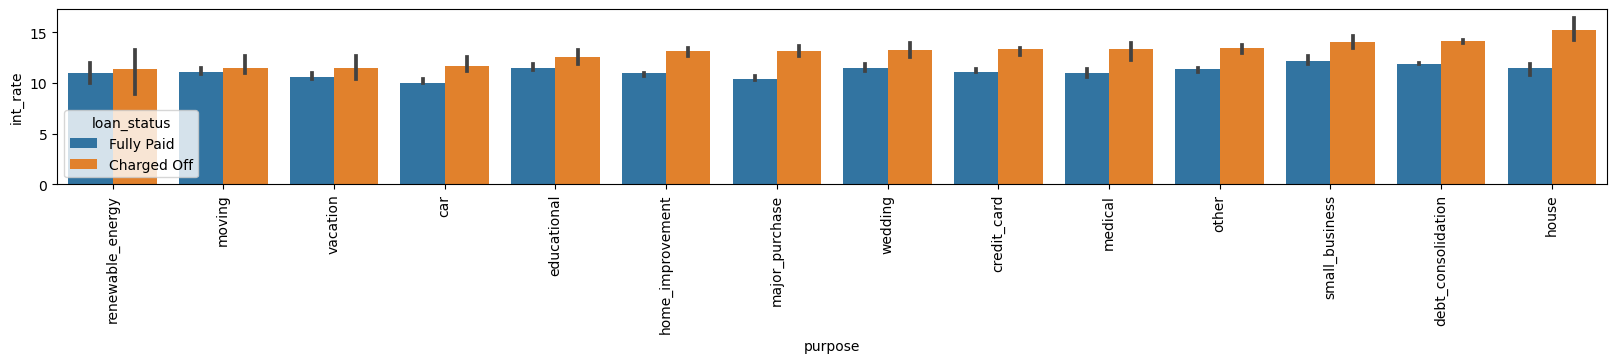

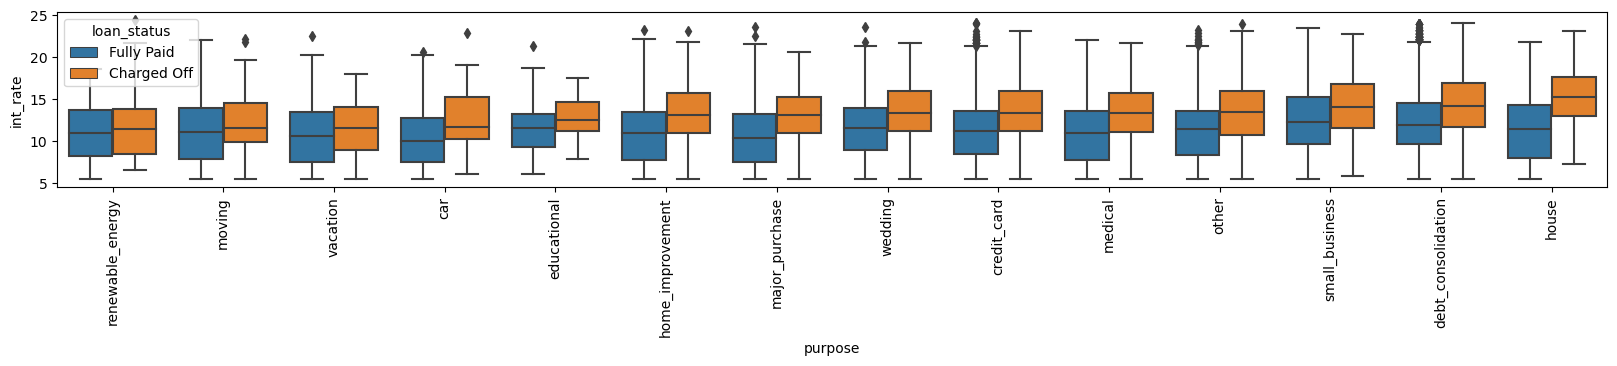

In [96]:
df = cleaned_loan_df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= cleaned_loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= cleaned_loan_df, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

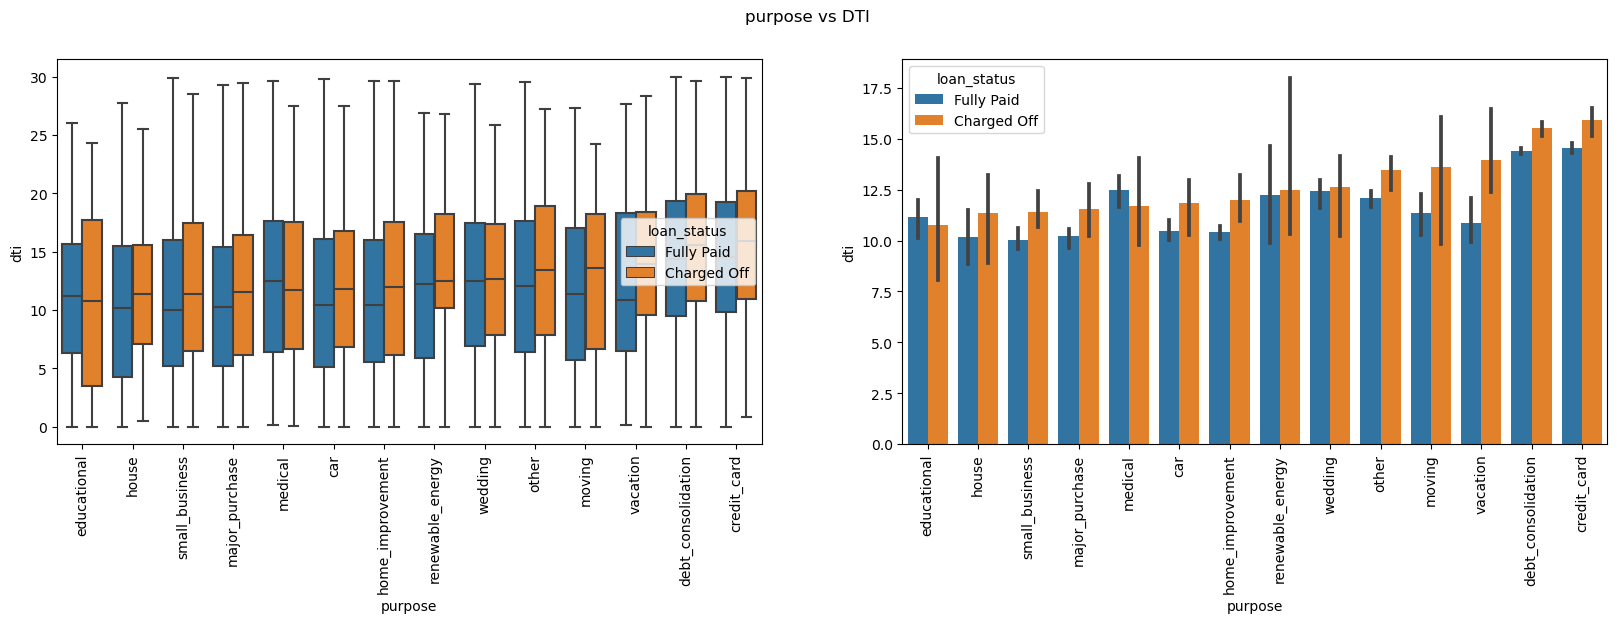

In [97]:
df = cleaned_loan_df.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=cleaned_loan_df, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=cleaned_loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

## Loan Amount vs Interest Rate

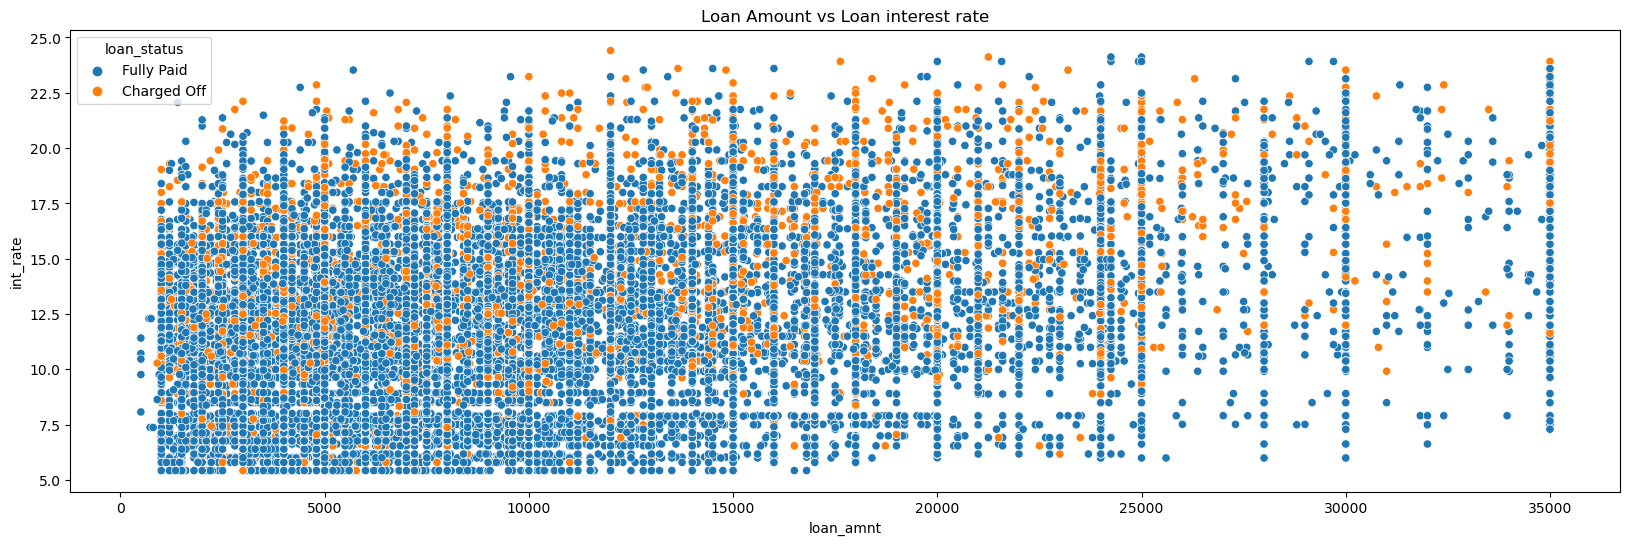

In [99]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=cleaned_loan_df, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

## Loan Amount vs Annual income

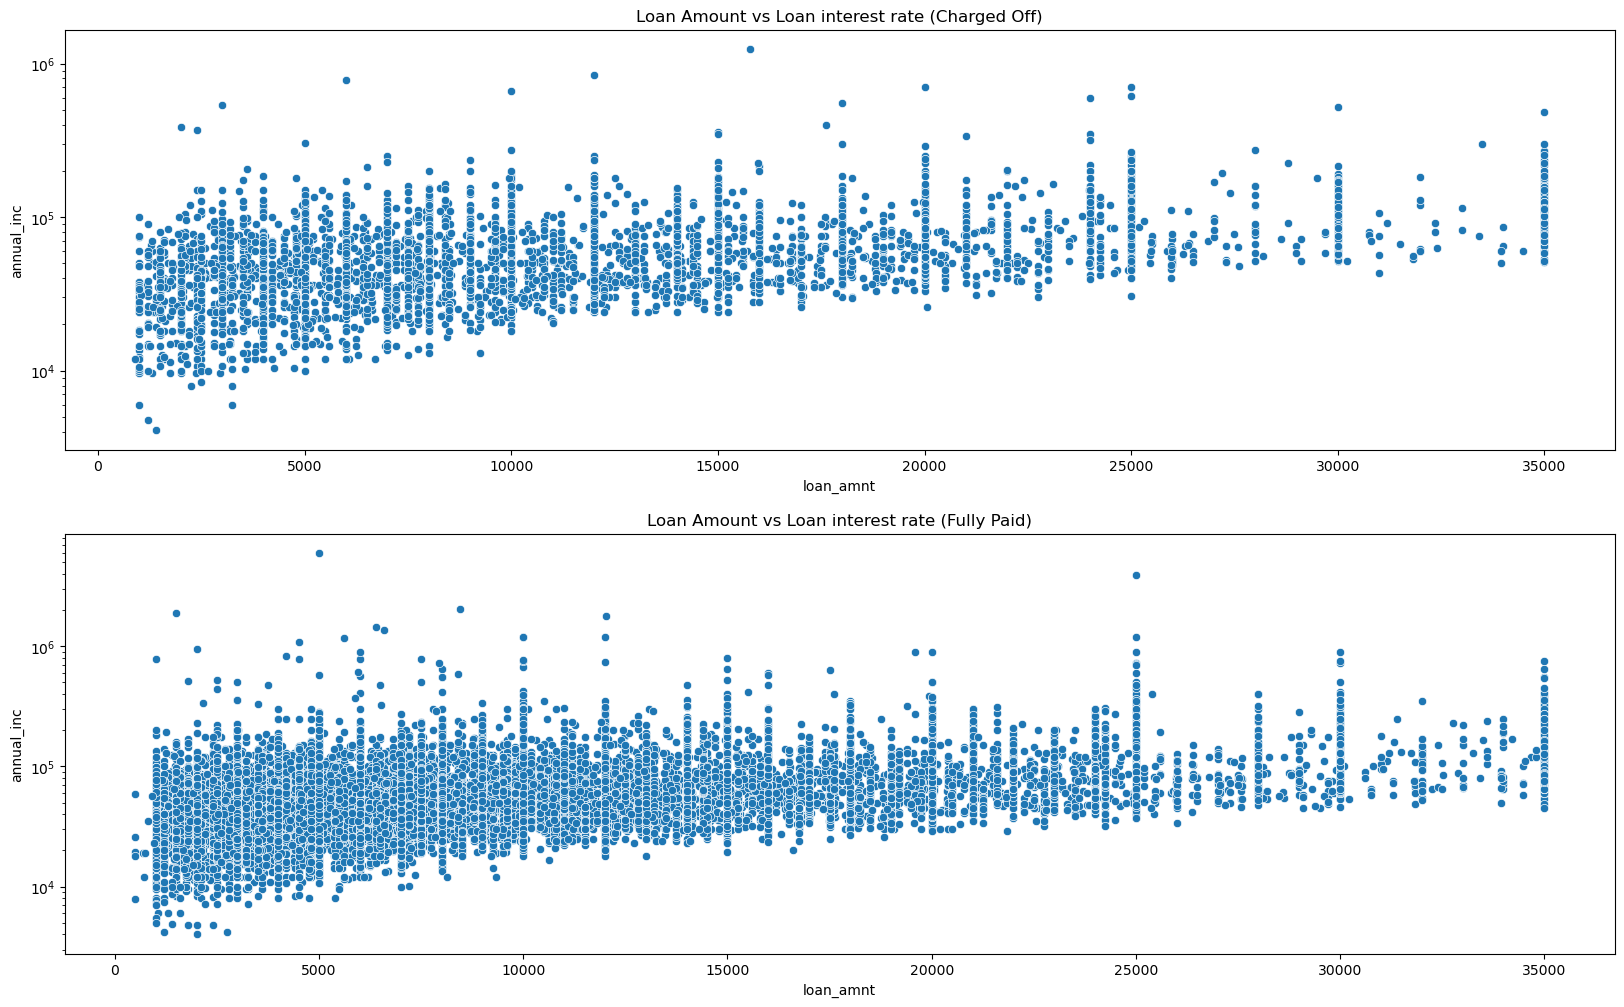

In [100]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=cleaned_loan_df[cleaned_loan_df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=cleaned_loan_df[cleaned_loan_df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

## Loan Amount vs DTI

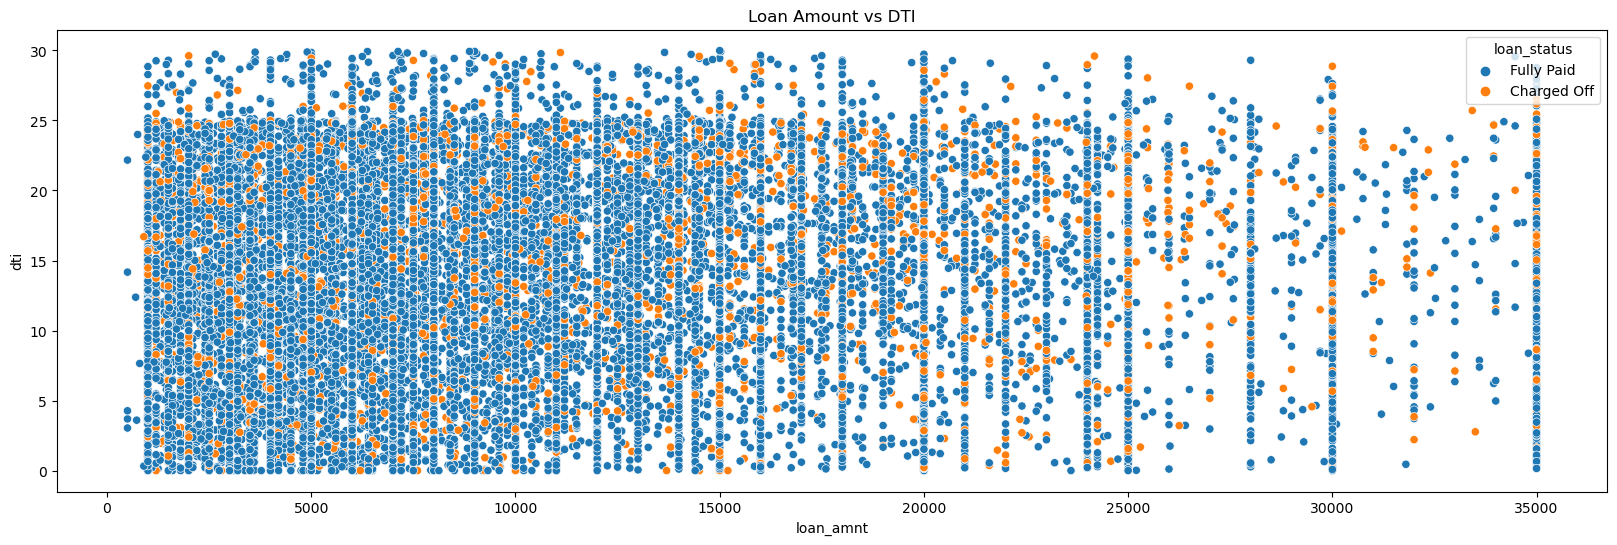

In [101]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=cleaned_loan_df, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

## Interest Rate vs DTI

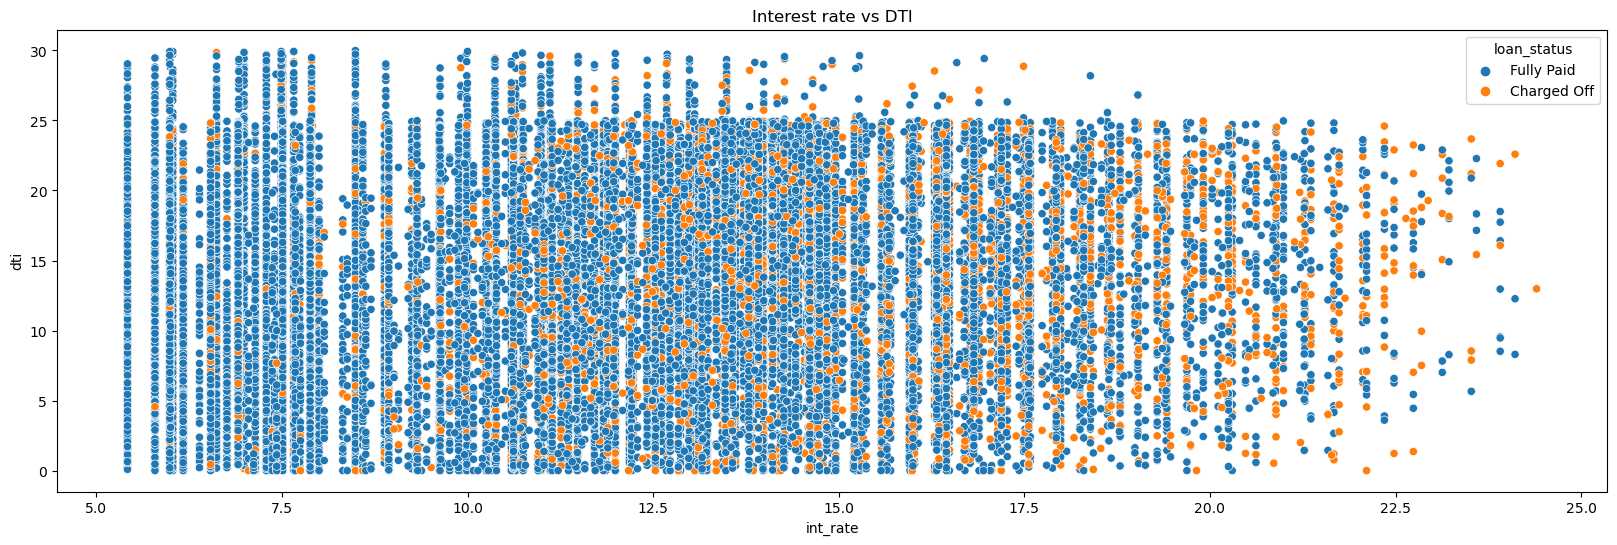

In [102]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=cleaned_loan_df, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

## Correlation Matrix
Let's find the correlation between the variables/columns of out data set.

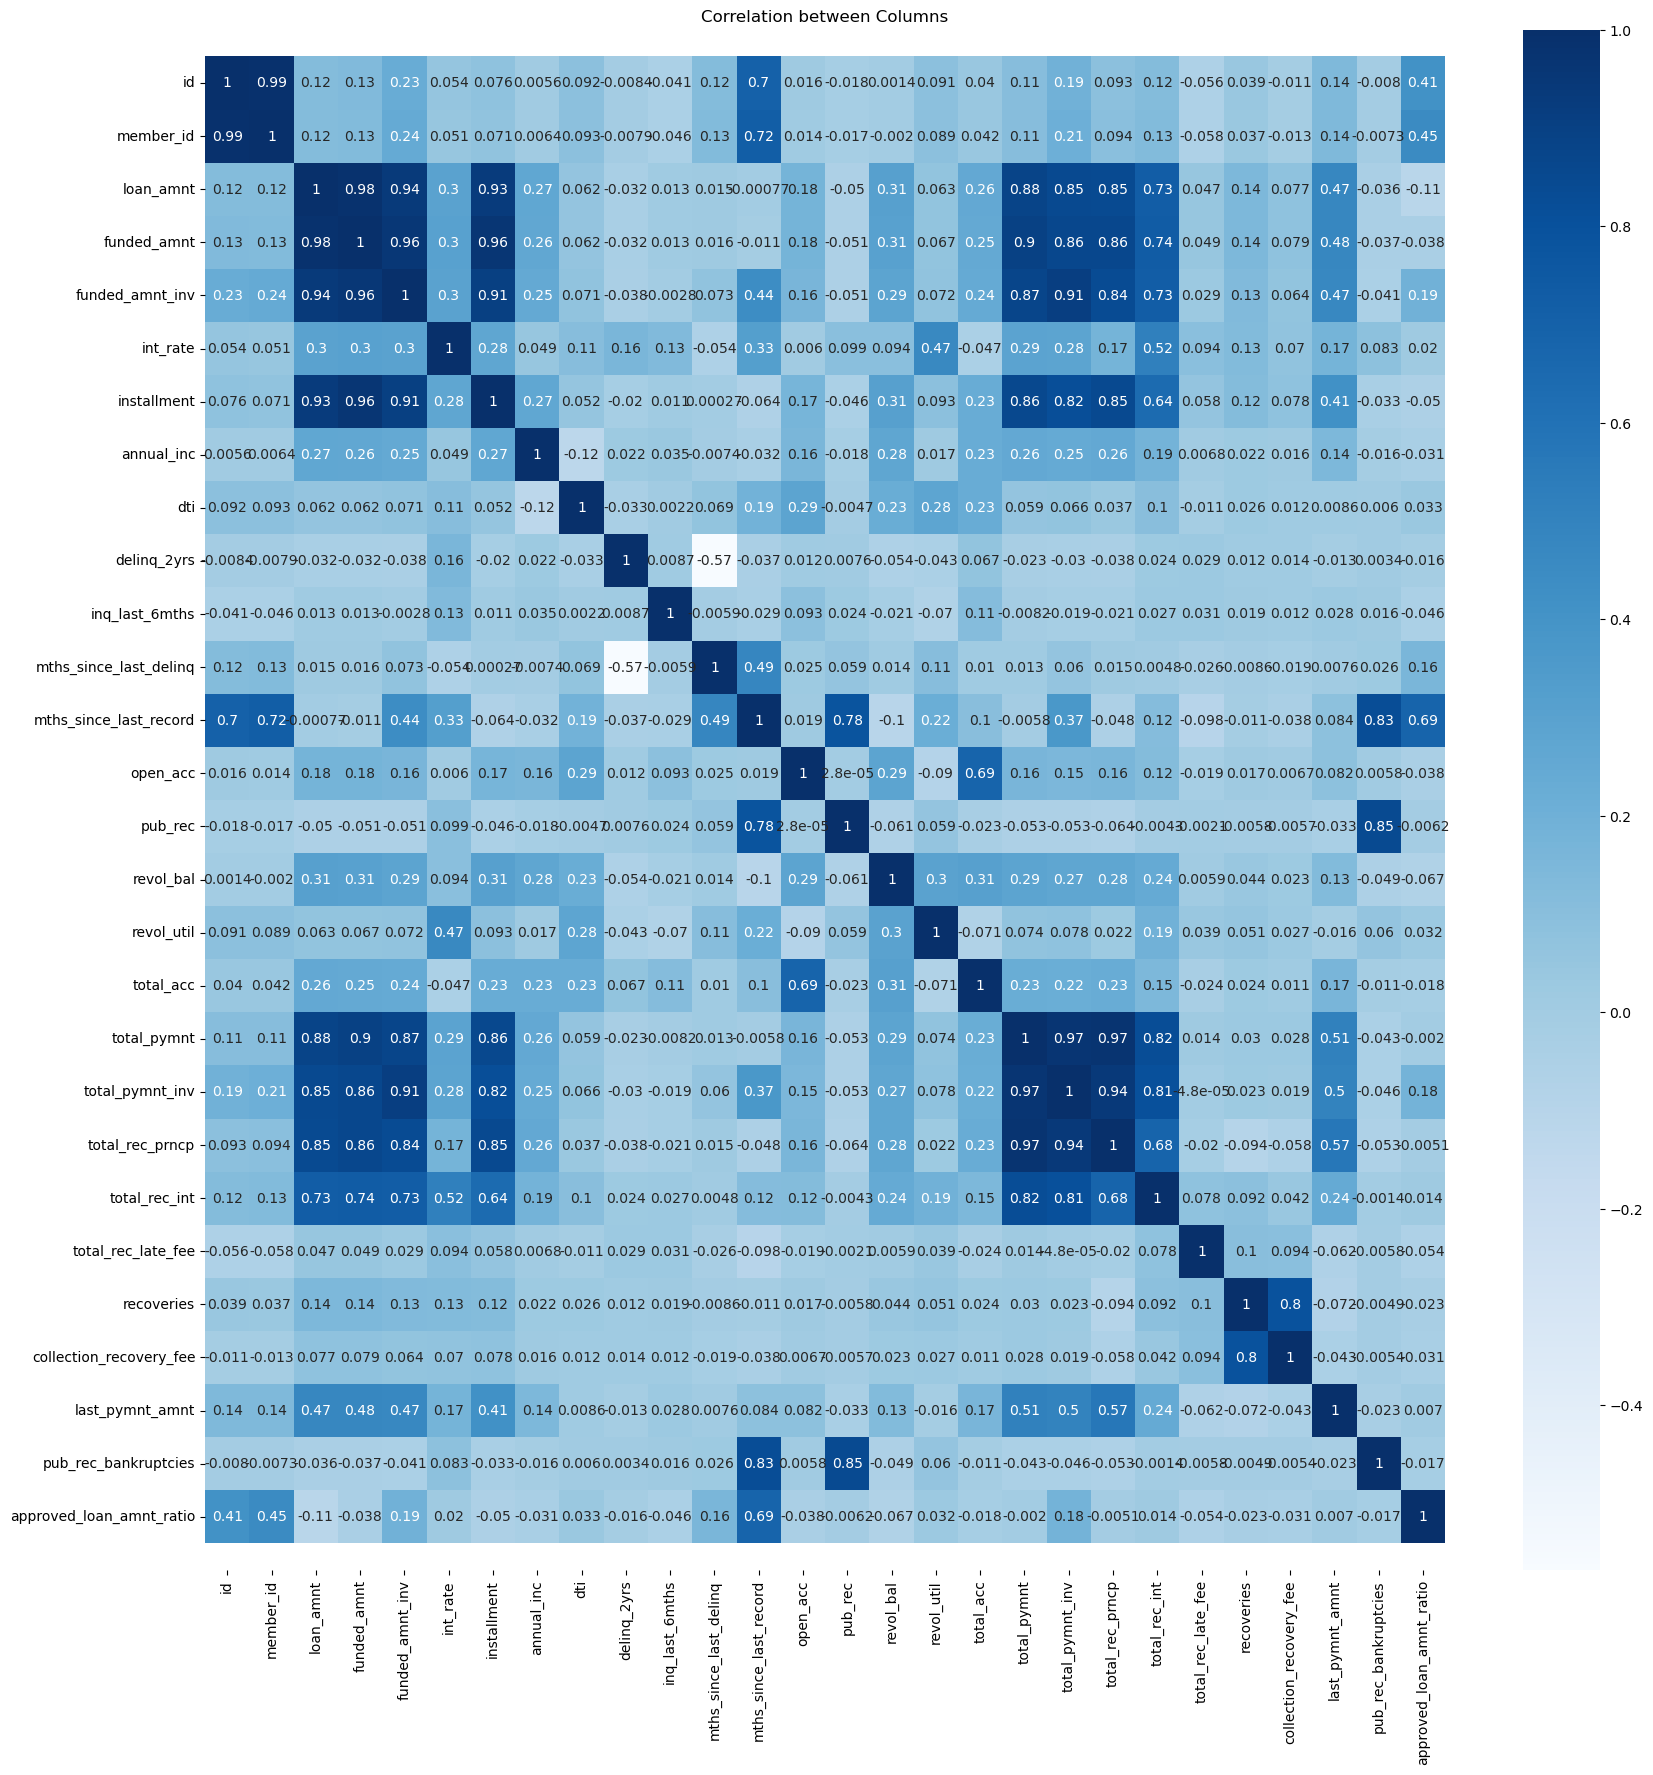

In [103]:
# Select only numeric columns

numeric_df = cleaned_loan_df.select_dtypes(include='number')

#Finding correlation matric
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()